In [1]:
import os
import shutil

if os.path.exists("game-recommendations-on-steam.zip"):
    os.remove("game-recommendations-on-steam.zip")

if os.path.exists("data"):
    shutil.rmtree("data")

if os.path.exists("cleaned_data"):
    shutil.rmtree("cleaned_data")

In [2]:
%ls

 Volume in drive C is Windows-SSD
 Volume Serial Number is 284D-8FBA

 Directory of C:\Users\ritis\Desktop\Game_RecSys

10-01-2026  14:39    <DIR>          .
03-01-2026  18:01    <DIR>          ..
03-01-2026  19:21    <DIR>          .ipynb_checkpoints
03-01-2026  18:27    <DIR>          anaconda_projects
10-01-2026  14:39            38,115 recsys.ipynb
               1 File(s)         38,115 bytes
               4 Dir(s)  74,644,815,872 bytes free


Downloading the dataset required for building the games recommender system.

In [3]:
#!/bin/bash
!curl -L -o game-recommendations-on-steam.zip  https://www.kaggle.com/api/v1/datasets/download/antonkozyriev/game-recommendations-on-steam

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

  0  660M    0  154k    0     0   180k      0  1:02:35 --:--:--  1:02:35  180k
  2  660M    2 14.4M    0     0  7977k      0  0:01:24  0:00:01  0:01:23 14.3M
  4  660M    4 28.1M    0     0   9.8M      0  0:01:06  0:00:02  0:01:04 14.0M
  7  660M    7 50.2M    0     0  13.0M      0  0:00:50  0:00:03  0:00:47 16.7M
 11  660M   11 78.0M    0     0  16.0M      0  0:00:41  0:00:04  0:00:37 19.5M
 16  660M   16  110M    0     0  18.8M      0  0:00:34  0:00:05  0:00:29 22.0M
 20  660M   20  138M    0     0  20.1M      0  0:00:32  0:00:06  0:00:26 24.7M
 25  660M   25  166M    0     0  21.2M      0  0:00:31  0:00:07  0:00:24 27.6M
 29  660M   29  197M    0     0  22.2M      0  0:0

In [4]:
%ls

 Volume in drive C is Windows-SSD
 Volume Serial Number is 284D-8FBA

 Directory of C:\Users\ritis\Desktop\Game_RecSys

10-01-2026  14:39    <DIR>          .
03-01-2026  18:01    <DIR>          ..
03-01-2026  19:21    <DIR>          .ipynb_checkpoints
03-01-2026  18:27    <DIR>          anaconda_projects
10-01-2026  14:40       692,315,526 game-recommendations-on-steam.zip
10-01-2026  14:39            38,115 recsys.ipynb
               2 File(s)    692,353,641 bytes
               4 Dir(s)  73,952,223,232 bytes free


Extracting the dowloaded dataset to start working on it.

In [5]:
import patoolib
patoolib.extract_archive("game-recommendations-on-steam.zip", outdir=r"C:\Users\ritis\Desktop\Game_RecSys\data")

INFO patool: Extracting game-recommendations-on-steam.zip ...
INFO patool: could not find a 'file' executable, falling back to guess mime type by file extension
INFO patool: ... creating output directory `C:\Users\ritis\Desktop\Game_RecSys\data'.
INFO patool: ... game-recommendations-on-steam.zip extracted to `C:\Users\ritis\Desktop\Game_RecSys\data'.


'C:\\Users\\ritis\\Desktop\\Game_RecSys\\data'

In [6]:
%ls

 Volume in drive C is Windows-SSD
 Volume Serial Number is 284D-8FBA

 Directory of C:\Users\ritis\Desktop\Game_RecSys

10-01-2026  14:40    <DIR>          .
03-01-2026  18:01    <DIR>          ..
03-01-2026  19:21    <DIR>          .ipynb_checkpoints
03-01-2026  18:27    <DIR>          anaconda_projects
10-01-2026  14:40    <DIR>          data
10-01-2026  14:40       692,315,526 game-recommendations-on-steam.zip
10-01-2026  14:39            38,115 recsys.ipynb
               2 File(s)    692,353,641 bytes
               5 Dir(s)  71,713,300,480 bytes free


Reading the extracted datasets for their analytical inspection before using them for any model purposes.

In [7]:
import pandas as pd
import json

In [8]:
games = pd.read_csv("data/games.csv")
users = pd.read_csv("data/users.csv")
recommendations = pd.read_csv("data/recommendations.csv")
metadata = pd.read_json("data/games_metadata.json", lines=True, encoding="utf-8")

In [9]:
games

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True
1,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0.0,True
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True
3,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0.0,True
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,Very Positive,88,8784,11.99,11.99,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50867,2296380,I Expect You To Die 3: Cog in the Machine,2023-09-28,True,False,False,Very Positive,96,101,22.00,0.00,0.0,True
50868,1272080,PAYDAY 3,2023-09-21,True,False,False,Mostly Negative,38,29458,40.00,0.00,0.0,True
50869,1402110,Eternights,2023-09-11,True,False,False,Very Positive,89,1128,30.00,0.00,0.0,True
50870,2272250,Forgive Me Father 2,2023-10-19,True,False,False,Very Positive,95,82,17.00,0.00,0.0,True


In [10]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50872 entries, 0 to 50871
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app_id          50872 non-null  int64  
 1   title           50872 non-null  object 
 2   date_release    50872 non-null  object 
 3   win             50872 non-null  bool   
 4   mac             50872 non-null  bool   
 5   linux           50872 non-null  bool   
 6   rating          50872 non-null  object 
 7   positive_ratio  50872 non-null  int64  
 8   user_reviews    50872 non-null  int64  
 9   price_final     50872 non-null  float64
 10  price_original  50872 non-null  float64
 11  discount        50872 non-null  float64
 12  steam_deck      50872 non-null  bool   
dtypes: bool(4), float64(3), int64(3), object(3)
memory usage: 3.7+ MB


In [11]:
# To check that apart from NaNs/NULLs, checking whether there is any empty cells w/o nulls.
semantic_emptiness_check_cols = games.select_dtypes(include="object")
print(semantic_emptiness_check_cols)
print(semantic_emptiness_check_cols.apply(lambda col: col.str.strip().eq("").any()))

                                           title date_release           rating
0              Prince of Persia: Warrior Within™   2008-11-21    Very Positive
1                        BRINK: Agents of Change   2011-08-03         Positive
2                   Monaco: What's Yours Is Mine   2013-04-24    Very Positive
3                             Escape Dead Island   2014-11-18            Mixed
4                        Dungeon of the ENDLESS™   2014-10-27    Very Positive
...                                          ...          ...              ...
50867  I Expect You To Die 3: Cog in the Machine   2023-09-28    Very Positive
50868                                   PAYDAY 3   2023-09-21  Mostly Negative
50869                                 Eternights   2023-09-11    Very Positive
50870                        Forgive Me Father 2   2023-10-19    Very Positive
50871                                  FatalZone   2023-10-23    Very Positive

[50872 rows x 3 columns]
title           False
date

In [12]:
# Checking some descriptive statistics
games.describe()

,app_id,positive_ratio,user_reviews,price_final,price_original,discount
count,5.087200e+04,50872.000000,5.087200e+04,50872.000000,50872.000000,50872.000000
mean,1.055224e+06,77.052033,1.824425e+03,8.620325,8.726788,5.592212
std,6.103249e+05,18.253592,4.007352e+04,11.514164,11.507021,18.606679
min,1.000000e+01,0.000000,1.000000e+01,0.000000,0.000000,0.000000
25%,5.287375e+05,67.000000,1.900000e+01,0.990000,0.990000,0.000000
50%,9.860850e+05,81.000000,4.900000e+01,4.990000,4.990000,0.000000
75%,1.524895e+06,91.000000,2.060000e+02,10.990000,11.990000,0.000000
max,2.599300e+06,100.000000,7.494460e+06,299.990000,299.990000,90.000000


In [13]:
games[games["discount"] != 0.0]

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
18,245950,Borderlands 2: Headhunter 4: Wedding Day Massacre,2014-02-11,True,True,True,Very Positive,84,294,0.89,2.99,70.0,True
19,250460,Bridge Constructor,2013-10-16,True,True,True,Mostly Positive,77,716,2.39,19.99,88.0,True
46,410970,Master of Orion 1,2016-08-25,True,True,True,Very Positive,90,279,0.89,5.99,85.0,True
56,342310,RIOT: Civil Unrest,2019-02-12,True,True,True,Mixed,68,1280,5.09,16.99,70.0,True
111,727980,Injustice™ 2 - Black Manta,2017-11-14,True,False,False,Positive,82,23,2.39,5.99,60.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50772,2106910,Gods Of Defense,2023-05-01,True,False,False,Mostly Positive,71,35,11.99,14.99,20.0,True
50774,2459810,EZ2ON REBOOT : R - FORTRESS Collaboration DLC,2023-07-07,True,False,False,Very Positive,98,56,17.99,19.99,10.0,True
50775,1998970,Train Sim World® 3: Union Pacific Heritage Liv...,2023-02-21,True,False,False,Mixed,63,11,9.74,14.99,35.0,True
50776,1616110,Glitch Busters: Stuck On You,2023-05-22,True,False,False,Positive,86,29,15.99,19.99,20.0,True


In [14]:
# Dropping price and discount columns for now, not useful. Can't say if it will be useful later.
games.drop(columns=["price_final", "price_original", "discount"], inplace = True)

In [15]:
games

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,steam_deck
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,True
1,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,True
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,True
3,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,True
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,Very Positive,88,8784,True
...,...,...,...,...,...,...,...,...,...,...
50867,2296380,I Expect You To Die 3: Cog in the Machine,2023-09-28,True,False,False,Very Positive,96,101,True
50868,1272080,PAYDAY 3,2023-09-21,True,False,False,Mostly Negative,38,29458,True
50869,1402110,Eternights,2023-09-11,True,False,False,Very Positive,89,1128,True
50870,2272250,Forgive Me Father 2,2023-10-19,True,False,False,Very Positive,95,82,True


In [16]:
games["rating"].value_counts(), games["rating"].unique()

(rating
 Positive                   13502
 Very Positive              13139
 Mixed                      12157
 Mostly Positive             8738
 Mostly Negative             1849
 Overwhelmingly Positive     1110
 Negative                     303
 Very Negative                 60
 Overwhelmingly Negative       14
 Name: count, dtype: int64,
 array(['Very Positive', 'Positive', 'Mixed', 'Mostly Positive',
        'Overwhelmingly Positive', 'Negative', 'Mostly Negative',
        'Overwhelmingly Negative', 'Very Negative'], dtype=object))

In [17]:
games["win"].value_counts(), games["win"].unique()

(win
 True     50076
 False      796
 Name: count, dtype: int64,
 array([ True, False]))

In [18]:
games["mac"].value_counts(), games["mac"].unique()

(mac
 False    37854
 True     13018
 Name: count, dtype: int64,
 array([False,  True]))

In [19]:
games["linux"].value_counts(), games["linux"].unique()

(linux
 False    41831
 True      9041
 Name: count, dtype: int64,
 array([False,  True]))

In [20]:
games["steam_deck"].value_counts(), games["steam_deck"].unique()

(steam_deck
 True     50870
 False        2
 Name: count, dtype: int64,
 array([ True, False]))

In [21]:
# Removing the two rows with no steam_deck or steam support
print(games[games["steam_deck"] == False])
games.drop([47326, 49234], axis = 0, inplace = True)

       app_id                 title date_release   win    mac  linux  \
47326  223850                3DMark   2010-12-07  True  False  False   
49234   17530  D.I.P.R.I.P. Warm Up   2008-03-18  True  False  False   

                rating  positive_ratio  user_reviews  steam_deck  
47326    Very Positive              93         11573       False  
49234  Mostly Positive              79           401       False  


In [22]:
games["steam_deck"].value_counts(), games["steam_deck"].unique()

(steam_deck
 True    50870
 Name: count, dtype: int64,
 array([ True]))

In [23]:
# Currently, doing only for windows platform so, removing mac and linux features -- also because windows has the least number of games being unavailable
games.drop(columns=["mac", "linux"], inplace = True)

In [24]:
games

,app_id,title,date_release,win,rating,positive_ratio,user_reviews,steam_deck
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,Very Positive,84,2199,True
1,22364,BRINK: Agents of Change,2011-08-03,True,Positive,85,21,True
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,Very Positive,92,3722,True
3,226560,Escape Dead Island,2014-11-18,True,Mixed,61,873,True
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,Very Positive,88,8784,True
...,...,...,...,...,...,...,...,...
50867,2296380,I Expect You To Die 3: Cog in the Machine,2023-09-28,True,Very Positive,96,101,True
50868,1272080,PAYDAY 3,2023-09-21,True,Mostly Negative,38,29458,True
50869,1402110,Eternights,2023-09-11,True,Very Positive,89,1128,True
50870,2272250,Forgive Me Father 2,2023-10-19,True,Very Positive,95,82,True


In [25]:
import matplotlib.pyplot as plt

Visualizing the dataset for better understanding and also take help from it, in some way, to do feature extraction.

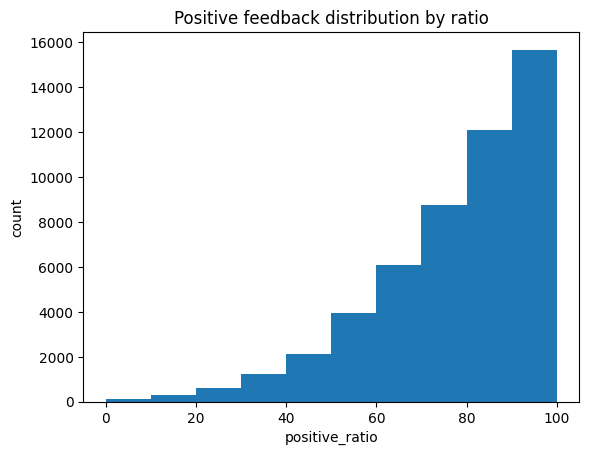

In [26]:
plt.hist(games["positive_ratio"])
plt.xlabel("positive_ratio")
plt.ylabel("count")
plt.title("Positive feedback distribution by ratio")
plt.show()

In [27]:
import numpy as np

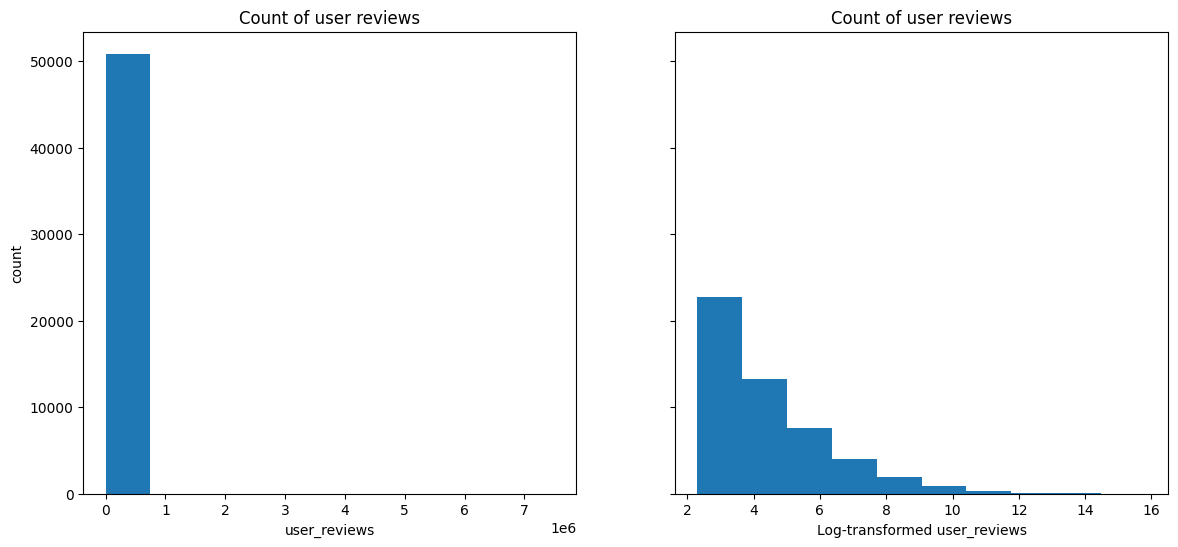

In [28]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(14, 6))
ax[0].hist(games["user_reviews"])
ax[0].set_xlabel("user_reviews")
ax[0].set_ylabel("count")
ax[0].set_title("Count of user reviews")
ax[1].hist(np.log(games["user_reviews"]))
ax[1].set_xlabel("Log-transformed user_reviews")
ax[1].set_title("Count of user reviews")
plt.show()

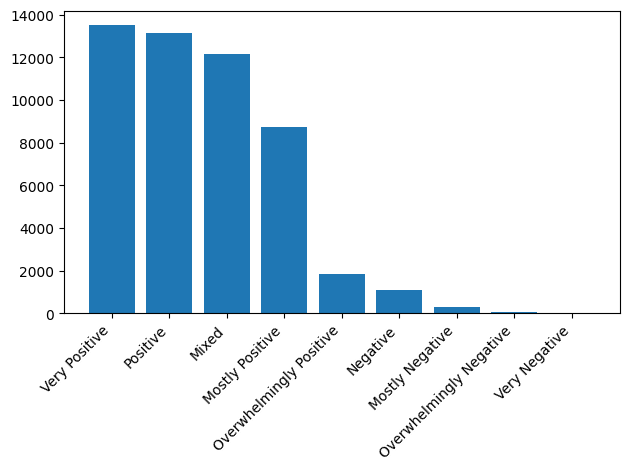

In [29]:
plt.bar(games["rating"].unique(), games["rating"].value_counts(), label = games["rating"].unique())
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

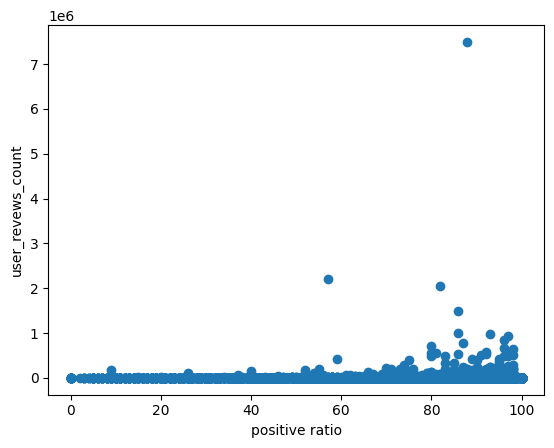

In [30]:
plt.scatter(games["positive_ratio"], games["user_reviews"])
plt.xlabel("positive ratio")
plt.ylabel("user_revews_count")
plt.show()

In [31]:
# Because nuumbers are understood by the machine
rating_map = {
    "Overwhelmingly Positive": 8,
    "Very Positive": 7,
    "Positive": 6,
    "Mostly Positive": 5,
    "Mixed": 4,
    "Negative": 3,
    "Mostly Negative": 2,
    "Very Negative" : 1,
    "Overwhelmingly Negative" : 0
}

games["rating_ord"] = games["rating"].map(rating_map)
games.drop(columns=["rating"], inplace=True)
games

,app_id,title,date_release,win,positive_ratio,user_reviews,steam_deck,rating_ord
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,84,2199,True,7
1,22364,BRINK: Agents of Change,2011-08-03,True,85,21,True,6
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,92,3722,True,7
3,226560,Escape Dead Island,2014-11-18,True,61,873,True,4
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,88,8784,True,7
...,...,...,...,...,...,...,...,...
50867,2296380,I Expect You To Die 3: Cog in the Machine,2023-09-28,True,96,101,True,7
50868,1272080,PAYDAY 3,2023-09-21,True,38,29458,True,2
50869,1402110,Eternights,2023-09-11,True,89,1128,True,7
50870,2272250,Forgive Me Father 2,2023-10-19,True,95,82,True,7


In [32]:
games["win"] = games["win"].astype(int)
# Because all these games have support on steam hence, dropping the steam_deck coliumn as well.
games.drop(columns=["steam_deck"], inplace = True)
games

,app_id,title,date_release,win,positive_ratio,user_reviews,rating_ord
0,13500,Prince of Persia: Warrior Within™,2008-11-21,1,84,2199,7
1,22364,BRINK: Agents of Change,2011-08-03,1,85,21,6
2,113020,Monaco: What's Yours Is Mine,2013-04-24,1,92,3722,7
3,226560,Escape Dead Island,2014-11-18,1,61,873,4
4,249050,Dungeon of the ENDLESS™,2014-10-27,1,88,8784,7
...,...,...,...,...,...,...,...
50867,2296380,I Expect You To Die 3: Cog in the Machine,2023-09-28,1,96,101,7
50868,1272080,PAYDAY 3,2023-09-21,1,38,29458,2
50869,1402110,Eternights,2023-09-11,1,89,1128,7
50870,2272250,Forgive Me Father 2,2023-10-19,1,95,82,7


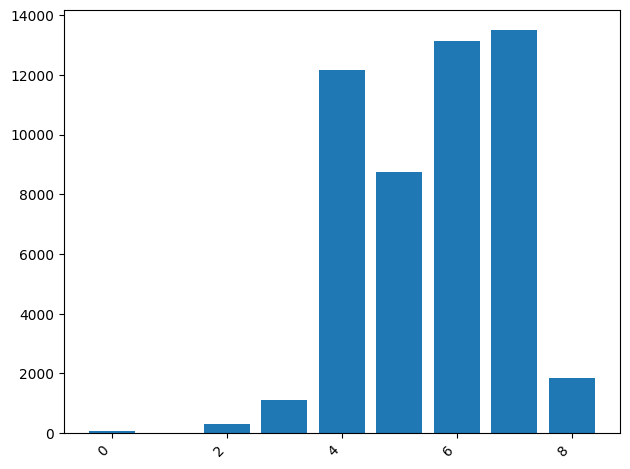

In [33]:
plt.bar(games["rating_ord"].unique(), games["rating_ord"].value_counts(), label = rating_map.values)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [34]:
games.corr(method="spearman", numeric_only=True)

,app_id,win,positive_ratio,user_reviews,rating_ord
app_id,1.000000,-0.022649,0.185855,-0.264652,0.062262
win,-0.022649,1.000000,-0.126792,0.080041,-0.049732
positive_ratio,0.185855,-0.126792,1.000000,0.046231,0.829489
user_reviews,-0.264652,0.080041,0.046231,1.000000,0.328941
rating_ord,0.062262,-0.049732,0.829489,0.328941,1.000000


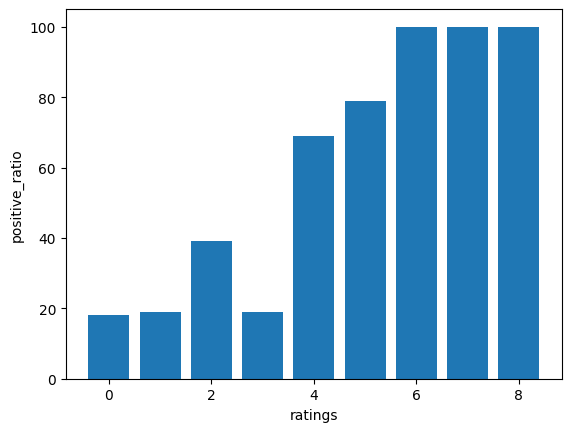

In [35]:
plt.bar(games["rating_ord"], games["positive_ratio"])
plt.xlabel("ratings")
plt.ylabel("positive_ratio")
plt.show()

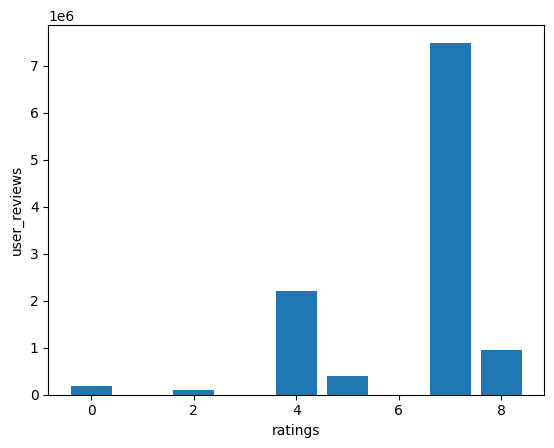

In [36]:
plt.bar(games["rating_ord"], games["user_reviews"])
plt.xlabel("ratings")
plt.ylabel("user_reviews")
plt.show()

In [37]:
# Need to transform and normalize positive_ratio and user_reviews colummns so as to make them easier to use with ML algo.s and avoid dominance of larger values.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
games["positive_ratio_norm"] = scaler.fit_transform(games[["positive_ratio"]])
games["user_reviews_norm"] = scaler.fit_transform(np.log1p(games[["user_reviews"]]))
games.drop(columns=["positive_ratio", "user_reviews"], inplace=True)
games

,app_id,title,date_release,win,rating_ord,positive_ratio_norm,user_reviews_norm
0,13500,Prince of Persia: Warrior Within™,2008-11-21,1,7,0.84,0.394461
1,22364,BRINK: Agents of Change,2011-08-03,1,6,0.85,0.051605
2,113020,Monaco: What's Yours Is Mine,2013-04-24,1,7,0.92,0.433628
3,226560,Escape Dead Island,2014-11-18,1,4,0.61,0.325734
4,249050,Dungeon of the ENDLESS™,2014-10-27,1,7,0.88,0.497544
...,...,...,...,...,...,...,...
50867,2296380,I Expect You To Die 3: Cog in the Machine,2023-09-28,1,7,0.96,0.165807
50868,1272080,PAYDAY 3,2023-09-21,1,2,0.38,0.587626
50869,1402110,Eternights,2023-09-11,1,7,0.89,0.344794
50870,2272250,Forgive Me Father 2,2023-10-19,1,7,0.95,0.150460


In [38]:
games["date_release"].sort_values()

15005    1997-06-30
31261    1997-11-14
47376    1998-11-08
8617     1999-04-01
34507    1999-09-08
            ...    
17383    2023-10-24
4488     2023-10-24
4466     2023-10-24
17385    2023-10-24
17384    2023-10-24
Name: date_release, Length: 50870, dtype: object

In [39]:
games[games["date_release"] <= '2000-01-01'].sort_values(by = "date_release")

,app_id,title,date_release,win,rating_ord,positive_ratio_norm,user_reviews_norm
15005,282010,Carmageddon Max Pack,1997-06-30,1,7,0.85,0.272753
31261,232770,POSTAL,1997-11-14,1,7,0.85,0.398736
47376,70,Half-Life,1998-11-08,1,8,0.96,0.654650
8617,20,Team Fortress Classic,1999-04-01,1,7,0.85,0.457741
34507,224920,Legacy of Kain: Soul Reaver,1999-09-08,1,5,0.73,0.364342
10293,50,Half-Life: Opposing Force,1999-11-01,1,8,0.95,0.532547


In [40]:
games[games["date_release"] >= '2020-01-01'].sort_values(by = "date_release")

,app_id,title,date_release,win,rating_ord,positive_ratio_norm,user_reviews_norm
44255,1210650,ESCAPE ROOM VR,2020-01-01,1,2,0.30,0.084015
37584,1168060,Knight Solitaire,2020-01-01,1,6,0.84,0.017955
43649,1207020,FLS,2020-01-01,1,6,0.94,0.040690
9875,1215160,Night of Full Moon - Contract of Soul,2020-01-01,1,4,0.60,0.088270
32565,293480,FRONTIERS,2020-01-01,1,2,0.37,0.167965
...,...,...,...,...,...,...,...
17383,2414110,Builderment,2023-10-24,1,4,0.55,0.048142
17384,2394720,The Texas Chain Saw Massacre - Nicotero Leathe...,2023-10-24,1,6,0.87,0.079501
17385,949230,Cities: Skylines II,2023-10-24,1,4,0.49,0.504080
4466,1558830,RIPOUT,2023-10-24,1,5,0.75,0.112727


In [41]:
games.loc[games["date_release"].between("2000-01-01", "2020-12-31")].sort_values("date_release")

,app_id,title,date_release,win,rating_ord,positive_ratio_norm,user_reviews_norm
16597,60,Ricochet,2000-11-01,1,7,0.80,0.426783
47375,10,Counter-Strike,2000-11-01,1,8,0.97,0.701574
11879,130,Half-Life: Blue Shift,2001-06-01,1,7,0.91,0.510984
8618,40,Deathmatch Classic,2001-06-01,1,5,0.79,0.377764
5433,40990,Mafia,2002-08-28,1,7,0.90,0.478311
...,...,...,...,...,...,...,...
25601,1279580,Fortress V2,2020-12-31,1,4,0.61,0.284155
19865,1386932,Automobilista 2 - Spa-Francorchamps Pack,2020-12-31,1,6,0.91,0.061122
49770,1345940,Anagrams,2020-12-31,1,5,0.70,0.000000
31497,1479960,Arcus,2020-12-31,1,6,0.97,0.086173


In [42]:
# Doing time frame based slicing i.e., will only be using games developed in and after the year 2000.
timed_games = games[games["date_release"] > "2000-01-01"]
timed_games

,app_id,title,date_release,win,rating_ord,positive_ratio_norm,user_reviews_norm
0,13500,Prince of Persia: Warrior Within™,2008-11-21,1,7,0.84,0.394461
1,22364,BRINK: Agents of Change,2011-08-03,1,6,0.85,0.051605
2,113020,Monaco: What's Yours Is Mine,2013-04-24,1,7,0.92,0.433628
3,226560,Escape Dead Island,2014-11-18,1,4,0.61,0.325734
4,249050,Dungeon of the ENDLESS™,2014-10-27,1,7,0.88,0.497544
...,...,...,...,...,...,...,...
50867,2296380,I Expect You To Die 3: Cog in the Machine,2023-09-28,1,7,0.96,0.165807
50868,1272080,PAYDAY 3,2023-09-21,1,2,0.38,0.587626
50869,1402110,Eternights,2023-09-11,1,7,0.89,0.344794
50870,2272250,Forgive Me Father 2,2023-10-19,1,7,0.95,0.150460


In [43]:
#Checking for any duplicated game IDs
timed_games["app_id"].duplicated().sum()

np.int64(0)

In [44]:
timed_games = timed_games.reset_index(drop=True)
timed_games

,app_id,title,date_release,win,rating_ord,positive_ratio_norm,user_reviews_norm
0,13500,Prince of Persia: Warrior Within™,2008-11-21,1,7,0.84,0.394461
1,22364,BRINK: Agents of Change,2011-08-03,1,6,0.85,0.051605
2,113020,Monaco: What's Yours Is Mine,2013-04-24,1,7,0.92,0.433628
3,226560,Escape Dead Island,2014-11-18,1,4,0.61,0.325734
4,249050,Dungeon of the ENDLESS™,2014-10-27,1,7,0.88,0.497544
...,...,...,...,...,...,...,...
50859,2296380,I Expect You To Die 3: Cog in the Machine,2023-09-28,1,7,0.96,0.165807
50860,1272080,PAYDAY 3,2023-09-21,1,2,0.38,0.587626
50861,1402110,Eternights,2023-09-11,1,7,0.89,0.344794
50862,2272250,Forgive Me Father 2,2023-10-19,1,7,0.95,0.150460


The games dataset is processed completely, for now. Which can be used for creating item vectors, in some way.

In [45]:
metadata

,app_id,description,tags
0,13500,Enter the dark underworld of Prince of Persia ...,"[Action, Adventure, Parkour, Third Person, Gre..."
1,22364,,[Action]
2,113020,Monaco: What's Yours Is Mine is a single playe...,"[Co-op, Stealth, Indie, Heist, Local Co-Op, St..."
3,226560,Escape Dead Island is a Survival-Mystery adven...,"[Zombies, Adventure, Survival, Action, Third P..."
4,249050,Dungeon of the Endless is a Rogue-Like Dungeon...,"[Roguelike, Strategy, Tower Defense, Pixel Gra..."
...,...,...,...
50867,2296380,,[]
50868,1272080,,[]
50869,1402110,,[]
50870,2272250,Embark on a journey into the darkest nightmare...,"[Early Access, FPS, Action, Retro, First-Perso..."


In [46]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50872 entries, 0 to 50871
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   app_id       50872 non-null  int64 
 1   description  50872 non-null  object
 2   tags         50872 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [47]:
# Checking for semantic missingness and nulls
print(metadata["description"].apply(lambda x: x.strip() == "").value_counts())
print(metadata["tags"].apply(lambda x: isinstance(x, list) and len(x) == 0).value_counts())
print(metadata.isnull().any())

description
False    40499
True     10373
Name: count, dtype: int64
tags
False    49628
True      1244
Name: count, dtype: int64
app_id         False
description    False
tags           False
dtype: bool


In [48]:
# Filtering out only those apps which are in the games dataset in metadata set and keeping them.
timed_games_metadata = metadata[metadata["app_id"].isin(timed_games["app_id"])]
timed_games_metadata = timed_games_metadata.reset_index(drop=True)
timed_games_metadata

,app_id,description,tags
0,13500,Enter the dark underworld of Prince of Persia ...,"[Action, Adventure, Parkour, Third Person, Gre..."
1,22364,,[Action]
2,113020,Monaco: What's Yours Is Mine is a single playe...,"[Co-op, Stealth, Indie, Heist, Local Co-Op, St..."
3,226560,Escape Dead Island is a Survival-Mystery adven...,"[Zombies, Adventure, Survival, Action, Third P..."
4,249050,Dungeon of the Endless is a Rogue-Like Dungeon...,"[Roguelike, Strategy, Tower Defense, Pixel Gra..."
...,...,...,...
50859,2296380,,[]
50860,1272080,,[]
50861,1402110,,[]
50862,2272250,Embark on a journey into the darkest nightmare...,"[Early Access, FPS, Action, Retro, First-Perso..."


In [49]:
(timed_games["app_id"] == timed_games_metadata["app_id"]).value_counts()

app_id
True    50864
Name: count, dtype: int64

In [50]:
# Remove all those game rows which do not have any tags and broadly, no description because they are needed to create item vectors.
print(timed_games_metadata.loc[(timed_games_metadata["description"].apply(lambda x: x.strip() == "") & timed_games_metadata["tags"].apply(lambda x: isinstance(x, list) and len(x) == 0))].index)
timed_games_metadata.drop(timed_games_metadata.loc[(timed_games_metadata["description"].apply(lambda x: x.strip() == "") & timed_games_metadata["tags"].apply(lambda x: isinstance(x, list) and len(x) == 0))].index, axis = 0, inplace = True)
timed_games_metadata = timed_games_metadata.reset_index(drop=True)
timed_games_metadata

Index([   33,   214,   219,   224,   287,   395,   480,   565,   619,   771,
       ...
       50853, 50854, 50855, 50856, 50857, 50858, 50859, 50860, 50861, 50863],
      dtype='int64', length=1229)


,app_id,description,tags
0,13500,Enter the dark underworld of Prince of Persia ...,"[Action, Adventure, Parkour, Third Person, Gre..."
1,22364,,[Action]
2,113020,Monaco: What's Yours Is Mine is a single playe...,"[Co-op, Stealth, Indie, Heist, Local Co-Op, St..."
3,226560,Escape Dead Island is a Survival-Mystery adven...,"[Zombies, Adventure, Survival, Action, Third P..."
4,249050,Dungeon of the Endless is a Rogue-Like Dungeon...,"[Roguelike, Strategy, Tower Defense, Pixel Gra..."
...,...,...,...
49630,2455060,"In the rogue action game ""Taboo Trial"", you wi...","[RPG, Indie, Nudity, Action Roguelike, Female ..."
49631,1138640,"Build better, together 🏡 Hometopia is a seriou...","[Early Access, Life Sim, City Builder, Immersi..."
49632,2515460,,"[Strategy, Indie, Simulation]"
49633,1687000,Seiji Maruyama is a middle-aged yakuza recentl...,"[Side Scroller, Beat 'em up, Sandbox, Martial ..."


In [51]:
# These are the games for which we have no description  and no tags.
50864 - 49635

1229

In [52]:
timed_games["app_id"].unique(), timed_games_metadata["app_id"].unique()

(array([  13500,   22364,  113020, ..., 1402110, 2272250, 2488510],
       shape=(50864,)),
 array([  13500,   22364,  113020, ..., 2515460, 1687000, 2272250],
       shape=(49635,)))

In [53]:
timed_games_metadata[timed_games_metadata["description"].apply(lambda x: x.strip() == "")]

,app_id,description,tags
1,22364,,[Action]
7,271850,,"[Strategy, Simulation, Action, RTS, World War II]"
18,245950,,"[Action, RPG, FPS, Co-op, Shooter, Action RPG,..."
21,305181,,"[Adventure, Action]"
30,458790,,"[Adventure, Soundtrack, Visual Novel]"
...,...,...,...
49612,2459810,,"[Action, Casual, Sports]"
49613,1998970,,[Simulation]
49626,2446110,,"[Simulation, Indie, Casual, Survival, Card Gam..."
49628,2380280,,"[Strategy, Simulation, Building, Fantasy, Pixe..."


In [54]:
timed_games_metadata[timed_games_metadata["tags"].apply(lambda x: isinstance(x, list) and len(x) == 0)]

,app_id,description,tags
3487,1335090,"The original, nostalgic melodies of Capcom's 1...",[]
21099,1899060,Delve into the enthralling world of Pocket Mir...,[]
23891,2160160,Your eardrums will have no regerts when it com...,[]
25703,830640,A complete tools suite for the game engine pow...,[]
26987,1335100,The nostalgic melodies of Capcom's 2000 32-bit...,[]
33109,1244390,A thunder and rain relaxation/ study app with ...,[]
33233,1568810,Get your adrenaline pumping with the breakbeat...,[]
36433,1568800,The original atmospheric and adrenaline-pumpin...,[]
38797,1335110,"Released for the first time in the West, the o...",[]
46167,2134030,Picma is a cozy collection of puzzle games whe...,[]


In [55]:
# Replacing the empty lists with "" in tags column to make it easier to deal with.
timed_games_metadata.loc[timed_games_metadata["tags"].apply(lambda x: isinstance(x, list) and len(x) == 0), "tags"] = ""

In [56]:
timed_games_metadata[timed_games_metadata["tags"].apply(lambda x: isinstance(x, list) and len(x) == 0)]

,app_id,description,tags


In [57]:
# For easier tags handling, taking them out of the lists.
timed_games_metadata["tags"] = timed_games_metadata["tags"].apply(lambda x: ", ".join(x) if isinstance(x, list) else "")
timed_games_metadata

,app_id,description,tags
0,13500,Enter the dark underworld of Prince of Persia ...,"Action, Adventure, Parkour, Third Person, Grea..."
1,22364,,Action
2,113020,Monaco: What's Yours Is Mine is a single playe...,"Co-op, Stealth, Indie, Heist, Local Co-Op, Str..."
3,226560,Escape Dead Island is a Survival-Mystery adven...,"Zombies, Adventure, Survival, Action, Third Pe..."
4,249050,Dungeon of the Endless is a Rogue-Like Dungeon...,"Roguelike, Strategy, Tower Defense, Pixel Grap..."
...,...,...,...
49630,2455060,"In the rogue action game ""Taboo Trial"", you wi...","RPG, Indie, Nudity, Action Roguelike, Female P..."
49631,1138640,"Build better, together 🏡 Hometopia is a seriou...","Early Access, Life Sim, City Builder, Immersiv..."
49632,2515460,,"Strategy, Indie, Simulation"
49633,1687000,Seiji Maruyama is a middle-aged yakuza recentl...,"Side Scroller, Beat 'em up, Sandbox, Martial A..."


In [58]:
timed_games_metadata.loc[3487]

app_id                                                   1335090
description    The original, nostalgic melodies of Capcom's 1...
tags                                                            
Name: 3487, dtype: object

In [59]:
# merged_games_data["despandtags"] = merged_games_data["description"]+" "+merged_games_data["tags"]
# merged_games_data["despandtags"][0]

In [60]:
# merged_games_data.drop(columns=["description", "tags"], inplace = True)
# merged_games_data

In [61]:
# # Normalizing the positive_ratio and user_reviews columns.
# # This will also prevent from getting biased or so because of those two features having relatively larger values.

# # Min-Max scaling for positive_ratio because it has a skewed, bounded distribution.
# from sklearn.preprocessing import MinMaxScaler
# norm = MinMaxScaler()
# merged_games_data["positive_ratio_norm"] = norm.fit_transform(merged_games_data[["positive_ratio"]])

In [62]:
# # Normalizing the user_reviews column using log because it has a sort of power law distribution so as to bring it into the same range
# import numpy as np
# merged_games_data["user_reviews_norm"] = np.log(merged_games_data["user_reviews"])

In [63]:
# merged_games_data.drop(columns=["positive_ratio", "user_reviews"], inplace = True)
# merged_games_data

In [64]:
users

,user_id,products,reviews
0,7360263,359,0
1,14020781,156,1
2,8762579,329,4
3,4820647,176,4
4,5167327,98,2
...,...,...,...
14306059,5047430,6,0
14306060,5048153,0,0
14306061,5059205,31,0
14306062,5074363,0,0


In [65]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14306064 entries, 0 to 14306063
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   products  int64
 2   reviews   int64
dtypes: int64(3)
memory usage: 327.4 MB


In [66]:
users.describe()

,user_id,products,reviews
count,1.430606e+07,1.430606e+07,1.430606e+07
mean,7.153032e+06,1.163734e+02,2.876738e+00
std,4.129805e+06,2.438515e+02,7.987421e+00
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.576516e+06,2.300000e+01,1.000000e+00
50%,7.153032e+06,5.500000e+01,1.000000e+00
75%,1.072955e+07,1.270000e+02,3.000000e+00
max,1.430606e+07,3.221400e+04,6.045000e+03


In [67]:
# Checking for any duplicates first
users["user_id"].duplicated().value_counts()

user_id
False    14306064
Name: count, dtype: int64

(array([9.749063e+06, 2.477193e+06, 9.247890e+05, 4.355160e+05,
        2.322170e+05, 1.390690e+05, 8.857900e+04, 5.976900e+04,
        4.183900e+04, 2.962700e+04, 2.391500e+04, 1.827000e+04,
        1.421800e+04, 1.118100e+04, 8.751000e+03, 7.254000e+03,
        5.783000e+03, 4.816000e+03, 3.870000e+03, 3.212000e+03,
        2.877000e+03, 2.458000e+03, 2.091000e+03, 1.845000e+03,
        1.542000e+03, 1.347000e+03, 1.193000e+03, 1.066000e+03,
        8.800000e+02, 7.740000e+02, 7.960000e+02, 7.080000e+02,
        6.630000e+02, 5.970000e+02, 5.370000e+02, 4.160000e+02,
        3.770000e+02, 3.980000e+02, 3.470000e+02, 2.980000e+02,
        3.100000e+02, 2.870000e+02, 2.650000e+02, 2.450000e+02,
        2.240000e+02, 2.310000e+02, 2.200000e+02, 1.740000e+02,
        1.740000e+02]),
 array([   0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,  800.,
         900., 1000., 1100., 1200., 1300., 1400., 1500., 1600., 1700.,
        1800., 1900., 2000., 2100., 2200., 2300., 2400., 2500., 26

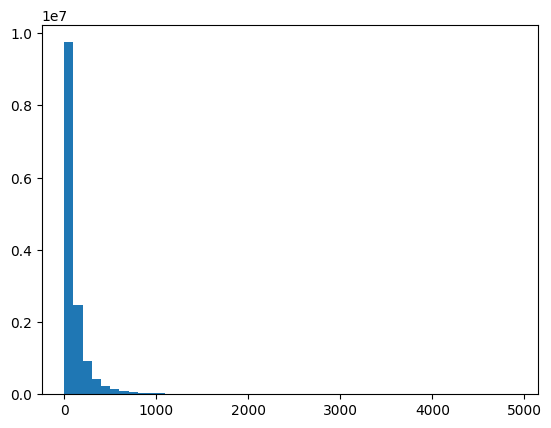

In [68]:
plt.hist(users["products"], bins=range(0, 5000, 100))
# plt.show()

(array([1.4268904e+07, 2.8796000e+04, 4.9310000e+03, 1.5990000e+03,
        6.7400000e+02, 3.7500000e+02, 2.4200000e+02, 1.2900000e+02,
        9.4000000e+01, 6.3000000e+01, 5.4000000e+01, 3.0000000e+01,
        3.6000000e+01, 1.1000000e+01, 1.7000000e+01, 1.3000000e+01,
        1.2000000e+01, 1.1000000e+01, 1.0000000e+01, 8.0000000e+00,
        3.0000000e+00, 6.0000000e+00, 3.0000000e+00, 3.0000000e+00,
        3.0000000e+00, 3.0000000e+00, 5.0000000e+00, 1.0000000e+00,
        1.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        1.0000000e+00, 5.0000000e+00, 0.0000000e+00, 2.0000000e+00,
        2.0000000e+00, 2.0000000e+00, 0.0000000e+00]),
 array([   0.,   50.,  100.,  150.,  200.,  250.,  300.,  350.,  400.,
         450.,  500.,  550.,  600.,  650.,  700.,  750.,  800.,  850.,
         900.,  950., 1000., 1050., 1100., 1150., 1200., 1250., 1300.,
        1350., 1400., 1450., 1500., 1550., 1600., 1650., 1700., 1750.,
        1800., 1850., 1900., 1950.]),
 <BarContai

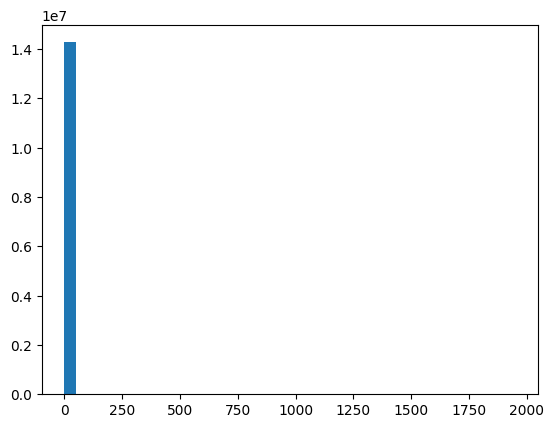

In [69]:
plt.hist(users["reviews"], bins=range(0, 2000, 50))

In [70]:
users.corr()

,user_id,products,reviews
user_id,1.000000,0.080097,0.025949
products,0.080097,1.000000,0.244690
reviews,0.025949,0.244690,1.000000


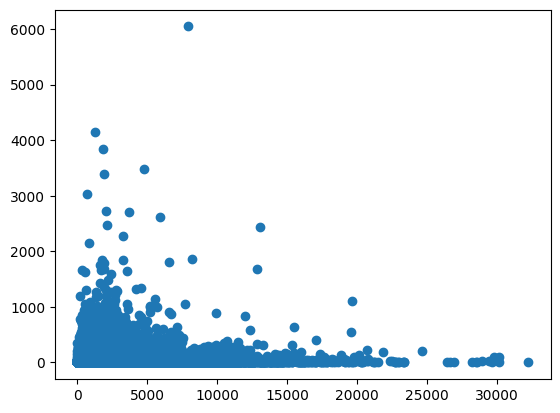

In [71]:
plt.scatter(users["products"], users["reviews"])

In [72]:
users[(users["products"] == 0)]

,user_id,products,reviews
5885,11338443,0,1
6443,11461157,0,1
7342,11651120,0,0
8157,11829513,0,1
10484,12690993,0,1
...,...,...,...
14306029,4963670,0,0
14306041,4982429,0,0
14306060,5048153,0,0
14306062,5074363,0,0


In [73]:
users[(users["reviews"] == 0)]

,user_id,products,reviews
0,7360263,359,0
26,12641029,33,0
42,4341159,367,0
78,7225811,368,0
154,13979247,67,0
...,...,...,...
14306059,5047430,6,0
14306060,5048153,0,0
14306061,5059205,31,0
14306062,5074363,0,0


In [74]:
users[(users["products"] == 0) & (users["reviews"] == 0)]

,user_id,products,reviews
7342,11651120,0,0
21677,5158469,0,0
22002,5234459,0,0
37970,8806508,0,0
40300,9361137,0,0
...,...,...,...
14306029,4963670,0,0
14306041,4982429,0,0
14306060,5048153,0,0
14306062,5074363,0,0


In [75]:
users[(users["products"] == 0) & (users["reviews"] > 0)]

,user_id,products,reviews
5885,11338443,0,1
6443,11461157,0,1
8157,11829513,0,1
10484,12690993,0,1
12225,14029878,0,1
...,...,...,...
14305941,4880819,0,1
14305957,4896498,0,1
14305958,4896928,0,1
14305964,4899440,0,1


In [76]:
# Removing users with 0 products and some reviews
users.drop(users[(users["products"] == 0) & (users["reviews"] > 0)].index, axis=0, inplace= True)

In [77]:
# Normalizing the fetures
users["log_transformed_prods"] = np.log1p(users["products"])
users["log_transformed_reviews"] = np.log1p(users["reviews"])
users["products_norm"] = scaler.fit_transform(users[["log_transformed_prods"]])
users["reviews_norm"] = scaler.fit_transform(users[["log_transformed_reviews"]])
users.drop(columns=["products", "log_transformed_prods", "reviews", "log_transformed_reviews"], inplace=True)
users

,user_id,products_norm,reviews_norm
0,7360263,0.567052,0.000000
1,14020781,0.487105,0.079607
2,8762579,0.558669,0.184841
3,4820647,0.498657,0.184841
4,5167327,0.442682,0.126174
...,...,...,...
14306059,5047430,0.187464,0.000000
14306060,5048153,0.000000,0.000000
14306061,5059205,0.333880,0.000000
14306062,5074363,0.000000,0.000000


In [78]:
users = users.reset_index(drop=True)
users

,user_id,products_norm,reviews_norm
0,7360263,0.567052,0.000000
1,14020781,0.487105,0.079607
2,8762579,0.558669,0.184841
3,4820647,0.498657,0.184841
4,5167327,0.442682,0.126174
...,...,...,...
14180817,5047430,0.187464,0.000000
14180818,5048153,0.000000,0.000000
14180819,5059205,0.333880,0.000000
14180820,5074363,0.000000,0.000000


In [79]:
recommendations

,app_id,helpful,funny,date,is_recommended,hours,user_id,review_id
0,975370,0,0,2022-12-12,True,36.3,51580,0
1,304390,4,0,2017-02-17,False,11.5,2586,1
2,1085660,2,0,2019-11-17,True,336.5,253880,2
3,703080,0,0,2022-09-23,True,27.4,259432,3
4,526870,0,0,2021-01-10,True,7.9,23869,4
...,...,...,...,...,...,...,...,...
41154789,633230,0,0,2021-02-15,True,41.0,1606890,41154789
41154790,758870,8,0,2019-07-18,False,8.0,1786254,41154790
41154791,696170,3,10,2018-03-26,False,2.0,6370324,41154791
41154792,696170,0,0,2018-06-11,True,4.0,1044289,41154792


In [80]:
recommendations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41154794 entries, 0 to 41154793
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   app_id          int64  
 1   helpful         int64  
 2   funny           int64  
 3   date            object 
 4   is_recommended  bool   
 5   hours           float64
 6   user_id         int64  
 7   review_id       int64  
dtypes: bool(1), float64(1), int64(5), object(1)
memory usage: 2.2+ GB


In [81]:
# Same as the index. Not needed
recommendations.drop(columns=["review_id"], inplace = True)

In [82]:
recommendations["is_recommended"] = recommendations["is_recommended"].astype(int)

In [83]:
recommendations

,app_id,helpful,funny,date,is_recommended,hours,user_id
0,975370,0,0,2022-12-12,1,36.3,51580
1,304390,4,0,2017-02-17,0,11.5,2586
2,1085660,2,0,2019-11-17,1,336.5,253880
3,703080,0,0,2022-09-23,1,27.4,259432
4,526870,0,0,2021-01-10,1,7.9,23869
...,...,...,...,...,...,...,...
41154789,633230,0,0,2021-02-15,1,41.0,1606890
41154790,758870,8,0,2019-07-18,0,8.0,1786254
41154791,696170,3,10,2018-03-26,0,2.0,6370324
41154792,696170,0,0,2018-06-11,1,4.0,1044289


In [84]:
recommendations.describe()

,app_id,helpful,funny,is_recommended,hours,user_id
count,4.115479e+07,4.115479e+07,4.115479e+07,4.115479e+07,4.115479e+07,4.115479e+07
mean,6.032724e+05,3.202567e+00,1.058071e+00,8.578441e-01,1.006022e+02,7.450576e+06
std,4.729233e+05,4.693649e+01,2.867060e+01,3.492100e-01,1.761675e+02,4.010685e+06
min,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.539400e+05,0.000000e+00,0.000000e+00,1.000000e+00,7.800000e+00,4.287256e+06
50%,4.351500e+05,0.000000e+00,0.000000e+00,1.000000e+00,2.730000e+01,7.546446e+06
75%,9.331100e+05,0.000000e+00,0.000000e+00,1.000000e+00,9.920000e+01,1.096877e+07
max,2.253290e+06,3.621200e+04,2.810900e+04,1.000000e+00,1.000000e+03,1.430606e+07


In [85]:
# Dropped all those users which were dropped from the original users dataset
# recommendations.drop(recommendations.loc[prodsandrevindices].index, axis = 0, inplace = True)

In [86]:
# recommendations.drop(allreviewsindices.difference(prodsandrevindices), axis = 0, inplace = True)

In [87]:
# Doing the sort of time-based slicing as done for games dataset over date column for it being >= 2000s.
timed_recommendations = recommendations[recommendations["date"] > "2000-01-01"]
timed_recommendations = timed_recommendations.reset_index(drop=True)
timed_recommendations

,app_id,helpful,funny,date,is_recommended,hours,user_id
0,975370,0,0,2022-12-12,1,36.3,51580
1,304390,4,0,2017-02-17,0,11.5,2586
2,1085660,2,0,2019-11-17,1,336.5,253880
3,703080,0,0,2022-09-23,1,27.4,259432
4,526870,0,0,2021-01-10,1,7.9,23869
...,...,...,...,...,...,...,...
41154789,633230,0,0,2021-02-15,1,41.0,1606890
41154790,758870,8,0,2019-07-18,0,8.0,1786254
41154791,696170,3,10,2018-03-26,0,2.0,6370324
41154792,696170,0,0,2018-06-11,1,4.0,1044289


In [88]:
# Checking whether recommendations dataset has all the games and users listed in their respective datasets.
print(users["user_id"].isin(timed_recommendations["user_id"]).value_counts())
print(timed_games["app_id"].isin(timed_recommendations["app_id"]).value_counts())

user_id
True     13655817
False      525005
Name: count, dtype: int64
app_id
True     37603
False    13261
Name: count, dtype: int64


In [89]:
timed_recommendations["user_id"].unique(), users["user_id"].unique(), timed_recommendations["app_id"].unique(), timed_games["app_id"].unique()

(array([  51580,    2586,  253880, ..., 5020742,  492792, 2306695],
       shape=(13781059,)),
 array([ 7360263, 14020781,  8762579, ...,  5059205,  5074363,  5081164],
       shape=(14180822,)),
 array([ 975370,  304390, 1085660, ..., 1246250,  510540, 1643850],
       shape=(37610,)),
 array([  13500,   22364,  113020, ..., 1402110, 2272250, 2488510],
       shape=(50864,)))

In [90]:
users[~users["user_id"].isin(timed_recommendations["user_id"])]

,user_id,products_norm,reviews_norm
0,7360263,0.567052,0.0
26,12641029,0.339720,0.0
42,4341159,0.569169,0.0
78,7225811,0.569431,0.0
154,13979247,0.406496,0.0
...,...,...,...
14180817,5047430,0.187464,0.0
14180818,5048153,0.000000,0.0
14180819,5059205,0.333880,0.0
14180820,5074363,0.000000,0.0


In [91]:
users[~users["user_id"].isin(timed_recommendations["user_id"])]["reviews_norm"].value_counts()

reviews_norm
0.0    525005
Name: count, dtype: int64

In [92]:
timed_games[~timed_games["app_id"].isin(timed_recommendations["app_id"])]

,app_id,title,date_release,win,rating_ord,positive_ratio_norm,user_reviews_norm
1,22364,BRINK: Agents of Change,2011-08-03,1,6,0.85,0.051605
7,271850,Men of War: Assault Squad 2 - Deluxe Edition u...,2014-05-16,1,4,0.61,0.215937
18,245950,Borderlands 2: Headhunter 4: Wedding Day Massacre,2014-02-11,1,7,0.84,0.244873
21,305181,Sniper Elite 3 - Camouflage Weapons Pack,2014-06-27,1,7,0.95,0.142914
30,458790,The House in Fata Morgana Original Soundtrack,2016-05-13,0,6,1.00,0.081792
...,...,...,...,...,...,...,...
50859,2296380,I Expect You To Die 3: Cog in the Machine,2023-09-28,1,7,0.96,0.165807
50860,1272080,PAYDAY 3,2023-09-21,1,2,0.38,0.587626
50861,1402110,Eternights,2023-09-11,1,7,0.89,0.344794
50862,2272250,Forgive Me Father 2,2023-10-19,1,7,0.95,0.150460


In [93]:
timed_recommendations.duplicated().value_counts()

False    41154794
Name: count, dtype: int64

In [94]:
timed_recommendations

,app_id,helpful,funny,date,is_recommended,hours,user_id
0,975370,0,0,2022-12-12,1,36.3,51580
1,304390,4,0,2017-02-17,0,11.5,2586
2,1085660,2,0,2019-11-17,1,336.5,253880
3,703080,0,0,2022-09-23,1,27.4,259432
4,526870,0,0,2021-01-10,1,7.9,23869
...,...,...,...,...,...,...,...
41154789,633230,0,0,2021-02-15,1,41.0,1606890
41154790,758870,8,0,2019-07-18,0,8.0,1786254
41154791,696170,3,10,2018-03-26,0,2.0,6370324
41154792,696170,0,0,2018-06-11,1,4.0,1044289


In [95]:
timed_recommendations.corr(numeric_only=True)

,app_id,helpful,funny,is_recommended,hours,user_id
app_id,1.000000,0.001828,-0.003073,-0.052726,-0.127067,-0.026900
helpful,0.001828,1.000000,0.480360,-0.026876,0.007746,0.004612
funny,-0.003073,0.480360,1.000000,-0.003370,0.006393,0.001642
is_recommended,-0.052726,-0.026876,-0.003370,1.000000,0.045542,-0.024236
hours,-0.127067,0.007746,0.006393,0.045542,1.000000,0.005504
user_id,-0.026900,0.004612,0.001642,-0.024236,0.005504,1.000000


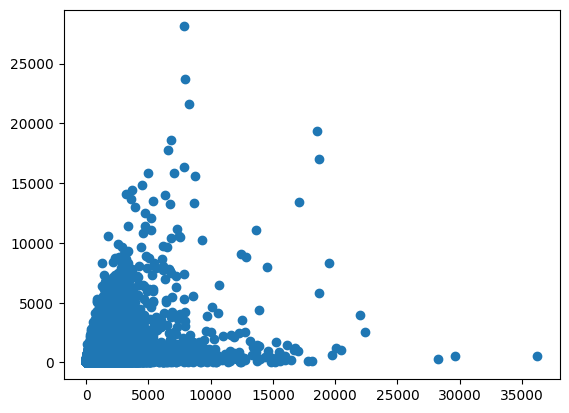

In [96]:
plt.scatter(timed_recommendations["helpful"], timed_recommendations["funny"])

(array([3.0914875e+07, 4.1507380e+06, 1.9145090e+06, 1.1708170e+06,
        8.2371600e+05, 6.2818500e+05, 4.9943900e+05, 4.1111000e+05,
        3.4570100e+05, 2.9567800e+05, 2.6000000e+01, 0.0000000e+00]),
 array([   0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,  800.,
         900., 1000., 1100., 1200.]),
 <BarContainer object of 12 artists>)

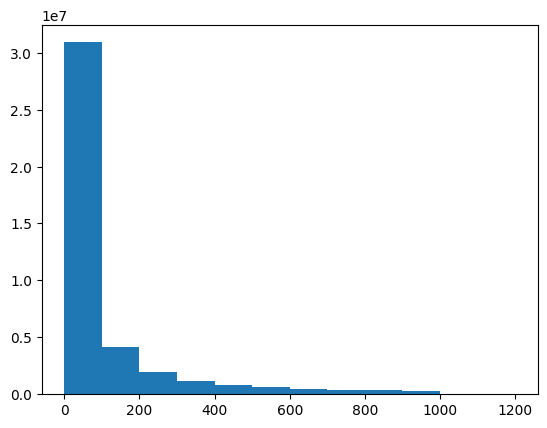

In [97]:
plt.hist(timed_recommendations["hours"], bins=range(0, 1300, 100))

In [98]:
30914875 + 4150738 + 1914509 + 1170817 + 823716 + 628185 + 499439 + 411110 + 345701 + 295704

41154794

(array([3.9334419e+07, 8.4184400e+05, 3.0583100e+05, 1.6383000e+05,
        1.0092700e+05, 6.9891000e+04, 5.0131000e+04, 3.7889000e+04,
        3.0010000e+04, 2.4006000e+04, 1.9580000e+04, 1.6202000e+04,
        1.3936000e+04, 1.1783000e+04, 1.0325000e+04, 9.1140000e+03,
        7.9240000e+03, 7.4390000e+03, 6.3250000e+03, 5.6300000e+03,
        5.0540000e+03, 4.6880000e+03, 4.0610000e+03, 3.7950000e+03,
        3.5080000e+03, 3.2650000e+03, 3.0020000e+03, 2.8660000e+03,
        2.7940000e+03]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.,
        110., 120., 130., 140., 150., 160., 170., 180., 190., 200., 210.,
        220., 230., 240., 250., 260., 270., 280., 290.]),
 <BarContainer object of 29 artists>)

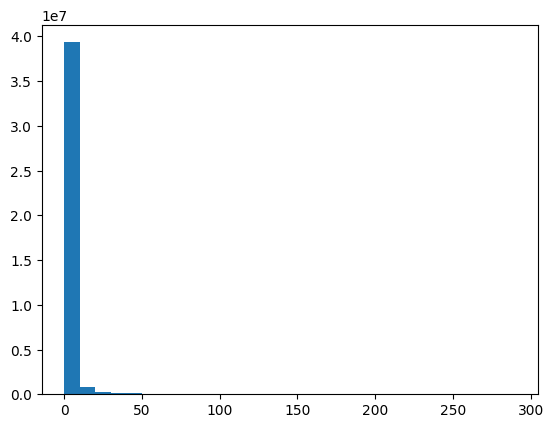

In [99]:
plt.hist(timed_recommendations["helpful"], bins=range(0, 300, 10))

(array([4.0626279e+07, 2.2679900e+05, 8.9692000e+04, 4.6599000e+04,
        2.9734000e+04, 2.1077000e+04, 1.5763000e+04, 1.2028000e+04,
        9.8380000e+03, 7.6870000e+03, 6.2840000e+03, 5.3690000e+03,
        4.5620000e+03, 4.1100000e+03, 3.6280000e+03, 3.1480000e+03,
        2.7280000e+03, 2.5360000e+03, 2.2450000e+03, 2.0030000e+03,
        1.7400000e+03, 1.6010000e+03, 1.4630000e+03, 1.4030000e+03,
        1.3160000e+03, 1.2390000e+03, 1.0900000e+03, 1.0110000e+03,
        1.0390000e+03]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.,
        110., 120., 130., 140., 150., 160., 170., 180., 190., 200., 210.,
        220., 230., 240., 250., 260., 270., 280., 290.]),
 <BarContainer object of 29 artists>)

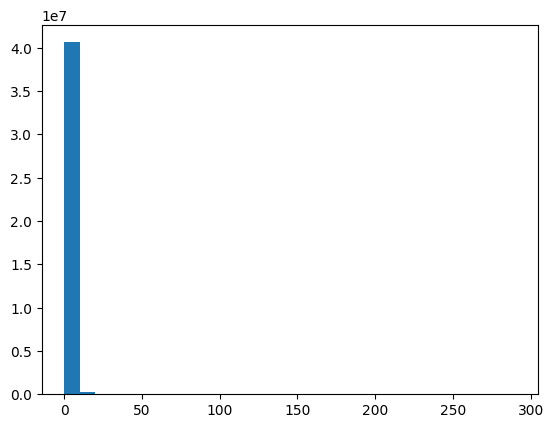

In [100]:
plt.hist(timed_recommendations["funny"], bins=range(0, 300, 10))

In [101]:
timed_recommendations["log_trans_hours"] = np.log1p(timed_recommendations["hours"])
timed_recommendations["hours_norm"] = scaler.fit_transform(timed_recommendations[["log_trans_hours"]])
timed_recommendations["log_trans_helpful"] = np.log1p(timed_recommendations["helpful"])
timed_recommendations["helpful_norm"] = scaler.fit_transform(timed_recommendations[["log_trans_helpful"]])
timed_recommendations["log_trans_funny"] = np.log1p(timed_recommendations["funny"])
timed_recommendations["funny_norm"] = scaler.fit_transform(timed_recommendations[["log_trans_funny"]])
timed_recommendations.drop(columns=["helpful", "funny", "hours", "log_trans_hours", "log_trans_helpful", "log_trans_funny"], inplace=True)
timed_recommendations

,app_id,date,is_recommended,user_id,hours_norm,helpful_norm,funny_norm
0,975370,2022-12-12,1,51580,0.523827,0.000000,0.000000
1,304390,2017-02-17,0,2586,0.365584,0.153321,0.000000
2,1085660,2019-11-17,1,253880,0.842636,0.104658,0.000000
3,703080,2022-09-23,1,259432,0.484369,0.000000,0.000000
4,526870,2021-01-10,1,23869,0.316418,0.000000,0.000000
...,...,...,...,...,...,...,...
41154789,633230,2021-02-15,1,1606890,0.541005,0.000000,0.000000
41154790,758870,2019-07-18,0,1786254,0.318035,0.209316,0.000000
41154791,696170,2018-03-26,0,6370324,0.159017,0.132064,0.234081
41154792,696170,2018-06-11,1,1044289,0.232956,0.000000,0.000000


In [102]:
%pwd

'C:\\Users\\ritis\\Desktop\\Game_RecSys'

In [103]:
# Version 1 of the cleaned and prepared data for further processes, for now.
os.makedirs("cleaned_data", exist_ok=True)
timed_games.to_csv("cleaned_data/final_games.csv")
timed_games_metadata.to_csv("cleaned_data/final_games_metadata.csv")
users.to_csv("cleaned_data/final_users.csv")
timed_recommendations.to_csv("cleaned_data/final_recs.csv")

In [104]:
%ls

 Volume in drive C is Windows-SSD
 Volume Serial Number is 284D-8FBA

 Directory of C:\Users\ritis\Desktop\Game_RecSys

10-01-2026  14:53    <DIR>          .
03-01-2026  18:01    <DIR>          ..
03-01-2026  19:21    <DIR>          .ipynb_checkpoints
03-01-2026  18:27    <DIR>          anaconda_projects
10-01-2026  14:52    <DIR>          cleaned_data
10-01-2026  14:40    <DIR>          data
10-01-2026  14:40       692,315,526 game-recommendations-on-steam.zip
10-01-2026  14:53           527,670 recsys.ipynb
               2 File(s)    692,843,196 bytes
               6 Dir(s)  68,361,142,272 bytes free


Now, that data prerparation is done for the project's version 1, it is time to finalize the design decisions for version 1.

It is now the execution phase of the above design decisions.

In [1]:
# Clearing up the memory before starting implementatiion
import gc
del games
del semantic_emptiness_check_cols
del users
del metadata
del recommendations
del timed_games
del timed_games_metadata
del timed_recommendations
gc.collect()

NameError: name 'games' is not defined

In [1]:
import os
import shutil

if os.path.exists("interactions_tabular_data_done"):
    shutil.rmtree("interactions_tabular_data_done")

In [2]:
# Constructing the interactions table first then matrix using saved final_recommendations dataset.
# import os
import numpy as np
import pandas as pd
os.makedirs("interactions_tabular_data_done", exist_ok=True)
recs = pd.read_csv("cleaned_data/final_recs.csv", index_col=["Unnamed: 0"])
recs

,app_id,date,is_recommended,user_id,hours_norm,helpful_norm,funny_norm
0,975370,2022-12-12,1,51580,0.523827,0.000000,0.000000
1,304390,2017-02-17,0,2586,0.365584,0.153321,0.000000
2,1085660,2019-11-17,1,253880,0.842636,0.104658,0.000000
3,703080,2022-09-23,1,259432,0.484369,0.000000,0.000000
4,526870,2021-01-10,1,23869,0.316418,0.000000,0.000000
...,...,...,...,...,...,...,...
41154789,633230,2021-02-15,1,1606890,0.541005,0.000000,0.000000
41154790,758870,2019-07-18,0,1786254,0.318035,0.209316,0.000000
41154791,696170,2018-03-26,0,6370324,0.159017,0.132064,0.234081
41154792,696170,2018-06-11,1,1044289,0.232956,0.000000,0.000000


In [3]:
# First, finding the values to be filled in the matrix using weighted sum of explicit and implicit signals.
# For now, not learning the weights for that. Because, we do not have an optimization problem yet to max-/minimize.
w0 = 1.0 #explicit signal weight
w1 = 0.4 #implicit signal weight
cell_values = w0 * np.array(recs["is_recommended"]) + w1 * np.array(recs["hours_norm"])
cell_vals = pd.Series(cell_values)
interactions_table = pd.DataFrame({"app_id" : recs["app_id"], "user_id" : recs["user_id"], "intn_timestamp" : recs["date"], "intn_cell_value" : cell_vals})
# This table is canonical. Matrix will be deerived from it.
# A matrix is a model-specific representation.
interactions_table.to_csv("interactions_tabular_data_done/canonical_interactions_table.csv")
interactions_table

,app_id,user_id,intn_timestamp,intn_cell_value
0,975370,51580,2022-12-12,1.209531
1,304390,2586,2017-02-17,0.146234
2,1085660,253880,2019-11-17,1.337054
3,703080,259432,2022-09-23,1.193748
4,526870,23869,2021-01-10,1.126567
...,...,...,...,...
41154789,633230,1606890,2021-02-15,1.216402
41154790,758870,1786254,2019-07-18,0.127214
41154791,696170,6370324,2018-03-26,0.063607
41154792,696170,1044289,2018-06-11,1.093183


In [4]:
import gc
del cell_values
del cell_vals
del recs
gc.collect()

0

In [5]:
# After building the interaction table, it is time to split the data using given-n protocol.
interactions_grouped = interactions_table.sort_values(["user_id", "intn_timestamp"]).groupby("user_id", sort=False)
interactions_grouped

In [6]:
interactions_grouped.ngroups #it is confirmed that the users are unique here in groupings as seen before.

13781059

In [7]:
# Checking whether the grouping and hence the sorting by timestamps is done correctly.
import random
random_user_id = random.sample(list(interactions_table["user_id"]), k=1)
print(random_user_id)
print(interactions_table[interactions_table["user_id"] == random_user_id[0]])
interactions_grouped.get_group(random_user_id[0])

[89911]
           app_id  user_id intn_timestamp  intn_cell_value
6307908    704270    89911     2021-07-20         1.141406
10653740   967050    89911     2022-06-25         0.053051
10829436   379720    89911     2021-08-14         1.135025
11092629   298110    89911     2021-01-03         1.260399
11096601   274170    89911     2021-07-15         1.201733
14890759      240    89911     2021-12-30         1.202789
15087184   107410    89911     2021-08-27         1.103738
16042618    12210    89911     2021-12-18         1.149825
20455980   218620    89911     2020-03-26         1.114294
21058754   223470    89911     2021-12-18         1.106563
21279728      550    89911     2022-01-30         1.214153
21875494   548430    89911     2022-11-12         1.180265
22393363   438740    89911     2022-05-02         1.136688
23244394   629520    89911     2021-05-05         1.301299
23775922   219150    89911     2021-07-15         1.132144
24621013   552520    89911     2021-07-05       

,app_id,user_id,intn_timestamp,intn_cell_value
20455980,218620,89911,2020-03-26,1.114294
11092629,298110,89911,2021-01-03,1.260399
23244394,629520,89911,2021-05-05,1.301299
24621013,552520,89911,2021-07-05,1.271458
31928263,24240,89911,2021-07-05,1.145768
11096601,274170,89911,2021-07-15,1.201733
23775922,219150,89911,2021-07-15,1.132144
26135780,1238840,89911,2021-07-15,1.244639
6307908,704270,89911,2021-07-20,1.141406
25608427,225540,89911,2021-08-10,1.207798


In [8]:
# interactions_train = []
# interactions_test = []
# Splitting the interactions data by index, not by complete rows accroding to timestamps.
# It is easier to perform as operations are just on indices and no such mini-dataframes creation and their management.
# Just purely access by the index-based operations and hence, the results.
train_idx = []
test_idx = []
for userid_key, entries in interactions_grouped:
    
    no_of_intns = len(entries)
    # Skipping any users with too few interactions; already done earlier but anyways.
    if no_of_intns < 2: #document this fewer ones choice; still indecisive.
        continue

    # Splitting as 80% train and the rest as test by fraction for given-n
    #percentage-based splitting for given-n.
    split_index = int(0.8 * no_of_intns)
    # train, test = entries.iloc[:split_index], entries.iloc[split_index:]
    
    # interactions_train.append(train)
    # interactions_test.append(test)
    train_idx.extend(entries.index[:split_index])
    test_idx.extend(entries.index[split_index:])
    
# interactions_train_df = pd.concat(interactions_train, ignore_index=True)
# interactions_test_df = pd.concat(interactions_test, ignore_index=True)
# Now, after the splitting is done by index, just need to access the rows in the interactions dataframe by splitted train and test indices. Much easier and faster performance.
interactions_train_df = interactions_table.loc[train_idx].reset_index(drop=True)
interactions_test_df  = interactions_table.loc[test_idx].reset_index(drop=True)

In [9]:
del interactions_grouped
gc.collect()

0

In [10]:
interactions_train_df

,app_id,user_id,intn_timestamp,intn_cell_value
0,63710,0,2014-06-16,0.063607
1,260230,0,2014-06-25,0.108373
2,267060,0,2014-09-02,0.146234
3,8850,0,2014-09-08,1.239416
4,226960,0,2014-09-22,0.040132
...,...,...,...,...
24072701,280,14306048,2020-02-23,0.164713
24072702,225020,14306052,2021-07-09,1.269453
24072703,224960,14306052,2021-11-24,1.103738
24072704,8000,14306052,2021-12-14,1.138832


In [11]:
interactions_test_df

,app_id,user_id,intn_timestamp,intn_cell_value
0,591960,0,2020-07-02,0.228208
1,221910,0,2021-09-26,1.175157
2,214490,0,2021-11-27,1.215709
3,1454400,0,2022-02-18,1.384327
4,222880,0,2022-02-22,1.295093
...,...,...,...,...
9509056,22370,14306040,2022-03-12,1.010556
9509057,851850,14306047,2022-08-09,1.200295
9509058,1782210,14306048,2022-09-16,1.192926
9509059,12210,14306052,2022-06-17,1.141406


In [12]:
24072706 + 9509061

33581767

In [13]:
41154794 - 33581767

7573027

In [14]:
# These 7.5 Million rows are the skipped ones by the no_of_interactions < 2 condition above in the splitting logic. Let's verify it below.

In [15]:
interactions_table.loc[~interactions_table.index.isin(set(train_idx) | set(test_idx))] #locates all those rows which are unique by index in either of thw train_idx or test_idx.

,app_id,user_id,intn_timestamp,intn_cell_value
1,304390,2586,2017-02-17,0.146234
6,238960,88282,2017-11-25,1.364245
9,289070,454422,2020-05-26,1.346674
15,306130,75422,2021-05-12,1.239044
28,1091500,474485,2021-02-01,1.272041
...,...,...,...,...
41154765,738520,6068582,2021-02-27,1.212111
41154768,1390350,13412326,2021-10-19,1.148504
41154773,760160,5020742,2021-09-11,1.232015
41154783,633230,492792,2021-06-22,1.120395


In [16]:
del train_idx
del test_idx
gc.collect()

0

In [17]:
interactions_table.sort_values("user_id")

,app_id,user_id,intn_timestamp,intn_cell_value
40342722,63710,0,2014-06-16,0.063607
30478477,235540,0,2015-10-17,1.181285
28001671,357900,0,2017-06-11,0.040132
34510797,627690,0,2022-03-06,1.269066
29135753,267060,0,2014-09-02,0.146234
...,...,...,...,...
5228835,397540,14306059,2020-11-25,1.294524
39735230,1112830,14306060,2020-10-10,1.040132
23151356,1407200,14306061,2022-09-02,1.298027
25486974,1987080,14306062,2022-08-28,1.162308


In [18]:
# Doing some sanity checks for correct time-aware spillting by given-n protocol.

# Checks whether all the users in the test set are seen in train set
assert set(interactions_test_df["user_id"]).issubset(set(interactions_train_df["user_id"]))

# Checks whether the timestamps in train are earlier than the timestamps in test set.
assert interactions_train_df["intn_timestamp"].min() <= interactions_test_df["intn_timestamp"].min()
assert interactions_train_df["intn_timestamp"].max() <= interactions_test_df["intn_timestamp"].max()

# Checks whether train and test both havve different rows of data -- no same rows in both. No overlap.
assert len(pd.merge(interactions_train_df, interactions_test_df, on = ["user_id", "app_id", "intn_timestamp"], how = "inner")) == 0

In [19]:
# The code written here without loops is for optimizing the loops thing, rather replace them.
# Sort of code is from claude Ai for optimization of speed.

# Further splitting the train set into final train and dev sets -- training and optimizing purposes.
# final_train_idx = []
# validation_idx = []

# final_train = []
# validation = []

interactions_train_df_sorted = interactions_train_df.sort_values(["user_id", "intn_timestamp"]).reset_index(drop=True)
grouped = interactions_train_df_sorted.groupby("user_id", sort=False)
entries_counts_per_user = grouped.size()
# interactions_train_df_grouped = interactions_train_df.sort_values(["user_id", "intn_timestamp"]).groupby("user_id", sort=False)
#--somehow check for timestamps being sorted before proceeding with split.

# for user_id, entries in interactions_train_df_grouped:
    # num_intrns_per_user = len(entries)
    # if num_intrns_per_user<2:
        # continue

# Filter out users with <2 interactions upfront
valid_users = entries_counts_per_user[entries_counts_per_user >= 2].index
interactions_train_df_sorted = interactions_train_df_sorted[interactions_train_df_sorted["user_id"].isin(valid_users)]

# Recalculate groups after filtering users with <2.
grouped = interactions_train_df_sorted.groupby("user_id", sort = False)
entries_counts_per_user = grouped.size()

    # split = int(0.7 * num_intrns_per_user)
# Calculate the split indices -- 70% train; 30% dev
split_indices = (0.6 * entried_counts_per_user).astype(int)

    # final_train_idx.extend(entries.index[:split])
    # validation_idx.extend(entries.index[split:])

    # final_train.append(entries.iloc[:split])
    # validation.append(entries.iloc[split:])

# Creating a cumulative count (re-numbering/re-indexing each of the groupp's items/entries) to determine train vs dev
interactions_train_df_sorted["row_num_cum_counted"] = grouped.cumcount()
interactions_train_df_sorted["split_point_in_each_grp"] = interactions_train_df_sorted["user_id"].map(split_indices)

# Simply use boolean indexing instead of looping via a train mask.
final_train_mask = interactions_train_df_sorted["row_num_cum_counted"] < interactions_train_df_sorted["split_point_in_each_grp"]

# interactions_final_train_df = interactions_table.loc[final_train_idx].reset_index(drop=True)
# interactions_validation_df = interactions_table.loc[validation_idx].reset_index(drop=True)

# interactions_final_train_df = pd.concat(final_train, ignore_index=True)
# interactions_validation_df = pd.conccat(validation, ignore_index=True)

interactions_final_train_df = interactions_train_df_sorted[final_train_mask].drop(columns=["row_num_cum_counted", "split_point_in_each_grp"], axis=1).reset_index(drop=True)
interactions_validation_df = interactions_train_df_sorted[~final_train_mask].drop(columns=["row_num_cum_counted", "split_point_in_each_grp"], axis=1).reset_index(drop=True)

In [20]:
del interactions_train_df_sorted
del grouped
del entried_counts_per_user
del valid_users
del split_indices
del final_train_mask
gc.collect()

0

In [21]:
interactions_final_train_df

,app_id,user_id,intn_timestamp,intn_cell_value
0,63710,0,2014-06-16,0.063607
1,260230,0,2014-06-25,0.108373
2,267060,0,2014-09-02,0.146234
3,8850,0,2014-09-08,1.239416
4,226960,0,2014-09-22,0.040132
...,...,...,...,...
11463883,246900,14306035,2014-08-05,1.198445
11463884,487000,14306037,2019-11-03,1.238388
11463885,976310,14306047,2019-11-26,1.292928
11463886,4500,14306048,2019-10-22,1.270707


In [22]:
interactions_validation_df

,app_id,user_id,intn_timestamp,intn_cell_value
0,339160,0,2017-06-16,0.152795
1,526740,0,2017-06-18,0.053051
2,423880,0,2017-06-18,0.040132
3,365300,0,2017-06-26,0.063607
4,602890,0,2017-07-30,0.053051
...,...,...,...,...
10172435,1118200,14306047,2021-02-05,1.325365
10172436,871720,14306047,2021-12-31,1.034031
10172437,280,14306048,2020-02-23,0.164713
10172438,224960,14306052,2021-11-24,1.103738


In [23]:
11463888 + 10172440

21636328

In [24]:
24072706  - 21636328

2436378

In [25]:
# interactions_train_df.loc[~interactions_train_df.index.isin(set(final_train_idx) | set(validation_idx))]
interactions_train_df[~((interactions_train_df.user_id.isin(interactions_final_train_df.user_id)) | (interactions_train_df.user_id.isin(interactions_validation_df.user_id)))]

,app_id,user_id,intn_timestamp,intn_cell_value
25,552990,3,2020-07-05,1.299391
26,617290,6,2022-02-19,1.184002
27,469600,10,2021-10-13,1.191248
42,825630,19,2021-09-01,0.238104
51,1288310,30,2021-02-16,1.083088
...,...,...,...,...
24072686,359550,14306025,2020-07-10,1.258164
24072687,10,14306029,2020-09-13,1.264625
24072695,674940,14306038,2021-11-02,1.104695
24072696,244450,14306040,2019-11-21,1.338828


In [26]:
# del final_train_idx
# del validation_idx
# gc.collect()

In [27]:
# Again, checking for sanity -- being subsets and ordered by timestamps properly
# assert set(interactions_validation_df.user_id).issubset(set(interactions_final_train_df.user_id)) -- not needed for train-valid sets because valid is used for model selection and all, not for evaluation.
# assert interactions_final_train_df.intn_timestamp.max() <= interactions_validation_df.intn_timestamp.max()
# per-user chronological order check
# for user_id, train_grp in interactions_final_train_df.groupby("user_id"):
#     val_grp = interactions_validation_df[
#         interactions_validation_df.user_id == user_id
#     ]
#     if len(val_grp) == 0:
#         continue
#     assert train_grp.intn_timestamp.max() <= val_grp.intn_timestamp.min()

# Optimized assertion for the above looping in a single statement. Given by Claude AI.
assert (interactions_final_train_df.groupby("user_id")["intn_timestamp"].max() <= interactions_validation_df.groupby("user_id")["intn_timestamp"].min()).all()

# Any duplicates in both?
assert len(pd.merge(interactions_final_train_df, interactions_validation_df, on=["user_id", "app_id", "intn_timestamp"])) == 0

In [1]:
# By Claude AI
# Get all user-defined variable names
[k for k in globals().keys() if not k.startswith('_') and k not in ['In', 'Out', 'get_ipython', 'exit', 'quit']]

['open']

In [2]:
print(interactions_final_train_df.shape[0] + interactions_validation_df.shape[0] + interactions_test_df.shape[0])
print(interactions_table.shape[0])

NameError: name 'interactions_final_train_df' is not defined

In [30]:
41154794 - 31145389

10009405

In [31]:
7573027 + 2436378

10009405

In [32]:
del interactions_table
del interactions_train_df
gc.collect()

0

In [1]:
os.makedirs("interactions_tabular_data_done/splitted_data", exist_ok=True)
interactions_final_train_df.to_csv("interactions_tabular_data_done/splitted_data/train_split.csv")
interactions_validation_df.to_csv("interactions_tabular_data_done/splitted_data/validation_dev_split.csv")
interactions_test_df.to_csv("interactions_tabular_data_done/splitted_data/test_split.csv")

NameError: name 'os' is not defined

In [37]:
del interactions_final_train_df
del interactions_validation_df
del interactions_test_df
gc.collect()

0

Time for model-agnostic code implementations' and evaluations' loop execution.

In [1]:
# By Claude AI
# Get all user-defined variable names
[k for k in globals().keys() if not k.startswith('_') and k not in ['In', 'Out', 'get_ipython', 'exit', 'quit']]

['open']

In [2]:
# From Claude Ai
import sys
sys.stdout.flush()
sys.stderr.flush()

In [3]:
import pandas as pd
import numpy as np
import random
from abc import ABCMeta, abstractmethod
from scipy.sparse import csr_matrix, diags
from tqdm.auto import tqdm
from collections import defaultdict

# For global reproducibility
GLOBAL_SEED = 42
rng = np.random.default_rng(GLOBAL_SEED)
random.seed(GLOBAL_SEED)

# To handle mmemory overheads -> dtype conversions
interactions = pd.read_csv("interactions_tabular_data_done/canonical_interactions_table.csv", index_col="Unnamed: 0", dtype={'app_id':'int32', 'user_id':'int32', 'intn_cell_value':'float32'})
train = pd.read_csv("interactions_tabular_data_done/splitted_data/train_split.csv", index_col="Unnamed: 0", dtype={'app_id':'int32', 'user_id':'int32', 'intn_cell_value':'float32'})
# dev = pd.read_csv("interactions_tabular_data_done/splitted_data/validation_dev_split.csv", index_col="Unnamed: 0", dtype={'app_id':'int32', 'user_id':'int32', 'intn_cell_value':'float32'})
test = pd.read_csv("interactions_tabular_data_done/splitted_data/test_split.csv", index_col="Unnamed: 0", dtype={'app_id':'int32', 'user_id':'int32', 'intn_cell_value':'float32'})

# all_items = set(interactions["app_id"].unique())
# NEW: Convert to numpy array once for faster sampling -- suggested by Claude AI.
all_items = interactions["app_id"].unique()
all_items_array = np.array(list(all_items))

# ALL THE BELOW EVALUATION CODE IS UNDER SAMPLING BIAS AS IN DONE UNDER A SAMPLED SET OF DATA, NOT FULL CORPUS OF DATA AVAILABLE.

# # Doing sampling from the train set because 3.7 million unique users are very large to compute over.
# all_train_users = train["user_id"].unique()
# SAMPLE_SIZE_USERS = 10000
# iterable_train_users = rng.choice(all_train_users, size=min(SAMPLE_SIZE_USERS, len(all_train_users)), replace=False) # no replacement of rows
# print(f"Evaluating on {len(iterable_train_users):,} out of {len(all_train_users):,} users")

In [4]:
# For now; RAM issues.
import gc
del all_items
gc.collect()

10

In [5]:
# Precompute once -- for faster performance. Suggested by GPT
user_items = (train.groupby("user_id")["app_id"].apply(set).to_dict())

user_items_with_values = (train.groupby("user_id")[["app_id", "intn_cell_value"]].apply(lambda df: list(zip(df["app_id"], df["intn_cell_value"]))).to_dict())

item_interactions = (train.groupby("app_id").size().to_dict())

In [6]:
# Precompute test data per user -- Suggested by Claude AI
test_items_per_user = test.groupby("user_id")["app_id"].apply(set).to_dict()

print("Done with pre-computation of users' items.")

def average_precision_at_k(rankings, relevancy, K):
    
    if len(relevancy) == 0: # no point if no relevant items to produce
        return 0.0
    
    correct_hits = 0
    pak = 0.0
    
    for rank, item in enumerate(rankings[:K], start=1):
        if item in relevancy:
            correct_hits += 1
            pak += correct_hits/rank
                
    return pak / min(len(relevancy), K)

# In addition metrics to MAP@K for better offline evaluation
def recall_at_k(rankings, relevancy, K):

    if len(relevancy) == 0: # no point if no relevant items to produce
        return 0.0

    return (len(set(rankings[:K]) & relevancy) / len(relevancy))

def ndcg_at_k(rankings, relevancy, K):
    
    if len(relevancy) == 0: # no point if no relevant items to produce
       return 0.0
    
    dcg = 0.0
    idcg = 0.0
    
    for i, item in enumerate(rankings[:K], start=1):
        if item in relevancy:
            dcg += (1/np.log2(i+1))
    
    ideal_rankings = min(len(relevancy), K) # because relevancy can be less than K sometimes
    idcg = sum((1/np.log2(i + 1)) for i in range(1, ideal_rankings + 1))
    
    return dcg/idcg if idcg > 0 else 0.0

# This evaluation isolates ranking quality under controlled candidate sets rather than full-corpus retrieval. Evaluating only the ranking quality here; not complete end-to-end recommender pipeline.
def candidates_per_user(userid, candidate_items, train_dict, test_dict, rng, SAMPLE_SIZE_ITEMS_SET=1000):

    """
    userid = specific user under consideration for their recommendations' evaluation.
    candidate_items = all the recommendable items in the system. Unrelated to the user in everyway.
    train_df = training set.
    test_df = testing set.
    """

    train_items_user = train_dict.get(userid, set())
    
    # Ground truth retrieval and
    # Relevance definition -- relevant is the one which the user either recommended or played for a significant amount of hours, which is already captured earlier in the interaction signal value before splitting.
    relevant_items_user = test_dict.get(userid, set())
    if len(relevant_items_user) == 0:
        return None

    # Candidate generation but sampled -- because of the results of the above candidate set.
    # candidate_items = set(model.candidate_generation(userid, SAMPLE_SIZE_ITEMS_SET))
    
    # num_negatives_needed = SAMPLE_SIZE_ITEMS_SET - len(relevant_items_user) # because we want the final candidate set to contain exactly SAMPLE_SIZE_ITEMS items, while guaranteeing all relevant items are present and negatives are uncontaminated
    # negative_pool_to_sample_from = list(candidate_items - train_items_user - relevant_items_user)
    # sampled_negatives = rng.choice(negative_pool_to_sample_from, size=min(num_negatives_to_sample_from, len(negative_pool_to_sample_from)), replace=False)
    # potential_candidate_items_user = set(sampled_negatives) | relevant_items_user # To guarantee that relevant items per user appear in the candidates along with non-relevant ones, which we removed explicitly ealier during negative sampling.

    # Claude
    # OPTIMIZED: Create boolean mask for valid negatives
    num_negatives_needed = SAMPLE_SIZE_ITEMS_SET - len(relevant_items_user)
    
    # Create mask for items that are NOT in train or test for this user
    excluded_items = train_items_user | relevant_items_user
    
    # OPTIMIZED: Filter using numpy boolean indexing
    valid_negatives_mask = ~np.isin(candidate_items, list(excluded_items))
    valid_negatives = candidate_items[valid_negatives_mask]
    
    # Sample negatives
    num_to_sample = min(num_negatives_needed, len(valid_negatives))
    sampled_negatives = rng.choice(valid_negatives, size=num_to_sample, replace=False)

    potential_candidate_items_user = set(sampled_negatives) | relevant_items_user # To guarantee that relevant items per user appear in the candidates along with non-relevant ones, which we removed explicitly ealier during negative sampling.

    if len(potential_candidate_items_user) == 0:
        return None

    return potential_candidate_items_user, relevant_items_user

def ranker_per_model(model, userid, candidate_items):

    """
    Model-agnostic ranking wrapper. Separated from candidates sampling and generation.
    """
    
    # model scoring and ranking
    # An imp bit here is that some models are scorers while others are recommenders, based on their outputs.
    # This is an inconsistency that needs to be addressed. Interface inconsistency -- either all return scores or ranked lists. Both is not ideal.
    scores = model.score_candidates(userid, candidate_items)
    # ranked_items = sorted(candidate_items, key=lambda item: scores.get(item, 0.0), reverse=True)
    # Introducing gated rankers requires the ranking layer to explicitly handle abstentions, as latent models may deliberately refuse to score unreliable user–item pairs
    ranked_items = sorted(
    candidate_items,
    key=lambda item: scores[item] if scores.get(item) is not None else float("-inf"),
    reverse=True
)
    
    return ranked_items

def evaluate_model(ranked_items, relevant_items, k):

    # per-user evaluation
    ap_at_k = average_precision_at_k(ranked_items, relevant_items, k)
    recall_k = recall_at_k(ranked_items, relevant_items, k)
    ndcg_k = ndcg_at_k(ranked_items, relevant_items, k)
    return ap_at_k, recall_k, ndcg_k

Done with pre-computation of users' items.


In [7]:
del test
gc.collect()

0

In [8]:
# Creating a base class for all models to inherit.
class base_recommender(metaclass=ABCMeta):

    # Every model has its own way to deal with items so, diff ways of generating candidates. Also, because some are scorers while others are rankers hence, definitely different.
    @abstractmethod
    def candidate_generation(self, user_id, candidates_set_size):
        pass
    
    # This method is in base class because user-item matrix is necessity for recommender algorithms as an input.
    @staticmethod
    def construct_user_item_matrix(train_df):
            
        # Building the user-item matrix first -- this will be sparse because every user has not interacted with each item.
        user_ids = train_df["user_id"].unique()
        item_ids = train_df["app_id"].unique()
        
        # Having the users and apps for the rows and cols, it is better to do ID to index mapping for easier matrix construction as safer matrix indexing is possible..
        user_to_idx = {user: i for i, user in enumerate(user_ids)}
        item_to_idx = {item : j for j, item in enumerate(item_ids)}
        
        # Map the dataframe to these indices now
        row_indices = train_df["user_id"].map(user_to_idx)
        col_indices = train_df["app_id"].map(item_to_idx)
        
        # Matrix cell values
        data = train_df["intn_cell_value"]
        
        # Constructing the matrix
        user_item_matrix = csr_matrix((data.values, (row_indices.values, col_indices.values)), shape=(len(user_ids), len(item_ids)))
        
        return user_item_matrix, item_to_idx, user_to_idx

    @abstractmethod
    def score_candidates(self, user_id, candidate_items):
        pass

# Creating Randomness baseline first to have a grounded floor for the upcoming baselines and models to at least not be noisy in this regard and perform better than this.
# Also, this is not a recommender.
class RandomModel(base_recommender):

    def __init__(self, train_df, rng):
        self.train_df = train_df
        self.rng = rng
    
    def candidate_generation(self, user_id, candidates_set_size):
        candidates = self.train_df["app_id"].unique()
        return list(np.random.choice(candidates, size=min(candidates_set_size, len(candidates)), replace=False))
    
    def score_candidates(self, user_id, candidate_items):
        scores = {}
        for item in candidate_items:
            scores[item] = self.rng.random()
        return scores

# Creating the popularity based recommender model class with leave-one-user-out philosophy -- First recommender model i.e., baseline, need to beat to further move.
# We use a popularity-based baseline where item scores are computed as the mean interaction strength across all users.
class PopularityBasedModel(base_recommender):

    # Global mean over all the interactions cell values per item for popularity of them.
    def __init__(self, interactions_df):
        # From Claude AI
        # Pre-compute global popularity
        self.interactions_df = interactions_df
        self.global_stats = (self.interactions_df.groupby("app_id")["intn_cell_value"].agg(['sum', 'count']))
        self.global_stats["score"] = (self.global_stats["sum"] / (self.global_stats["count"].replace(0, np.nan)))
        self.global_stats["score"] = self.global_stats["score"].fillna(0.0)
        self.sorted_scores = self.global_stats.sort_values("score", ascending=False)

    def candidate_generation(self, user_id, candidates_set_size):
        user_interacted_items = set(self.interactions_df[self.interactions_df["user_id"] == user_id]["app_id"])
        sorted_candidates = self.sorted_scores.index[:candidates_set_size]
        candidates = [item for item in sorted_candidates if item not in user_interacted_items]
        return candidates
    
    def score_candidates(self, user_id, candidate_items):
        scores = {}
        for item in candidate_items:
            scores[item] = float(self.sorted_scores["score"].get(item, 0.0))
        return scores

# The real recommender models begin here. This is the first Collaborative Filtering algorithm model based on Items.
# This builds the user-item matrix, from which further builds the pruned cosine similarity matrix crucial for Item-item CF.
# Does the heart of the recommender formula implementation with careful handling to remove the self-interaction items.
class ItemItemCFModel(base_recommender):

    def __init__(self, train_df, user_items_with_values, user_items, top_K):
        self.train_df = train_df
        self.user_items_with_values = user_items_with_values
        self.user_items = user_items
        # This the top_K for per user-interacted item
        self.top_K = top_K
        # Construct the matrices once
        self.user_item_matrix, self.item_to_idx, self.user_to_idx = self.construct_user_item_matrix(train_df)
        # Construct the item-item cosine similarity matrix
        self.item_item_sim_matrix = self._item_item_sim_matrix()
        # Construct the pruned cossim matrix/graph once
        self.top_similar_items = self._pruned_item_item_cossim_matrix()
        # Memory opts.
        del self.item_item_sim_matrix
        del self.user_item_matrix
        gc.collect()

    def _item_item_sim_matrix(self):
        # Building the item-item similarity matrix using Cosine Similarity by Matrix Multiplication
        co_occurence_matrix = (self.user_item_matrix.T).dot(self.user_item_matrix) # How many common users b/w the two items?
        item_norms = np.sqrt(co_occurence_matrix.diagonal()) + 1e-12 # divisors in the cosine sim formula i.e., magnitude of each item vector, and avoid division by zero.
        normalization_matrix = diags(1/item_norms) # for normalized similarity matriix construction.
        cosine_similarity_matrix = normalization_matrix.dot(co_occurence_matrix).dot(normalization_matrix) # Twice dot product to cancel the magnitude calculation.
        cosine_similarity_matrix.setdiag(0) # An item cannot be recommended for itself when Top-K similars are being recommended.
        cosine_similarity_matrix.eliminate_zeros() # For faster similar items' lookup. Kinda like garbage collection for sparse math to free up stored-zero values from memory.
        return cosine_similarity_matrix

    def _pruned_item_item_cossim_matrix(self):
        # Now, for faster computation and lookups, pruning the similarity matrix to Top-K similar items per item in the matrix.
        idx_to_item = {idx : item for item, idx in self.item_to_idx.items()}

        top_similar_items_per_item = {} # item graph
        
        for idx in range(self.item_item_sim_matrix.shape[0]):
            item = idx_to_item[idx]
            row = self.item_item_sim_matrix.getrow(idx)
            
            # Check if there are any non-interacted-with items due to which there are no non-trivial similarity values in that row.
            if row.nnz == 0:
                top_similar_items_per_item[item] = []
                continue

            row_items = list(zip(row.indices, row.data))
            sorted_row_items = sorted(row_items, key = lambda x : x[1], reverse=True)
            top_k_items = sorted_row_items[:self.top_K]
            top_similar_items_per_item[item] = [(idx_to_item[i], score) for i, score in top_k_items] # Creates an item similarity graph
        
        # This gives us a static item-item similarity graph/matrix/model pruned to Top-K neighbors per item, which is only a model representation. Not a recommender yet.
        # Which implies that personalization happens at the inference time, when recommender is in use actually.
        return top_similar_items_per_item
    
    def candidate_generation(self, user_id, candidates_set_size):
        candidates = []
        # user_interacted_items = set(self.train_df[self.train_df["user_id"] == user_id]["app_id"])
        # Claude - user int. items
        # user_interacted_items = set(self.train_df[self.train_df["user_id"] == user_id]["app_id"]) if user_id not in self.user_items_with_values else set([item for item, _ in self.user_items_with_values[user_id]])
        user_interacted_items = self.user_items.get(user_id, set())
        for item in user_interacted_items:
            sim_items = self.top_similar_items.get(item, [])
            for sitem, _ in sim_items:
                # Skipping the already interacted with items
                if sitem in user_interacted_items:
                    continue
                if sitem in candidates:
                    continue
                candidates.append(sitem)
        return candidates[:candidates_set_size]

    def score_candidates(self, user_id, candidate_items):

        #######
        # Finding similar items per user's interacted with items to further rank and hence, recommend from them.
        # core logic
        pred_score = {}

        # Pre-fetch due to faster access since user is the same in one run and this code will go in a class method -- no issues with userid.
        user_interacted_items_and_values = self.user_items_with_values.get(user_id, [])
        # user_interacted_items = set(user_interacted_items_and_values["app_id"])
        
        # Over each user interacted item
        for uitem, intn in user_interacted_items_and_values:
            
            # Over each pair of candidate items similar to user interacted item
            for item, sim in self.top_similar_items.get(uitem, []):

                # To avoid the already interacted items by the user from being ranked and hence, recommended.
                # GPT says that this if block turns a preference estimator into a recommender.
                # if item in user_interacted_items:
                    # continue

                if item not in candidate_items:
                    continue
                
                # Simi calcn b/w user int. item with the candidate items
                # Heart of the item CF recommender formula
                pred_score[item] = pred_score.get(item, 0.0) + sim * intn
                
        # By GPT.
        # In layman terms, heart of the recommender. Because of the per-user item-item CF scoring.
        # In a way, these are personalised list but not rankings yet, in my opinion. Because haven't produced any rankings till now
        return pred_score
        #################
        
        # Finding similar items per user's interacted with items to further rank and hence, recommend from them.
        # core logic
        # pred_score = {}
        # pred_score = 0.0
        
        # Pre-fetch due to faster access since user is the same in one run and this code will go in a class method -- no issues with userid.
        # user_interacted_items_and_values = self.train_df[self.train_df["user_id"] == user_id][["app_id", "intn_cell_value"]]
        # user_interacted_items = set(user_interacted_items_and_values["app_id"])
        
        # Over each user interacted item
        # for _, row in user_interacted_items_and_values.iterrows():

            # uitem = row["app_id"]
            # intn = row["intn_cell_value"]
            
            # Candidate items generation per user's each of the interacted items
            # ui_item_candidate_items = top_similar_items_per_item.get(row["app_id"], [])
            
            # Over each pair of candidate items similar to user interacted item
            # for neghsimitem, simscore in self.top_similar_items.get(uitem, []):
         
                # To avoid the already interacted items by the user from being ranked and hence, recommended.
                # GPT says that this if block turns a preference estimator into a recommender.
                # if item in user_interacted_items:
                    # continue
        
                # Simi calcn b/w user int. item with the candidate items
                # Heart of the item CF recommender formula
                # pred_score[item] = pred_score.get(item, 0.0) + sim * row["intn_cell_value"]

                # if neghsimitem == item_id:
                    # pred_score += simscore * intn
                
        # By GPT.
        # In layman terms, heart of the recommender. Because of the per-user item-item CF scoring.
        # In a way, these are personalised list but not rankings yet, in my opinion. Because haven't produced any rankings till now

        # return sorted(pred_score.items(), key=lambda x: x[1], reverse=True)
        # return pred_score
    
    # As said, heart. This is where the personalization lies.
    # def recommend(self, user_id):
    # The above code was here below.

        
# Building the USer-based CF model now. This is to see where does the collaborative signal lie -- user-side or item-side. Because the IBCF is performing well in a constrained, inductively biased environment.
# So, just for a comparative evaluation and to see whether personalization actually benefit from user signals.
class UserUserCFModel(base_recommender):

    def __init__(self, train_df, user_items_with_values, top_K):
        self.train_df = train_df
        self.user_items_with_values = user_items_with_values
        self.top_K = top_K
        self.user_item_interaction_matrix, self.item_to_idx, self.user_to_idx = self.construct_user_item_matrix(train_df)
        self.user_user_sim_matrix = self._user_user_sim_matrix()
        self.top_similar_users = self._pruned_user_user_cossim_matrix()

    def _user_user_sim_matrix(self):
        co_occurence_matrix = (self.user_item_interaction_matrix).dot(self.user_item_interaction_matrix.T) # how many common items between users?
        user_norms = np.sqrt(co_occurence_matrix.diagonal())
        normalization_matrix = diags(1/user_norms)
        cosine_sim_matrix_users = normalization_matrix @ co_occurence_matrix @ normalization_matrix
        cosine_sim_matrix_users.setdiag(0)
        cosine_sim_matrix_users.eliminate_zeros()
        return cosine_sim_matrix_users

    def _pruned_user_user_cossim_matrix(self):
        idx_to_user = {idx : user for user, idx in self.user_to_idx.items()}
        
        top_similar_users_per_user = {}

        for idx in range(self.user_user_sim_matrix.shape[0]):
            user = idx_to_user[idx]
            row = self.user_user_sim_matrix.getrow(idx)

            # Avoiding any user with no similar users to themselves
            if row.nnz == 0:
                top_similar_users_per_user[user] = []
                continue

            row_users = list(zip(row.indices, row.data))
            sorted_row_users = sorted(row_users, key=lambda x: x[1], reverse=True)
            top_k_users = sorted_row_users[:self.top_K]
            top_similar_users_per_user[user] = [(idx_to_user[u], score) for u, score in top_k_users]
        
        return top_similar_users_per_user
    
    def candidate_generation(self, user_id, candidates_set_size):
        user_id_sim_users = self.top_similar_users[user_id]
        candidates = []

        user_interacted_items = self.train_df[self.train_df["user_id"] == user_id]["app_id"].unique()
        
        for suser, _ in user_id_sim_users:
            suser_items = self.train_df[self.train_df["user_id"] == suser]["app_id"].unique()
            for item in suser_items:
                if item in user_interacted_items:
                    continue
                candidates.append(item)

        return candidates[:candidates_set_size]
    
    def score_candidates(self, user_id, candidate_items):

        pred_score = {}

        # user_interacted_items = set(self.train_df[self.train_df["user_id"] == user_id]["app_id"])
        user_id_similar_users = self.top_similar_users[user_id]

        for sim_user, sim_score in user_id_similar_users:

            sim_user_items_and_values = self.user_items_with_values.get(sim_user, [])
            # sim_user_items = set(sim_user_items_and_values["app_id"])

            for uitem, intn in sim_user_items_and_values:

                # item = row["app_id"]
                # intn = row["intn_cell_value"]

                # Skipping already interacted items by the user_id user.
                if uitem not in candidate_items:
                    continue

                pred_score[uitem] = pred_score.get(uitem, 0.0) + sim_score * intn
                
        return pred_score

In [9]:
# from tqdm.auto import tqdm
# K_VALUES = [5, 10]
# SAMPLE_SIZE_ITEMS = 1000 # to speedup things; otherwise hours took it.

# # Running and evaluating the RandomModel.
# randmodel = RandomModel(train, rng)

# ap_at_k5 = []
# ap_at_k10 = []
# recall_at_k5 = []
# recall_at_k10 = []
# ndcg_at_k5 = []
# ndcg_at_k10 = []

# for user in tqdm(iterable_train_users, desc = "Random Model"): # Iterate over each user in the sampled users set

#     candidate_items, relevant = candidates_per_user(user, all_items, train, test, SAMPLE_SIZE_ITEMS)

#     if candidate_items is None:
#         continue

#     rankings = ranker_per_model(randmodel, user, candidate_items)
    
#     result_rand = evaluate_model(rankings, relevant, K_VALUES[0])
    
#     if result_rand is None: # Handles None value for any of the three metric result values returned by evaluation function
#         continue
    
#     ap_k5, recall_k5, ndcg_k5 = result_rand
    
#     ap_at_k5.append(ap_k5)
#     recall_at_k5.append(recall_k5)
#     ndcg_at_k5.append(ndcg_k5)

#     result_rand = evaluate_model(rankings, relevant, K_VALUES[1])
    
#     if result_rand is None:
#         continue
    
#     ap_k10, recall_k10, ndcg_k10 = result_rand
    
#     ap_at_k10.append(ap_k10)
#     recall_at_k10.append(recall_k10)
#     ndcg_at_k10.append(ndcg_k10)
        
# map_at_k5_metric_rand = sum(ap_at_k5) / len(ap_at_k5) if ap_at_k5 else 0.0
# map_at_k10_metric_rand = sum(ap_at_k10) / len(ap_at_k10) if ap_at_k10 else 0.0
# print(f"MAP@5 for Random Model: {map_at_k5_metric_rand} | MAP@10 for Random Model: {map_at_k10_metric_rand}")
# recall_at_k5_metric_rand = sum(recall_at_k5) / len(recall_at_k5) if recall_at_k5 else 0.0
# recall_at_k10_metric_rand = sum(recall_at_k10) / len(recall_at_k10) if recall_at_k10 else 0.0
# print(f"Recall@5 for Random Model: {recall_at_k5_metric_rand} | Recall@10 for Random Model: {recall_at_k10_metric_rand}")
# ndcg_at_k5_metric_rand = sum(ndcg_at_k5) / len(ndcg_at_k5) if ndcg_at_k5 else 0.0
# ndcg_at_k10_metric_rand = sum(ndcg_at_k10) / len(ndcg_at_k10) if ndcg_at_k10 else 0.0
# print(f"NDCG@5 for Random Model: {ndcg_at_k5_metric_rand} | NDCG@10 for Random Model: {ndcg_at_k10_metric_rand}")

# # Running and evaluating the PopularityBasedModel.
# popmodel = PopularityBasedModel(train)

# ap_at_k5 = []
# ap_at_k10 = []
# recall_at_k5 = []
# recall_at_k10 = []
# ndcg_at_k5 = []
# ndcg_at_k10 = []

# for user in tqdm(iterable_train_users, desc = "Popularity Model"):

#     candidate_items, relevant = candidates_per_user(user, all_items, train, test, SAMPLE_SIZE_ITEMS)

#     if candidate_items is None:
#         continue

#     rankings = ranker_per_model(popmodel, userid, candidate_items)
    
#     result_pop = evaluate_model(rankings, relevant, K_VALUES[0])

#     if result_pop is None:
#         continue
    
#     ap_k5, recall_k5, ndcg_k5 = result_pop
    
#     ap_at_k5.append(ap_k5)
#     recall_at_k5.append(recall_k5)
#     ndcg_at_k5.append(ndcg_k5)
    
#     result_pop = evaluate_model(rankings, relevant, K_VALUES[1])

#     if result_pop is None:
#         continue
    
#     ap_k10, recall_k10, ndcg_k10 = result_pop
   
#     ap_at_k10.append(ap_k10)
#     recall_at_k10.append(recall_k10)
#     ndcg_at_k10.append(ndcg_k10)
        
# map_at_k5_metric_pop = sum(ap_at_k5) / len(ap_at_k5) if ap_at_k5 else 0.0
# map_at_k10_metric_pop = sum(ap_at_k10) / len(ap_at_k10) if ap_at_k10 else 0.0
# print(f"MAP@5 for Popularity Model: {map_at_k5_metric_pop} | MAP@10 for Popularity Model: {map_at_k10_metric_pop}")
# recall_at_k5_metric_pop = sum(recall_at_k5) / len(recall_at_k5) if recall_at_k5 else 0.0
# recall_at_k10_metric_pop = sum(recall_at_k10) / len(recall_at_k10) if recall_at_k10 else 0.0
# print(f"Recall@5 for Popularity Model: {recall_at_k5_metric_pop} | Recall@10 for Popularity Model: {recall_at_k10_metric_pop}")
# ndcg_at_k5_metric_pop = sum(ndcg_at_k5) / len(ndcg_at_k5) if ndcg_at_k5 else 0.0
# ndcg_at_k10_metric_pop = sum(ndcg_at_k10) / len(ndcg_at_k10) if ndcg_at_k10 else 0.0
# print(f"NDCG@5 for Popularity Model: {ndcg_at_k5_metric_pop} | NDCG@10 for Popularity Model: {ndcg_at_k10_metric_pop}")

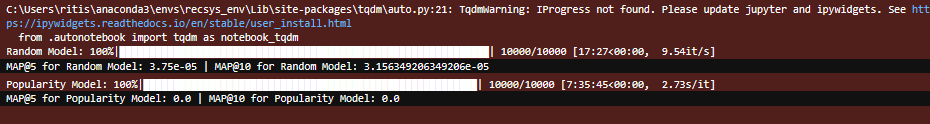

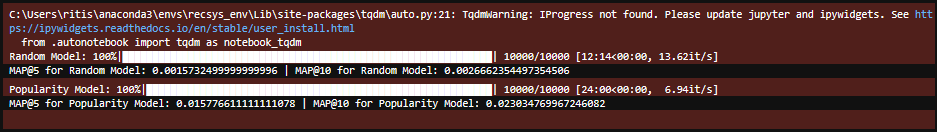

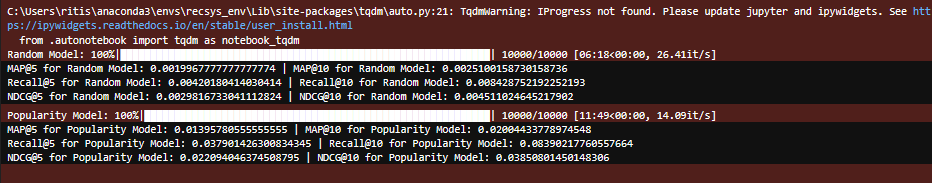

This ends the things done till now officially. Allowing us to move towards introducing personalization in the system and henceforth observe via the already asked questions by the previous metrics' results and the personalized-algorithms' own evaluation.

In [10]:
# # Grouping the user-item interactions by app_id to get the item vectors to hence construct iitem-similarity matrix.
# grouped_apps = train.groupby("app_id", sort=False)
# type(grouped_apps.indices)

In [11]:
# grouped_apps.get_group(63710)

In [12]:
# # Real disctionary of dicts is being created for the to-be-precomputed item-similarity matrix because this way is flexible and scalable as compared to building a user-item matrix.
# # As the indices of all values in the item vectors need to be the same as in shared users because they represent user interactions with that user.
# item_vectors = {}
# for x, y in grouped_apps:
#     # print(f'{pd.concat([y["app_id"], y["intn_cell_value"]], axis=1)}\n')
#     # print(y.duplicated().any())
#     duplicacy_present = y.duplicated(subset=["user_id", "intn_timestamp", "intn_cell_value"]).any()
#     if duplicacy_present:
#         temp=y.drop_duplicates(subset=["user_id", "intn_timestamp", "intn_cell_value"])
#         item_vectors[x] = dict(zip(temp["user_id"], temp["intn_cell_value"]))
#     else:
#         item_vectors[x] = dict(zip(y["user_id"], y["intn_cell_value"]))

# item_vectors

In [13]:
# print(len(item_vectors[63710]))
# item_vectors[63710]

In [14]:
# # Building the item-similarity matrix now.
# item_similarity_matrix = np.zeros(shape=(len(item_vectors), len(item_vectors)))

# for i, (item, users) in enumerate(item_vectors.items()):
#     for j, (item2, users2) in enumerate(item_vectors.items()):
#         shared_users = set(users.keys()) & set(users2.keys())
#         # handling zero shared users
#         if not shared_users:
#             continue
#         item_users_vector = np.array([users[u] for u in shared_users])
#         item2_users2_vector = np.array([users2[u] for u in shared_users])
#         dot_prod = np.dot(item_users_vector, item2_users2_vector)
#         first_vector_mag = np.sqrt(np.sum(item_users_vector ** 2))
#         second_vector_mag = np.sqrt(np.sum(item2_users2_vector ** 2))
#         item_similarity_matrix[i][j] = (dot_prod / (first_vector_mag * second_vector_mag))

In [15]:
# # Building the user-item matrix first -- this will be sparse because every user has not interacted with each item.
# from scipy.sparse import csr_matrix

# user_ids = train["user_id"].unique()
# item_ids = train["app_id"].unique()

# # Having the users and apps for the rows and cols, it is better to do ID to index mapping for easier matrix construction as safer matrix indexing is possible..
# user_to_idx = {user: i for i, user in enumerate(user_ids)}
# item_to_idx = {item : j for j, item in enumerate(item_ids)}

# # Map the dataframe to these indices now
# row_indices = train["user_id"].map(user_to_idx)
# col_indices = train["app_id"].map(item_to_idx)

# # Matrix cell values
# data = train["intn_cell_value"]

# # Constructing the matrix
# user_item_matrix = csr_matrix((data, (row_indices, col_indices)), shape=(len(user_ids), len(item_ids)))

# user_item_matrix

# user_item_matrix.shape, user_ids, item_ids

# # Tells the number of interactions/values in the matrix
# user_item_matrix.nnz, user_item_matrix.size

# user_item_matrix[0].nnz, train.head()

# train[train["user_id"] == 0]

# # Building the item-item similarity matrix using Cosine Similarity by Matrix Multiplication
# from scipy.sparse import diags
# co_occurence_matrix = (user_item_matrix.T).dot(user_item_matrix) # How many common users b/w the two items?
# item_norms = np.sqrt(co_occurence_matrix.diagonal()) + 1e-12 # divisors in the cosine sim formula i.e., magnitude of each item vector, and avoid division by zero.
# normalization_matrix = diags(1/item_norms) # for normalized similarity matriix construction.
# cosine_similarity_matrix = normalization_matrix.dot(co_occurence_matrix).dot(normalization_matrix) # Twice dot product to cancel the magnitude calculation.
# cosine_similarity_matrix.setdiag(0) # An item cannot be recommended for itself when Top-K similars are being recommended.
# cosine_similarity_matrix.eliminate_zeros() # For faster similar items' lookup. Kinda like garbage collection for sparse math to free up stored-zero values from memory.
# cosine_similarity_matrix

# # Sanity checks
# cosine_similarity_matrix.shape, cosine_similarity_matrix.nnz, cosine_similarity_matrix.diagonal().mean() # should be aprrox. 1 for each item itself before setting the diagonal to zero.

# from tqdm.auto import tqdm

# # Now, for faster computation and lookups, pruning the similarity matrix to Top-50 recommendations or so per item in the matrix.
# idx_to_item = {idx : item for item, idx in item_to_idx.items()}
# TOP_K = 50
# top_similar_items_per_item = {}
# for idx in tqdm(range(cosine_similarity_matrix.shape[0])):
#     item = idx_to_item[idx]
#     row = cosine_similarity_matrix.getrow(idx)
#     # Check if there are any non-interacted-with items due to which there are no non-trivial similarity values in that row.
#     if row.nnz == 0:
#         top_similar_items_per_item[item] = []
#         continue
#     row_items = list(zip(row.indices, row.data))
#     sorted_row_items = sorted(row_items, key = lambda x : x[1], reverse=True)
#     top_k_items = sorted_row_items[:TOP_K]
#     top_similar_items_per_item[item] = [(idx_to_item[i], score) for i, score in top_k_items]

# # This gives us a static item-item similarity graph/matrix/model pruned to Top-K neighbors per item, which is only a model representation. Not a recommender yet.
# # Which implies that personalization happens at the inference time, when recommender is in use actually.

# top_similar_items_per_item

# # Finding similar items per user's interacted with items to further rank and hence, recommend from them.
# # core logic
# pred_score = {}
# # Pre-fetch due to faster access since user is the same in one run and this code will go in a class method -- no issues with userid.
# user_interacted_items_and_values = train[train["user_id"] == userid][["app_id", "intn_cell_value"]]
# user_interacted_items = set(user_interacted_items_and_values["app_id"])

# # Over each user interacted item
# for _, row in user_interacted_items_and_values.iterrows():
    
#     # Candidate items generation per user's each of the interacted items
#     ui_item_candidate_items = top_similar_items_per_item.get(row["app_id"], [])
    
#     # Over each pair of candidate items similar to user interacted item
#     for pair in ui_item_candidate_items:
 
#         # To avoid the already interacted items by the user from being ranked and hence, recommended.
#         # GPT says that this if block turns a preference estimator into a recommender.
#         if pair[0] in user_interacted_items:
#             continue

#         # Simi calcn b/w user int. item with the candidate items
#         # Heart of the item CF recommender formula
#         pred_score[pair[0]] += pair[1] * row["intn_cell_value"])

# # By GPT.
# # In layman terms, heart of the recommender. Because of the per-user item-item CF scoring.
# # In a way, these are personalised list but not rankings yet, in my opinion. Because haven't produced any rankings till now.

# # The similarities for candidates have been calculated wrt the user interacted items. So, it is the time to rank them.
# ranked_items = sorted(pred_score.items(), key=lmbda x: x[1], reverse=True)

# # Producing the Top-K recommendations now
# recommendations = ranked_items[:K]

In [16]:
# from tqdm.auto import tqdm
# K_VALUES = [5, 10]
# TOP_K = 50

# # Running and evaluating the RandomModel.
# randmodel = RandomModel(train, rng)

# ap_at_k5 = []
# ap_at_k10 = []
# recall_at_k5 = []
# recall_at_k10 = []
# ndcg_at_k5 = []
# ndcg_at_k10 = []

# for user in tqdm(iterable_train_users, desc = "Random Model"): # Iterate over each user in the sampled users set

#     candidate_items, relevant = candidates_per_user(user, all_items, train, test, SAMPLE_SIZE_ITEMS)

#     if candidate_items is None:
#         continue

#     rankings = ranker_per_model(randmodel, user, candidate_items)

#     if rankings is None:
#         continue
    
#     result_rand = evaluate_model(rankings, relevant, K_VALUES[0])
    
#     if result_rand is None: # Handles None value for any of the three metric result values returned by evaluation function
#         continue
    
#     ap_k5, recall_k5, ndcg_k5 = result_rand
    
#     ap_at_k5.append(ap_k5)
#     recall_at_k5.append(recall_k5)
#     ndcg_at_k5.append(ndcg_k5)

#     result_rand = evaluate_model(rankings, relevant, K_VALUES[1])
    
#     if result_rand is None:
#         continue
    
#     ap_k10, recall_k10, ndcg_k10 = result_rand
    
#     ap_at_k10.append(ap_k10)
#     recall_at_k10.append(recall_k10)
#     ndcg_at_k10.append(ndcg_k10)
        
# map_at_k5_metric_rand = sum(ap_at_k5) / len(ap_at_k5) if ap_at_k5 else 0.0
# map_at_k10_metric_rand = sum(ap_at_k10) / len(ap_at_k10) if ap_at_k10 else 0.0
# print(f"MAP@5 for Random Model: {map_at_k5_metric_rand} | MAP@10 for Random Model: {map_at_k10_metric_rand}")
# recall_at_k5_metric_rand = sum(recall_at_k5) / len(recall_at_k5) if recall_at_k5 else 0.0
# recall_at_k10_metric_rand = sum(recall_at_k10) / len(recall_at_k10) if recall_at_k10 else 0.0
# print(f"Recall@5 for Random Model: {recall_at_k5_metric_rand} | Recall@10 for Random Model: {recall_at_k10_metric_rand}")
# ndcg_at_k5_metric_rand = sum(ndcg_at_k5) / len(ndcg_at_k5) if ndcg_at_k5 else 0.0
# ndcg_at_k10_metric_rand = sum(ndcg_at_k10) / len(ndcg_at_k10) if ndcg_at_k10 else 0.0
# print(f"NDCG@5 for Random Model: {ndcg_at_k5_metric_rand} | NDCG@10 for Random Model: {ndcg_at_k10_metric_rand}")

# # Running and evaluating the PopularityBasedModel.
# popmodel = PopularityBasedModel(train)

# ap_at_k5 = []
# ap_at_k10 = []
# recall_at_k5 = []
# recall_at_k10 = []
# ndcg_at_k5 = []
# ndcg_at_k10 = []

# for user in tqdm(iterable_train_users, desc = "Popularity Model"):

#     candidate_items, relevant = candidates_per_user(user, all_items, train, test, SAMPLE_SIZE_ITEMS)

#     if candidate_items is None:
#         continue

#     rankings = ranker_per_model(popmodel, user, candidate_items)

#     if rankings is None:
#         continue
    
#     result_pop = evaluate_model(rankings, relevant, K_VALUES[0])

#     if result_pop is None:
#         continue
    
#     ap_k5, recall_k5, ndcg_k5 = result_pop
    
#     ap_at_k5.append(ap_k5)
#     recall_at_k5.append(recall_k5)
#     ndcg_at_k5.append(ndcg_k5)
    
#     result_pop = evaluate_model(rankings, relevant, K_VALUES[1])

#     if result_pop is None:
#         continue
    
#     ap_k10, recall_k10, ndcg_k10 = result_pop
   
#     ap_at_k10.append(ap_k10)
#     recall_at_k10.append(recall_k10)
#     ndcg_at_k10.append(ndcg_k10)
        
# map_at_k5_metric_pop = sum(ap_at_k5) / len(ap_at_k5) if ap_at_k5 else 0.0
# map_at_k10_metric_pop = sum(ap_at_k10) / len(ap_at_k10) if ap_at_k10 else 0.0
# print(f"MAP@5 for Popularity Model: {map_at_k5_metric_pop} | MAP@10 for Popularity Model: {map_at_k10_metric_pop}")
# recall_at_k5_metric_pop = sum(recall_at_k5) / len(recall_at_k5) if recall_at_k5 else 0.0
# recall_at_k10_metric_pop = sum(recall_at_k10) / len(recall_at_k10) if recall_at_k10 else 0.0
# print(f"Recall@5 for Popularity Model: {recall_at_k5_metric_pop} | Recall@10 for Popularity Model: {recall_at_k10_metric_pop}")
# ndcg_at_k5_metric_pop = sum(ndcg_at_k5) / len(ndcg_at_k5) if ndcg_at_k5 else 0.0
# ndcg_at_k10_metric_pop = sum(ndcg_at_k10) / len(ndcg_at_k10) if ndcg_at_k10 else 0.0
# print(f"NDCG@5 for Popularity Model: {ndcg_at_k5_metric_pop} | NDCG@10 for Popularity Model: {ndcg_at_k10_metric_pop}")

# # Running and evaluating the ItemItemCFModel
# icfmodel = ItemItemCFModel(train, TOP_K)

# ap_at_k5 = []
# ap_at_k10 = []
# recall_at_k5 = []
# recall_at_k10 = []
# ndcg_at_k5 = []
# ndcg_at_k10 = []

# for user in tqdm(iterable_train_users, desc = "Item-item CF Model"):

#     candidate_items, relevant = candidates_per_user(user, all_items, train, test, SAMPLE_SIZE_ITEMS)

#     if candidate_items is None:
#         continue

#     rankings = ranker_per_model(icfmodel, user, candidate_items)

#     if rankings is None:
#         continue
    
#     result_icf = evaluate_model(rankings, relevant, K_VALUES[0])

#     if result_icf is None:
#         continue
    
#     ap_k5, recall_k5, ndcg_k5 = result_icf
    
#     ap_at_k5.append(ap_k5)
#     recall_at_k5.append(recall_k5)
#     ndcg_at_k5.append(ndcg_k5)
    
#     result_icf = evaluate_model(rankings, relevant, K_VALUES[1])

#     if result_icf is None:
#         continue
    
#     ap_k10, recall_k10, ndcg_k10 = result_icf
   
#     ap_at_k10.append(ap_k10)
#     recall_at_k10.append(recall_k10)
#     ndcg_at_k10.append(ndcg_k10)
        
# map_at_k5_metric_icf = sum(ap_at_k5) / len(ap_at_k5) if ap_at_k5 else 0.0
# map_at_k10_metric_icf = sum(ap_at_k10) / len(ap_at_k10) if ap_at_k10 else 0.0
# print(f"MAP@5 for Item-item CF Model: {map_at_k5_metric_icf} | MAP@10 for Item-item CF Model: {map_at_k10_metric_icf}")
# recall_at_k5_metric_icf = sum(recall_at_k5) / len(recall_at_k5) if recall_at_k5 else 0.0
# recall_at_k10_metric_icf = sum(recall_at_k10) / len(recall_at_k10) if recall_at_k10 else 0.0
# print(f"Recall@5 for Item-item CF Model: {recall_at_k5_metric_icf} | Recall@10 for Item-item CF Model: {recall_at_k10_metric_icf}")
# ndcg_at_k5_metric_icf = sum(ndcg_at_k5) / len(ndcg_at_k5) if ndcg_at_k5 else 0.0
# ndcg_at_k10_metric_icf = sum(ndcg_at_k10) / len(ndcg_at_k10) if ndcg_at_k10 else 0.0
# print(f"NDCG@5 for Item-item CF Model: {ndcg_at_k5_metric_icf} | NDCG@10 for Item-item CF Model: {ndcg_at_k10_metric_icf}")

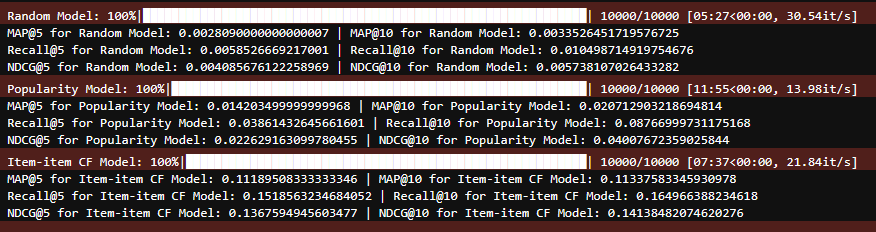

From now on, IBCF model will be considered as the strongest non-parametric, neighborhood-based baseline for every future model's relative results to judge.
This is because the personalization threshold has already been crossed as IBCF does some personalized recommendations.

Also, expanding on the assumptions a bit and upgrading the evaluation. Because till now, we were asking whether the models can rank the known-relevant items early among a small candidate set?
So, increasing the size of items to be sampled for candidates. This tests modesl's noise resistance as more non-relevant items will be there and among a bigger pool, its ranking correctness.

In [17]:
# SAMPLE_SIZE_ITEMS = [1000, 1500, 2000, 2500, 3000, 4000]
# K_VALUES = [5, 10]
# TOP_K = 50

# MODELS = {"Random" : RandomModel(train, rng), "Popularity" : PopularityBasedModel(interactions), "ItemCF" : ItemItemCFModel(train, user_items_with_values, TOP_K), "UserCF" : UserUserCFModel(train, user_items_with_values, TOP_K)}

# models_results = {}

# print("Start")
# for model_name, model in MODELS.items():
#     models_results[model_name] = {sample_size : {k : {"map" : [], "recall" : [], "ndcg" : []} for k in K_VALUES} for sample_size in SAMPLE_SIZE_ITEMS}

# print("!")
# for sample_cand_set_size in tqdm(SAMPLE_SIZE_ITEMS):
#     print("2")
#     print(f"\nCandidate set size = {sample_cand_set_size}")
#     print("3")
#     for user in tqdm(iterable_train_users, desc = "Evaluating Users"): # Iterate over each user in the sampled users set
#         print("4")
#         items = candidates_per_user(user, all_items, train, test, rng, SAMPLE_SIZE_ITEMS_SET=sample_cand_set_size)
#         if items is None:
#             continue
#         candidates, relevant_items = items
#         print("5")
#         for model_name, model in MODELS.items():
#             print("6")
#             # Running and evaluating the model.
#             rankings = ranker_per_model(model, user, candidates)
#             if rankings is None:
#                 continue
#             print("7")
#             for k_val in K_VALUES:
#                 print("8")
#                 ap, recall, ndcg = evaluate_model(rankings, relevant_items, k_val)                
                
#                 #  Need accumulation, not overwriting.
#                 # models_results[model] = {sample_cand_set_size : {k_val : {"map" : map_at_k, "recall" : recall_at_k, "ndcg" : ndcg_at_k}}}
#                 models_results[model_name][sample_cand_set_size][k_val]["map"].append(ap)
#                 models_results[model_name][sample_cand_set_size][k_val]["recall"].append(recall)
#                 models_results[model_name][sample_cand_set_size][k_val]["ndcg"].append(ndcg)
#                 print("9")
                
# print("end")

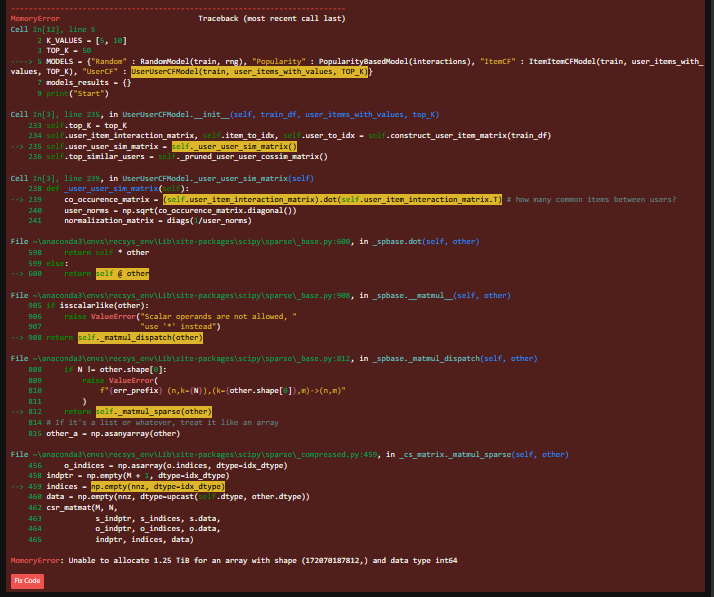

Hence, User-based collaborative filtering was excluded from evaluation due to infeasible memory requirements at scale. Evaluation was conducted using Random, Popularity, and Item-Item CF baselines.

In [18]:
# By Claude AI
# Get all user-defined variable names
[k for k in globals().keys() if not k.startswith('_') and k not in ['In', 'Out', 'get_ipython', 'exit', 'quit']]

['open',
 'sys',
 'pd',
 'np',
 'random',
 'ABCMeta',
 'abstractmethod',
 'csr_matrix',
 'diags',
 'tqdm',
 'defaultdict',
 'GLOBAL_SEED',
 'rng',
 'interactions',
 'train',
 'all_items_array',
 'gc',
 'user_items',
 'user_items_with_values',
 'item_interactions',
 'test_items_per_user',
 'average_precision_at_k',
 'recall_at_k',
 'ndcg_at_k',
 'candidates_per_user',
 'ranker_per_model',
 'evaluate_model',
 'base_recommender',
 'RandomModel',
 'PopularityBasedModel',
 'ItemItemCFModel',
 'UserUserCFModel']

In [19]:
# # Observing the effect of increasing noise in the candidates set on ranking quality of the models.

# # Doing sampling from the train set because 3.7 million unique users are very large to compute over.
# all_train_users = train["user_id"].unique()
# SAMPLE_SIZE_USERS = 5000 #memory overhead
# iterable_train_users = rng.choice(all_train_users, size=min(SAMPLE_SIZE_USERS, len(all_train_users)), replace=False) # no replacement of rows
# print(f"Evaluating on {len(iterable_train_users):,} out of {len(all_train_users):,} users")

# SAMPLE_SIZE_ITEMS = [1000, 1500, 2000, 2500] #memory overhead
# K_VALUES = [5, 10, 15]
# TOP_K = 50

# # Dropping the UserCF model because of above stated reasons and it is indeed expected from the discussions of the existing established RecSys such as Amazon.
# # MODELS = {"Random" : RandomModel(train, rng), "Popularity" : PopularityBasedModel(interactions), "ItemCF" : ItemItemCFModel(train, user_items_with_values, user_items, TOP_K)} # "UserCF" : UserUserCFModel(train, user_items_with_values, TOP_K)}

# # Memory optimizations as suggested by Claude AI
# model_configs = [
#     ("Random", lambda: RandomModel(train, rng)),
#     ("Popularity", lambda: PopularityBasedModel(interactions)),
#     ("ItemCF", lambda: ItemItemCFModel(train, user_items_with_values, user_items, TOP_K)),
# ] # This way only one model in in the memory at a time; then delete it in the end before using the next one.

# models_results= {model_name : {sample_size : {k : {"map" : [], "recall" : [], "ndcg" : []} for k in K_VALUES} for sample_size in SAMPLE_SIZE_ITEMS} for model_name, _ in model_configs}

# print("Starting Evaluation...")
# sys.stdout.flush()

# for model_name, model_factory in model_configs:
   
#     print(f"\n{'='*80}")
#     print(f"Evaluating {model_name}")
#     print(f"{'='*80}")
#     sys.stdout.flush()

#     model = model_factory() # Model creation
    
#     for sample_cand_set_size in tqdm(SAMPLE_SIZE_ITEMS, desc = "Candidate Set Sizes"):
    
#         print(f"\nCandidate set size = {sample_cand_set_size}")
#         sys.stdout.flush() # Forces o/p
        
#         for user in tqdm(iterable_train_users, desc = "Users", leave = False): # Iterate over each user in the sampled users set
            
#             items = candidates_per_user(user, all_items_array, user_items, test_items_per_user, rng, SAMPLE_SIZE_ITEMS_SET=sample_cand_set_size)
#             if items is None:
#                 continue
#             candidates, relevant_items = items
            
#             # for model_name, model in MODELS.items():
            
#             # Running and evaluating the model.
#             rankings = ranker_per_model(model, user, candidates)
                
#             if rankings is None:
#                 continue
            
#             for k_val in K_VALUES:
            
#                 ap, recall, ndcg = evaluate_model(rankings, relevant_items, k_val)                
                    
#                 #  Need accumulation, not overwriting.
#                 # models_results[model] = {sample_cand_set_size : {k_val : {"map" : map_at_k, "recall" : recall_at_k, "ndcg" : ndcg_at_k}}}
#                 models_results[model_name][sample_cand_set_size][k_val]["map"].append(ap)
#                 models_results[model_name][sample_cand_set_size][k_val]["recall"].append(recall)
#                 models_results[model_name][sample_cand_set_size][k_val]["ndcg"].append(ndcg)

#     del model
#     gc.collect()

# print("\nEvaluation complete!")

# # BONUS: Print summary results
# print("\n" + "="*80)
# print("RESULTS SUMMARY")
# print("="*80)

# for model_name, _ in model_configs:
#     print(f"\n{model_name}:")
#     for sample_size in SAMPLE_SIZE_ITEMS:
#         for k in K_VALUES:
#             metrics = models_results[model_name][sample_size][k]
#             if len(metrics['map']) > 0:  # Only print if we have results
#                 print(f"  Size={sample_size}, K={k}: "
#                       f"MAP@{k}={np.mean(metrics['map']):.4f}, "
#                       f"Recall@{k}={np.mean(metrics['recall']):.4f}, "
#                       f"NDCG@{k}={np.mean(metrics['ndcg']):.4f} "
#                       f"(n={len(metrics['map'])})")

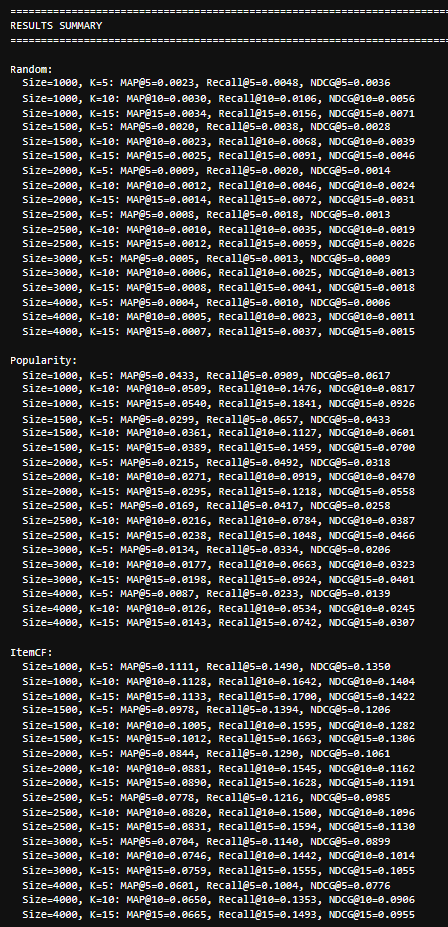

Hence, moving forward with the model-based CF models, **MF using FunkSVD** specifically.

In [20]:
class MatrixFactorization(base_recommender):
    
    def __init__(self, train_df, lr, bias_lr, reg, bias_reg, k, iterations): #user_items, user_items_with_values):
        self.train_df = train_df
        self.lr = lr
        self.bias_lr = bias_lr
        self.reg = reg
        self.bias_reg = bias_reg
        self.k = k
        self.iterations = iterations
        # self.user_items = user_items
        # self.user_items_with_values = user_items_with_values
        self.global_avg = self._calculate_all_items_mean(train_df)
        # TRAINING ONCE
        self.user_factors_matrix, self.item_factors_matrix, self.ubias, self.ibias = self._train(train_df, k)

    # To calculate the global average over all the items' interactions' values.
    def _calculate_all_items_mean(self, train_df):
        mu = self.train_df["intn_cell_value"].sum() / self.train_df.shape[0]
        return float(mu)

    # Because it's a matrix factorization task of the interactions into two matrices, need to intialise those factored matrices.
    # In addition, initialize biases and calculate the necessary things for rating prediction.
    def _intialize_factors(self, train_df, k): # k is the number of latent factors/features to consider for factorizing into.
        self.user_ids = set(self.train_df["user_id"].values)
        self.user_to_idx = {user : idx for idx, user in enumerate(self.user_ids)}
        self.item_ids = set(self.train_df["app_id"].values)
        self.item_to_idx = {item : idx for idx, item in enumerate(self.item_ids)}
        # Matrices initialization
        self.puser_factors_matrix = (np.random.rand(len(self.user_to_idx), k) / np.sqrt(k)).astype(np.float32)
        self.qitem_factors_matrix = (np.random.rand(len(self.item_to_idx), k) / np.sqrt(k)).astype(np.float32) # Memory opts.
        # Global mean calculation
        # Calcuated in __init__()
        # Biases initialization
        self.user_bias = defaultdict(lambda: 0)
        self.item_bias = defaultdict(lambda: 0) 
    
    def candidate_generation(self, user_id, candidates_set_size):
        pass
        # How to generate candidates for this specific model? Not needed. It is a ranker; user same candidates as ItemCF because it is a good retriever.

    def _train(self, train_df, k):
        # Initializations
        self._intialize_factors(train_df, k)
        # Interation values/ratings matrix construction i.e., user_item_matrix for MF
        ratings = self.train_df[["user_id", "app_id", "intn_cell_value"]].to_numpy()
        # Convergence till not achieved, do training
        for itrn in tqdm(range(self.iterations), desc="MF training..."):
            # Shuffling the ratings' triples data via random sampling over indices to avoid the ordering bias as in sort of trends in the data, if any so as to have no effects of it on training.
            index_randomized = random.sample(range(0, len(ratings)), len(ratings))
            # Do parameter updates for each ratings matrix entry to capture the patterns
            for inx in index_randomized:
                rating_row = ratings[inx]
                u = self.user_to_idx[rating_row[0]]
                i = self.item_to_idx[rating_row[1]]
                rating = float(rating_row[2])
                # Prediction error calculaton
                err = rating - (self.global_avg + self.user_bias[u] + self.item_bias[i] + np.dot(self.puser_factors_matrix[u].T, self.qitem_factors_matrix[i]))
                # Parameters update per latent feature; but how are these working actually? Because of chain rule?
                ubtemp = self.user_bias[u] + self.bias_lr * (err - self.bias_reg * self.user_bias[u])
                ibtemp = self.item_bias[i] + self.bias_lr * (err - self.bias_reg * self.item_bias[i])
                uftemp = self.puser_factors_matrix[u] + self.lr * (err * self.qitem_factors_matrix[i] - self.reg * self.puser_factors_matrix[u])
                iftemp = self.qitem_factors_matrix[i] + self.lr * (err * self.puser_factors_matrix[u] - self.reg * self.qitem_factors_matrix[i])
                self.user_bias[u] = ubtemp
                self.item_bias[i] = ibtemp
                self.puser_factors_matrix[u] = uftemp
                self.qitem_factors_matrix[i] = iftemp
        return self.puser_factors_matrix, self.qitem_factors_matrix, self.user_bias, self.item_bias

    # Corrected by Claude AI because the error of user_id being present in test but not in train occured, which shouldn't as did temporal splitting. Anyways.
    def score_candidates(self, user_id, candidate_items):
        
        scores = {}

        # Safety check for unseen users/items
        if user_id not in self.user_to_idx:
            for item in candidate_items:
                # scores[item] = self.global_avg
                scores[item] = None # to avoid bias
            return scores

        user_idx = self.user_to_idx[user_id]
        
        for item in candidate_items:
            
            if item not in self.item_to_idx:
                # scores[item] = self.global_avg
                scores[item] = None
            else:
                item_idx = self.item_to_idx[item]
                scores[item] = (
                    self.global_avg + 
                    self.ubias[user_idx] + 
                    self.ibias[item_idx] + 
                    np.dot(
                        self.user_factors_matrix[user_idx].T, 
                        self.item_factors_matrix[item_idx]
                    )
                )
        return scores
        
        # def score_candidates(self, user_id, candidate_items):
        # scores = {}
        # for item in candidate_items:
        #     if item is None:
        #         scores[item] = self.global_avg
        #     scores[item] = self.global_avg + self.ubias[user_id] + self.ibias[item] + np.dot(self.user_factors_matrix[self.user_to_idx[user_id]].T, self.item_factors_matrix[self.item_to_idx[item]])
        # return scores

In [21]:
# By Claude AI
# Get all user-defined variable names
[k for k in globals().keys() if not k.startswith('_') and k not in ['In', 'Out', 'get_ipython', 'exit', 'quit']]

['open',
 'sys',
 'pd',
 'np',
 'random',
 'ABCMeta',
 'abstractmethod',
 'csr_matrix',
 'diags',
 'tqdm',
 'defaultdict',
 'GLOBAL_SEED',
 'rng',
 'interactions',
 'train',
 'all_items_array',
 'gc',
 'user_items',
 'user_items_with_values',
 'item_interactions',
 'test_items_per_user',
 'average_precision_at_k',
 'recall_at_k',
 'ndcg_at_k',
 'candidates_per_user',
 'ranker_per_model',
 'evaluate_model',
 'base_recommender',
 'RandomModel',
 'PopularityBasedModel',
 'ItemItemCFModel',
 'UserUserCFModel',
 'MatrixFactorization']

In [22]:
# Suggested and given by Claude AI.

import psutil
import os

def print_memory_usage(label=""):
    process = psutil.Process(os.getpid())
    mem_mb = process.memory_info().rss / 1024 / 1024
    mem_gb = mem_mb / 1024
    mem_percent = psutil.virtual_memory().percent
    print(f"[{label}] Memory: {mem_mb:.1f} MB ({mem_gb:.2f} GB) | System: {mem_percent:.1f}% used")

In [23]:
# # Observing the effect of increasing noise in the candidates set on ranking quality of the models.

# # Doing sampling from the train set because 3.7 million unique users are very large to compute over.
# all_train_users = train["user_id"].unique()
# SAMPLE_SIZE_USERS = 5000 #OOm issues
# iterable_train_users = rng.choice(all_train_users, size=min(SAMPLE_SIZE_USERS, len(all_train_users)), replace=False) # no replacement of rows
# print(f"Evaluating on {len(iterable_train_users):,} out of {len(all_train_users):,} users")

# SAMPLE_SIZE_ITEMS = [1000, 1500, 2000, 2500] #OOM issues
# K_VALUES = [5, 10, 15]
# TOP_K = 50
# LEARNING_RATE = 0.005
# BIAS_LEARNING_RATE = 0.003
# REGULARIZATION = 0.02
# BIAS_REGULARIZATION = 0.02
# K_NUM_FACTROS = 40
# MAX_ITERATIONS = 10

# # Dropping the UserCF model because of above stated reasons and it is indeed expected from the discussions of the existing established RecSys such as Amazon.
# # MODELS = {"Random" : RandomModel(train, rng),
# #           "Popularity" : PopularityBasedModel(interactions),
# #           "ItemCF" : ItemItemCFModel(train, user_items_with_values, user_items, TOP_K),
# #           "MF" : MatrixFactorization(train, LEARNING_RATE, BIAS_LEARNING_RATE, REGULARIZATION, BIAS_REGULARIZATION, K_NUM_FACTROS, MAX_ITERATIONS, user_items, user_items_with_values)}
# #         # "UserCF" : UserUserCFModel(train, user_items_with_values, TOP_K)}

# model_configs = [
#     ("Random", lambda: RandomModel(train, rng)),
#     ("Popularity", lambda: PopularityBasedModel(interactions)),
#     ("ItemCF", lambda: ItemItemCFModel(train, user_items_with_values, user_items, TOP_K)),
#     ("MF", lambda: MatrixFactorization(train, LEARNING_RATE, BIAS_LEARNING_RATE, REGULARIZATION, BIAS_REGULARIZATION, K_NUM_FACTROS, MAX_ITERATIONS)) #user_items, user_items_with_values))
# ]

# print_memory_usage("After loading data")
# print_memory_usage("After precomputing dictionaries")

# # models_results = {}
# models_results= {model_name : {sample_size : {k : {"map" : [], "recall" : [], "ndcg" : []} for k in K_VALUES} for sample_size in SAMPLE_SIZE_ITEMS} for model_name, _ in model_configs}

# print("Starting Evaluation...")
# sys.stdout.flush()

# for model_name, model_factory in model_configs:
    
#     print(f"\n{'='*80}")
#     print(f"Evaluating {model_name}")
#     print(f"{'='*80}")
#     print_memory_usage(f"Before creating {model_name}")
#     sys.stdout.flush()

#     model = model_factory() # Model creation
#     print_memory_usage(f"After creating {model_name}")

#     # Discussed with Claude AI for corrections minor.
    
#     for sample_cand_set_size in tqdm(SAMPLE_SIZE_ITEMS, desc = "Candidate Set Sizes"):
    
#         print(f"\nCandidate set size = {sample_cand_set_size}")
#         sys.stdout.flush() # Forces o/p
        
#         for user in tqdm(iterable_train_users, desc = "Users", leave = False): # Iterate over each user in the sampled users set
            
#             items = candidates_per_user(user, all_items_array, user_items, test_items_per_user, rng, SAMPLE_SIZE_ITEMS_SET=sample_cand_set_size)
#             if items is None:
#                 continue
#             candidates, relevant_items = items
            
#             # for model_name, model in MODELS.items():
            
#             # Running and evaluating the model.
#             rankings = ranker_per_model(model, user, candidates)
                
#             if rankings is None:
#                 continue
            
#             for k_val in K_VALUES:
            
#                 ap, recall, ndcg = evaluate_model(rankings, relevant_items, k_val)                
                    
#                 #  Need accumulation, not overwriting.
#                 # models_results[model] = {sample_cand_set_size : {k_val : {"map" : map_at_k, "recall" : recall_at_k, "ndcg" : ndcg_at_k}}}
#                 models_results[model_name][sample_cand_set_size][k_val]["map"].append(ap)
#                 models_results[model_name][sample_cand_set_size][k_val]["recall"].append(recall)
#                 models_results[model_name][sample_cand_set_size][k_val]["ndcg"].append(ndcg)

#     del model
#     gc.collect()
#     print_memory_usage(f"After deleting {model_name}")

# print("\nEvaluation complete!")

# # BONUS: Print summary results
# print("\n" + "="*80)
# print("RESULTS SUMMARY")
# print("="*80)

# for model_name, _ in model_configs:
#     print(f"\n{model_name}:")
#     for sample_size in SAMPLE_SIZE_ITEMS:
#         for k in K_VALUES:
#             metrics = models_results[model_name][sample_size][k]
#             print(f"  Size={sample_size}, K={k}: "
#                   f"MAP@{k}={np.mean(metrics['map']):.4f}, "
#                   f"Recall@{k}={np.mean(metrics['recall']):.4f}, "
#                   f"NDCG@{k}={np.mean(metrics['ndcg']):.4f}")

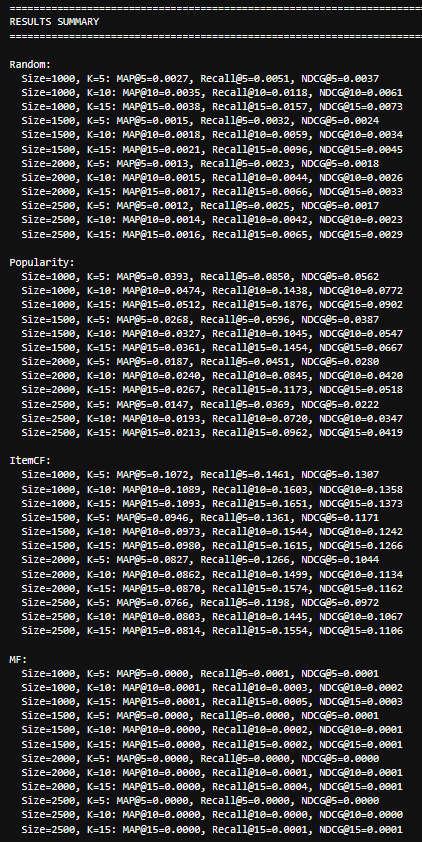

In [24]:
## Building thw composite pipeline as stated earlier.
class MFItemCFComposite(base_recommender):
    def __init__(self, train_df, lr, b_lr, reg, b_reg, k_items, num_factors, iterations, user_items, user_items_with_values):
        self.train_df = train_df
        self.lr = lr
        self.b_lr = b_lr
        self.reg = reg
        self.b_reg = b_reg
        self.k_items = k_items
        self.num_factors = num_factors
        self.iterations = iterations
        self.user_items = user_items
        self.user_items_with_values = user_items_with_values
        # composite ItemCF model, delegated for candidate generation
        self.retriever = ItemItemCFModel(self.train_df, self.user_items_with_values, self.user_items, self.k_items)
        # MF ranking model
        self.ranker = MatrixFactorization(self.train_df, self.lr, self.b_lr, self.reg, self.b_reg, self.num_factors, self.iterations)

    def candidate_generation(self, user_id, candidate_set_size):
        pass

    def score_candidates(self, user_id, candidate_items):
        # ItemCF model
        cf_items_scores = self.retriever.score_candidates(user_id, candidate_items)
        if not cf_items_scores:
            return {}
        filtered_items = list(cf_items_scores.keys())
        return self.ranker.score_candidates(user_id, filtered_items)

In [25]:
# # Observing the effect of increasing noise in the candidates set on ranking quality of the models.

# # Doing sampling from the train set because 3.7 million unique users are very large to compute over.
# all_train_users = train["user_id"].unique()
# SAMPLE_SIZE_USERS = 5000 #OOm issues
# iterable_train_users = rng.choice(all_train_users, size=min(SAMPLE_SIZE_USERS, len(all_train_users)), replace=False) # no replacement of rows
# print(f"Evaluating on {len(iterable_train_users):,} out of {len(all_train_users):,} users")

# SAMPLE_SIZE_ITEMS = [1000, 1500, 2000, 2500] #OOM issues
# K_VALUES = [5, 10, 15]
# TOP_K = 50
# LEARNING_RATE = 0.005
# BIAS_LEARNING_RATE = 0.003
# REGULARIZATION = 0.02
# BIAS_REGULARIZATION = 0.02
# K_NUM_FACTROS = 40
# MAX_ITERATIONS = 10

# # Dropping the UserCF model because of above stated reasons and it is indeed expected from the discussions of the existing established RecSys such as Amazon.
# # MODELS = {"Random" : RandomModel(train, rng),
# #           "Popularity" : PopularityBasedModel(interactions),
# #           "ItemCF" : ItemItemCFModel(train, user_items_with_values, user_items, TOP_K),
# #           "MF" : MatrixFactorization(train, LEARNING_RATE, BIAS_LEARNING_RATE, REGULARIZATION, BIAS_REGULARIZATION, K_NUM_FACTROS, MAX_ITERATIONS, user_items, user_items_with_values)}
# #         # "UserCF" : UserUserCFModel(train, user_items_with_values, TOP_K)}

# model_configs = [
#     ("Random", lambda: RandomModel(train, rng)),
#     ("Popularity", lambda: PopularityBasedModel(interactions)),
#     ("ItemCF", lambda: ItemItemCFModel(train, user_items_with_values, user_items, TOP_K)),
#     ("MF", lambda: MatrixFactorization(train, LEARNING_RATE, BIAS_LEARNING_RATE, REGULARIZATION, BIAS_REGULARIZATION, K_NUM_FACTROS, MAX_ITERATIONS)), #user_items, user_items_with_values))
#     ("MFComposite", lambda: MFItemCFComposite(train, LEARNING_RATE, BIAS_LEARNING_RATE, REGULARIZATION, BIAS_REGULARIZATION, TOP_K, K_NUM_FACTROS, MAX_ITERATIONS, user_items, user_items_with_values))
# ]

# print_memory_usage("After loading data")
# print_memory_usage("After precomputing dictionaries")

# # models_results = {}
# models_results= {model_name : {sample_size : {k : {"map" : [], "recall" : [], "ndcg" : []} for k in K_VALUES} for sample_size in SAMPLE_SIZE_ITEMS} for model_name, _ in model_configs}

# print("Starting Evaluation...")
# sys.stdout.flush()

# for model_name, model_factory in model_configs:
    
#     print(f"\n{'='*80}")
#     print(f"Evaluating {model_name}")
#     print(f"{'='*80}")
#     print_memory_usage(f"Before creating {model_name}")
#     sys.stdout.flush()

#     model = model_factory() # Model creation
#     print_memory_usage(f"After creating {model_name}")

#     # Discussed with Claude AI for corrections minor.
    
#     for sample_cand_set_size in tqdm(SAMPLE_SIZE_ITEMS, desc = "Candidate Set Sizes"):
    
#         print(f"\nCandidate set size = {sample_cand_set_size}")
#         sys.stdout.flush() # Forces o/p
        
#         for user in tqdm(iterable_train_users, desc = "Users", leave = False): # Iterate over each user in the sampled users set
            
#             items = candidates_per_user(user, all_items_array, user_items, test_items_per_user, rng, SAMPLE_SIZE_ITEMS_SET=sample_cand_set_size)
#             if items is None:
#                 continue
#             candidates, relevant_items = items
            
#             # for model_name, model in MODELS.items():
            
#             # Running and evaluating the model.
#             rankings = ranker_per_model(model, user, candidates)
                
#             if rankings is None:
#                 continue
            
#             for k_val in K_VALUES:
            
#                 ap, recall, ndcg = evaluate_model(rankings, relevant_items, k_val)                
                    
#                 #  Need accumulation, not overwriting.
#                 # models_results[model] = {sample_cand_set_size : {k_val : {"map" : map_at_k, "recall" : recall_at_k, "ndcg" : ndcg_at_k}}}
#                 models_results[model_name][sample_cand_set_size][k_val]["map"].append(ap)
#                 models_results[model_name][sample_cand_set_size][k_val]["recall"].append(recall)
#                 models_results[model_name][sample_cand_set_size][k_val]["ndcg"].append(ndcg)

#     del model
#     gc.collect()
#     print_memory_usage(f"After deleting {model_name}")

# print("\nEvaluation complete!")

# # BONUS: Print summary results
# print("\n" + "="*80)
# print("RESULTS SUMMARY")
# print("="*80)

# for model_name, _ in model_configs:
#     print(f"\n{model_name}:")
#     for sample_size in SAMPLE_SIZE_ITEMS:
#         for k in K_VALUES:
#             metrics = models_results[model_name][sample_size][k]
#             print(f"  Size={sample_size}, K={k}: "
#                   f"MAP@{k}={np.mean(metrics['map']):.4f}, "
#                   f"Recall@{k}={np.mean(metrics['recall']):.4f}, "
#                   f"NDCG@{k}={np.mean(metrics['ndcg']):.4f}")

In [26]:
# # Converting the results disctionary to a dataframe for visualizations -- used GPT to create visuals.
# rows = []

# for model_name, model_data in models_results.items():
#     for size, size_data in model_data.items():
#         for k, metrics in size_data.items():
#             rows.append({"model" : model_name, "size" : size, "k" : k, "MAP" : np.mean(metrics["map"]), "Recall" : np.mean(metrics["recall"]), "NDCG" : np.mean(metrics["ndcg"])})

# results_df = pd.DataFrame(rows)
# results_df

In [27]:
# We plotted NDCG@10 because it is the smallest metric that simultaneously tests relevance, ordering, robustness to noise, and user-visible quality.
# GPT -- How does ranking quality decay as noise increases?
import matplotlib.pyplot as plt

k_fixed = 10
metric = "NDCG"

plt.figure(figsize=(8, 5))

for model in results_df["model"].unique():
    subset = results_df[
        (results_df["model"] == model) &
        (results_df["k"] == k_fixed)
    ]
    plt.plot(
        subset["size"],
        subset[metric],
        marker="o",
        label=model
    )

plt.xlabel("Candidate Set Size (Noise)")
plt.ylabel(f"{metric}@{k_fixed}")
plt.title(f"{metric}@{k_fixed} vs Candidate Set Size")
plt.legend()
plt.grid(True)
plt.show()

# GPT -- Given a realistic candidate pool, who wins?

cand_fixed = 2000
k_fixed = 10

subset = results_df[
    (results_df["size"] == cand_fixed) &
    (results_df["k"] == k_fixed)
]

plt.figure(figsize=(7, 5))
plt.bar(subset["model"], subset["NDCG"])
plt.ylabel("NDCG@10")
plt.title(f"NDCG@10 at Candidate Size = {cand_fixed}")
plt.grid(axis="y")
plt.show()

# GPT -- Who improves faster as K increases?

cand_fixed = 2000
models_to_compare = ["ItemCF", "MFComposite"]

plt.figure(figsize=(8, 5))

for model in models_to_compare:
    subset = results_df[
        (results_df["model"] == model) &
        (results_df["size"] == cand_fixed)
    ]
    plt.plot(
        subset["k"],
        subset["NDCG"],
        marker="o",
        label=model
    )

plt.xlabel("K")
plt.ylabel("NDCG")
plt.title(f"NDCG vs K (Candidate Size = {cand_fixed})")
plt.legend()
plt.grid(True)
plt.show()

NameError: name 'results_df' is not defined

<Figure size 800x500 with 0 Axes>

In [ ]:
# Now, the most important question to ask is whether MF has helped ItemCF because it was already a retriever + ranker model? How much? -- GPT
candidate_sizes = SAMPLE_SIZE_ITEMS
k = 10  # fixed

itemcf_ndcg = []
mf_ndcg = []

for size in candidate_sizes:
    itemcf_vals = models_results["ItemCF"][size][k]["ndcg"]
    mf_vals = models_results["MFComposite"][size][k]["ndcg"]

    itemcf_ndcg.append(np.mean(itemcf_vals))
    mf_ndcg.append(np.mean(mf_vals))

delta_ndcg = np.array(mf_ndcg) - np.array(itemcf_ndcg) # How much MF improves (or hurts) ranking compared to ItemCF?

plt.figure(figsize=(8, 5))
plt.plot(candidate_sizes, delta_ndcg, marker='o')
plt.axhline(0, linestyle='--')  # baseline: no improvement
plt.xlabel("Candidate Set Size (Noise)")
plt.ylabel("ΔNDCG@10 (MFComposite − ItemCF)")
plt.title("Marginal Benefit of MF over ItemCF")
plt.grid(True)
plt.show()

In [ ]:
# This tells you whether MF helps top-heavy ranking or deeper ranking.
for k in [5, 10, 15]:
    delta = []
    for size in candidate_sizes:
        delta.append(
            np.mean(models_results["MFComposite"][size][k]["ndcg"]) -
            np.mean(models_results["ItemCF"][size][k]["ndcg"])
        )

    plt.plot(candidate_sizes, delta, marker='o', label=f"K={k}")

plt.axhline(0, linestyle='--')
plt.xlabel("Candidate Set Size (Noise)")
plt.ylabel("ΔNDCG")
plt.title("MF Gain over ItemCF across K")
plt.legend()
plt.grid(True)
plt.show()

Till now, for the experiment of evaluating the ranking quality alone, ItemCF proves to be the most performant one. However, this demonstrated that retrieval is an equally important sorta part of the evaluation. May also need to transiition to evaluation of the full end-to-end recommmender cycle for better results discovery and model selection for producton environment.
Hence, the new hypothesis to test is to take the best sorta models in their thing. It will build a weighted hybrid model including ItemCF as a good retriever, MF for dense interactions data and Content-based filtering for cold/weak interactions data.
For this need to set thresholds for what is dense enough and cold/weak enough? Which comes from the number of interactions and history, basically.
This will reveal that which models to choose and how do they actually contribute and by how much? Also, whether they even help?
All this, in practice, is complimented by an incremental hybridization of models from ItemCF alone to the above discussed hybrid.

##### **CLeaned-up, simpler re-phrased version by GPT of my thoughts**

Up to this point, the experiments focused on ranking quality in isolation. Under this setup, ItemCF consistently outperformed other models, showing that ranking performance is tightly coupled with how candidates are retrieved.

This highlights that retrieval is not a peripheral concern but a core part of recommender evaluation. As a result, evaluating ranking alone may be insufficient for meaningful model selection, especially for production-like environments. This motivates a transition toward evaluating the full end-to-end recommender pipeline.

The next hypothesis is to combine models based on their respective strengths:

ItemCF as a strong retriever,

Matrix Factorization (MF) for users and items with dense interaction histories,

Content-Based Filtering (CBF) for cold or weak interaction scenarios.

This requires defining thresholds that determine what constitutes dense, weak, or cold interaction data, typically based on the number of user–item interactions and history length.

Such a setup allows us to examine:

which models should be used under which conditions,

how much each model contributes,

whether hybridization genuinely improves performance or merely adds complexity.

Practically, this will be explored through incremental hybridization, starting from ItemCF alone and progressively incorporating MF and CBF, observing gains (or lack thereof) at each stage.

In [28]:
# For building Content-Based Filtering model.
metadata = pd.read_csv("cleaned_data/final_games_metadata.csv", index_col = "Unnamed: 0")
metadata

,app_id,description,tags
0,13500,Enter the dark underworld of Prince of Persia ...,"Action, Adventure, Parkour, Third Person, Grea..."
1,22364,NaN,Action
2,113020,Monaco: What's Yours Is Mine is a single playe...,"Co-op, Stealth, Indie, Heist, Local Co-Op, Str..."
3,226560,Escape Dead Island is a Survival-Mystery adven...,"Zombies, Adventure, Survival, Action, Third Pe..."
4,249050,Dungeon of the Endless is a Rogue-Like Dungeon...,"Roguelike, Strategy, Tower Defense, Pixel Grap..."
...,...,...,...
49630,2455060,"In the rogue action game ""Taboo Trial"", you wi...","RPG, Indie, Nudity, Action Roguelike, Female P..."
49631,1138640,"Build better, together 🏡 Hometopia is a seriou...","Early Access, Life Sim, City Builder, Immersiv..."
49632,2515460,NaN,"Strategy, Indie, Simulation"
49633,1687000,Seiji Maruyama is a middle-aged yakuza recentl...,"Side Scroller, Beat 'em up, Sandbox, Martial A..."


In [29]:
metadata["description"].isna().value_counts()

description
False    40491
True      9144
Name: count, dtype: int64

In [30]:
metadata["tags"].isna().value_counts()

tags
False    49620
True        15
Name: count, dtype: int64

In [31]:
metadata[(metadata["description"].isna()) & (metadata["tags"].isna())]

,app_id,description,tags


In [32]:
np.count_nonzero(np.isin(train.app_id.unique(), metadata.app_id.unique()))

np.int64(32918)

In [33]:
33495 - 32918 # 577 app_ids in train do not have a metadata for themselves in the metadata dataset.

577

In [34]:
metadata.fillna("", inplace = True)
metadata

,app_id,description,tags
0,13500,Enter the dark underworld of Prince of Persia ...,"Action, Adventure, Parkour, Third Person, Grea..."
1,22364,,Action
2,113020,Monaco: What's Yours Is Mine is a single playe...,"Co-op, Stealth, Indie, Heist, Local Co-Op, Str..."
3,226560,Escape Dead Island is a Survival-Mystery adven...,"Zombies, Adventure, Survival, Action, Third Pe..."
4,249050,Dungeon of the Endless is a Rogue-Like Dungeon...,"Roguelike, Strategy, Tower Defense, Pixel Grap..."
...,...,...,...
49630,2455060,"In the rogue action game ""Taboo Trial"", you wi...","RPG, Indie, Nudity, Action Roguelike, Female P..."
49631,1138640,"Build better, together 🏡 Hometopia is a seriou...","Early Access, Life Sim, City Builder, Immersiv..."
49632,2515460,,"Strategy, Indie, Simulation"
49633,1687000,Seiji Maruyama is a middle-aged yakuza recentl...,"Side Scroller, Beat 'em up, Sandbox, Martial A..."


In [35]:
train

,app_id,user_id,intn_timestamp,intn_cell_value
0,63710,0,2014-06-16,0.063607
1,260230,0,2014-06-25,0.108373
2,267060,0,2014-09-02,0.146234
3,8850,0,2014-09-08,1.239416
4,226960,0,2014-09-22,0.040132
...,...,...,...,...
11463883,246900,14306035,2014-08-05,1.198445
11463884,487000,14306037,2019-11-03,1.238388
11463885,976310,14306047,2019-11-26,1.292928
11463886,4500,14306048,2019-10-22,1.270707


In [36]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import gensim
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from gensim.models import TfidfModel
from gensim.utils import simple_preprocess
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
wnl = WordNetLemmatizer()

# Constructing the CBF class for the hybrid model discusssed earlier.
## LDA is used as a dimensionality reduction and semantic abstraction mechanism, not as a probabilistic generative model for recommendation.
class ContentBasedFiltering(base_recommender):
    def __init__(self, metadata_df, user_items_with_values, ntopics, alpha):
        self.metadata_df = metadata_df
        self.user_items_with_values = user_items_with_values
        self.num_topics = ntopics
        self.alpha = alpha
        self.sem_train = self._data_preparation(self._data_cleaning())
        self.dictionary = corpora.Dictionary(self.sem_train.information)
        self.bow = [self.dictionary.doc2bow(doc) for doc in self.sem_train.information]
        self.LDA = self._LDAmodel(self.bow)
        self.TFIDF = self._TFIDFmodel(self.bow)
        self.item_topic_vectors = self._build_item_topic_vectors()
        self.item_tfidf_vectors = self._build_item_tfidf_vectors()

    def _data_cleaning(self):
        # To have vectors in the topic space for all of the available content to resolve both cold-item and cold-user support, hopefully & simultaneously.
        # semantic_train = self.train_df.merge(self.metadata_df, on="app_id", how="outer") # cold-user support
        semantic_train = self.metadata_df.copy() # cold-item support
        semantic_train.drop_duplicates(subset=["app_id"], inplace = True)
        # Merging the descriptions and tags together so as to get and provide enriched text of items to the LDA and TFIDF model.
        semantic_train.tags = semantic_train.tags.str.replace(" ", " tag_")
        semantic_train.information = semantic_train.description + " " + semantic_train.tags
        # dropping unnecessary text columns
        semantic_train.drop(columns=["description", "tags"], inplace=True)
        return semantic_train

    def _data_preparation(self, df):

        df = df.copy()
        
        # Basic text pre-processing
        df.information = df.information.apply(lambda text: simple_preprocess(text, deacc=True))

        # Stopwords removal
        def remove_stop_words(tokens):
            filtered_words = [word for word in tokens if word not in stop_words]
            return filtered_words
        df.information = df.information.apply(remove_stop_words)

        # Lemmatization
        def lemma(word):
            return wnl.lemmatize(word)
        df.information = df.information.apply(lambda tokens: [lemma(word) for word in tokens])

        return df

    def _LDAmodel(self, train_corpus):
        lda = LdaModel(corpus = train_corpus, num_topics=self.num_topics, distributed=False, chunksize=1000, passes=10, update_every=0, random_state=42)
        return lda

    def _TFIDFmodel(self, train_corpus):
        tfidf = TfidfModel(train_corpus)
        return tfidf

    # Helped by GPT
    # app_id -> fixed-length np vector
    def _build_item_topic_vectors(self):
        # Each doc/row in df, get topic dist
        item_top_vectors = {}
        for idx, row in self.sem_train.iterrows():
            bow = self.bow[idx] # bow is created using doc index
            topic_dist = self.LDA.get_document_topics(bow, minimum_probability=0)
            # convert to dense vectors
            dense_vec = np.zeros(self.LDA.num_topics)
            for topic_id, prob in topic_dist:
                dense_vec[topic_id] = prob
            item_top_vectors[row.app_id] = dense_vec
        return item_top_vectors

    def _build_item_tfidf_vectors(self):
        item_tfidf = {}
        for idx, row in self.sem_train.iterrows():
            tfidf_vec = np.zeros(len(self.dictionary))
            for term_id, value in self.TFIDF[self.bow[idx]]:
                tfidf_vec[term_id] = value
            item_tfidf[row.app_id] = tfidf_vec
        return item_tfidf

    # Referenced Jobin Wilson et al., Improving Collaborative Filtering Based Recommenders Using Topic Modelling, Feb 2014. Abstract at https://arxiv.org/abs/1402.6238.
    def build_user_profile_LDA(self, user_id):
        
        interacted = self.user_items_with_values.get(user_id, [])

        # Cold users are outside the scope of this content-based model and are handled at the orchestration layer.
        if len(interacted) == 0:
            return None
        
        user_vec = np.zeros(self.LDA.num_topics)
        total_weight = 0.0

        for item, weight in interacted:

            if item in self.item_topic_vectors:
                user_vec += weight * self.item_topic_vectors[item]
                total_weight += weight

        if total_weight > 0:
            user_vec /= total_weight

        return user_vec

    def build_user_profile_TFIDF(self, user_id):
        
        interacted = self.user_items_with_values.get(user_id, [])
    
        # Cold users are outside the scope of this content-based model and are handled at the orchestration layer.
        if len(interacted) == 0:
            return None
            
        user_vec = np.zeros(len(self.dictionary), dtype=np.float32)
        total_weight = 0.0
    
        for item, weight in interacted:
            
            if item in self.item_tfidf_vectors:
                user_vec += weight * self.item_tfidf_vectors[item]
                total_weight += weight
                
        if total_weight > 0:
            user_vec /= total_weight
            
        return user_vec

        
    def candidate_generation(self, user_id, candidates_set_size):
        pass

    def cosine(self, a, b):
        return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b) + 1e-9)

    # Semantic/contextual understanding via text latent features
    def LDA_score(self, user, item):
        user_profile = self.build_user_profile_LDA(user)
        if user_profile is None:
            return 0.0
        if item not in self.item_topic_vectors:
            return 0.0
        item_profile = self.item_topic_vectors[item]
        sim_score = self.cosine(user_profile, item_profile)
        return sim_score

    # word precision
    def TFIDF_score(self, user, item):
        user_profile = self.build_user_profile_TFIDF(user)
        if user_profile is None:
            return 0.0
        if item not in self.item_tfidf_vectors:
            return 0.0
        item_profile = self.item_tfidf_vectors[item]
        sim_score = self.cosine(user_profile, item_profile)
        return sim_score
        
    def score_candidates(self, user_id, candidate_items):
        
        pred_score = {}
        
        for item in candidate_items:
            # LDA vectors live in topic space
            if item in self.item_topic_vectors:
                LDA = self.LDA_score(user_id, item)
            else:
                LDA = 0.0
            # TFIDF vectors live in vocab space
            TFIDF = self.TFIDF_score(user_id, item)
            CBF_score = self.alpha * LDA + (1 - self.alpha) * TFIDF
            pred_score[item] = CBF_score

        return pred_score

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ritis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [37]:
# Helped by GPT in not-so-easy-to-detect bugs and comment refinement
# MF learns global latent structure but is trusted only in dense regions.
# Matrix Factorization is used as a local ranker and is activated only when both the user and the item lie in sufficiently dense regions of the interaction graph.
class GatedMatrixFactorization(base_recommender):
    
    def __init__(self, train_df, lr, bias_lr, reg, bias_reg, k, iterations, user_items, item_interactions, u_min, i_min): #user_items_with_values):
        self.train_df = train_df
        self.lr = lr
        self.bias_lr = bias_lr
        self.reg = reg
        self.bias_reg = bias_reg
        self.k = k
        self.iterations = iterations
        self.user_items = user_items
        self.item_interactions = item_interactions
        self.u_min = u_min
        self.i_min = i_min
        # self.user_items_with_values = user_items_with_values
        self.global_avg = self._calculate_all_items_mean(train_df)
        # TRAINING ONCE
        self.puser_factors_matrix, self.qitem_factors_matrix, self.user_bias, self.item_bias = self._train(train_df, k)

    # To calculate the global average over all the items' interactions' values.
    def _calculate_all_items_mean(self, train_df):
        mu = self.train_df["intn_cell_value"].sum() / self.train_df.shape[0]
        return float(mu)

    # Because it's a matrix factorization task of the interactions into two matrices, need to intialise those factored matrices.
    # In addition, initialize biases and calculate the necessary things for rating prediction.
    def _intialize_factors(self, train_df, k): # k is the number of latent factors/features to consider for factorizing into.
        self.user_ids = set(self.train_df["user_id"].values)
        self.user_to_idx = {user : idx for idx, user in enumerate(self.user_ids)}
        self.item_ids = set(self.train_df["app_id"].values)
        self.item_to_idx = {item : idx for idx, item in enumerate(self.item_ids)}
        # Matrices initialization
        self.puser_factors_matrix = (np.random.rand(len(self.user_to_idx), self.k) / np.sqrt(k)).astype(np.float32)
        self.qitem_factors_matrix = (np.random.rand(len(self.item_to_idx), self.k) / np.sqrt(k)).astype(np.float32) # Memory opts.
        # Global mean calculation
        # Calculated in __init__()
        # Biases initialization
        self.user_bias = defaultdict(lambda: 0)
        self.item_bias = defaultdict(lambda: 0) 
    
    def candidate_generation(self, user_id, candidates_set_size):
        pass
        # How to generate candidates for this specific model? Not needed. It is a ranker; user same candidates as ItemCF because it is a good retriever.

    def _train(self, train_df, k):
        # Initializations
        self._intialize_factors(train_df, k)
        # Interation values/ratings matrix construction i.e., user_item_matrix for MF
        ratings = self.train_df[["user_id", "app_id", "intn_cell_value"]].to_numpy()
        # Convergence till not achieved, do training
        for itrn in tqdm(range(self.iterations), desc="MF training..."):
            # Shuffling the ratings' triples data via random sampling over indices to avoid the ordering bias as in sort of trends in the data, if any so as to have no effects of it on training.
            index_randomized = random.sample(range(0, len(ratings)), len(ratings))
            # Do parameter updates for each ratings matrix entry to capture the patterns
            for inx in index_randomized:
                rating_row = ratings[inx]
                u = self.user_to_idx[rating_row[0]]
                i = self.item_to_idx[rating_row[1]]
                rating = float(rating_row[2])
                # Prediction error calculaton
                err = rating - (self.global_avg + self.user_bias[u] + self.item_bias[i] + np.dot(self.puser_factors_matrix[u].T, self.qitem_factors_matrix[i]))
                # Parameters update per latent feature; but how are these working actually? Because of chain rule?
                ubtemp = self.user_bias[u] + self.bias_lr * (err - self.bias_reg * self.user_bias[u])
                ibtemp = self.item_bias[i] + self.bias_lr * (err - self.bias_reg * self.item_bias[i])
                uftemp = self.puser_factors_matrix[u] + self.lr * (err * self.qitem_factors_matrix[i] - self.reg * self.puser_factors_matrix[u])
                iftemp = self.qitem_factors_matrix[i] + self.lr * (err * self.puser_factors_matrix[u] - self.reg * self.qitem_factors_matrix[i])
                self.user_bias[u] = ubtemp
                self.item_bias[i] = ibtemp
                self.puser_factors_matrix[u] = uftemp
                self.qitem_factors_matrix[i] = iftemp
        return self.puser_factors_matrix, self.qitem_factors_matrix, self.user_bias, self.item_bias

    # For whether the user's history dense enough >= u_min
    def is_dense_user(self, user):
        return len(self.user_items.get(user, [])) >= self.u_min

    # For whether the item's interactions dense enough >= i_min
    def is_dense_item(self, item):
        return self.item_interactions.get(item, 0) >= self.i_min
    
    # Corrected by Claude AI because the error of user_id being present in test but not in train occured, which shouldn't as did temporal splitting. Anyways.
    def score_candidates(self, user_id, candidate_items):
        
        scores = {}
        
        # Safety check for unseen users/items
        if user_id not in self.user_to_idx:
            for item in candidate_items:
                # scores[item] = self.global_avg
                scores[item] = None
            return scores

        user_idx = self.user_to_idx[user_id]
        
        for item in candidate_items:
            
            if item not in self.item_to_idx:
                # scores[item] = self.global_avg
                scores[item] = None
            else:
                item_idx = self.item_to_idx[item]
                # only dense interactions
                if self.is_dense_user(user_id) and self.is_dense_item(item):
                    scores[item] = (self.global_avg + self.user_bias[user_idx] + self.item_bias[item_idx] + 
                                    np.dot(self.puser_factors_matrix[user_idx].T, self.qitem_factors_matrix[item_idx]))
                else:
                    scores[item] = None
        return scores
        
        # def score_candidates(self, user_id, candidate_items):
        # scores = {}
        # for item in candidate_items:
        #     if item is None:
        #         scores[item] = self.global_avg
        #     scores[item] = self.global_avg + self.ubias[user_id] + self.ibias[item] + np.dot(self.user_factors_matrix[self.user_to_idx[user_id]].T, self.item_factors_matrix[self.item_to_idx[item]])
        # return scores

In [38]:
class ItemCFandCBF(base_recommender):
    def __init__(self, train_df, metadata_df, user_items_with_values, user_items, top_K, ntopics, alpha):
        self.train_df = train_df
        self.metadata_df = metadata_df
        self.user_items_with_values = user_items_with_values
        self.user_items = user_items
        self.top_K = top_K
        self.ntopics = ntopics
        self.alpha = alpha
        self.retriever = ItemItemCFModel(self.train_df, self.user_items_with_values, self.user_items, self.top_K)
        self.ranker = ContentBasedFiltering(self.metadata_df, self.user_items_with_values, self.ntopics, self.alpha)

    def candidate_generation(self, user_id, candidates_set_size):
        pass

    def score_candidates(self, user_id, candidate_items):
        items_scores = self.retriever.score_candidates(user_id, candidate_items)
        items = list(items_scores.keys())
        return self.ranker.score_candidates(user_id, items)

In [39]:
class ItemCFandGatedMF(base_recommender):
    def __init__(self, train_df, metadata_df, user_items_with_values, user_items, top_K, ntopics, alpha, lr, bias_lr, reg, bias_reg, k, iterations, item_interactions, u_min, i_min):
        self.train_df = train_df
        self.user_items_with_values = user_items_with_values
        self.user_items = user_items
        self.top_K = top_K
        self.ntopics = ntopics
        self.alpha = alpha
        self.lr = lr
        self.bias_lr = bias_lr
        self.reg = reg
        self.bias_reg = bias_reg
        self.k = k
        self.iterations = iterations
        self.item_interactions = item_interactions
        self.u_min = u_min
        self.i_min = i_min
        self.retriever = ItemItemCFModel(self.train_df, self.user_items_with_values, self.user_items, self.top_K)
        self.ranker = GatedMatrixFactorization(self.train_df, self.lr, self.bias_lr, self.reg, self.bias_reg, self.k, self.iterations, self.user_items, self.item_interactions, self.u_min, self.i_min)

    def candidate_generation(self, user_id, candidates_set_size):
        pass

    def score_candidates(self, user_id, candidate_items):
        items_scores = self.retriever.score_candidates(user_id, candidate_items)
        items = list(items_scores.keys())
        return self.ranker.score_candidates(user_id, items)

In [40]:
# Finally, building the hybrid model.
# MF is trained globally but gated at inference time to dense user–item regions; sparse regions defer to ItemCF/CBF.
class HybridModel(base_recommender):
    def __init__(self, train_df, metadata_df, lr, bias_lr, reg, bias_reg, k, iterations, user_items, item_interactions, u_min, i_min, user_items_with_values, ntopics, alpha, top_K, witf, wmf, wcbf):
        self.train_df = train_df
        self.metadata_df = metadata_df
        self.lr = lr
        self.bias_lr = bias_lr
        self.reg = reg
        self.bias_reg = bias_reg
        self.k = k
        self.iterations = iterations
        self.user_items = user_items
        self.item_interactions = item_interactions
        self.u_min = u_min
        self.i_min = i_min
        self.user_items_with_values = user_items_with_values
        self.ntopics = ntopics
        self.alpha = alpha
        self.top_K = top_K
        self.w_itemcf = witf
        self.w_mf = wmf
        self.w_cbf = wcbf
        self.ItemCF = ItemItemCFModel(self.train_df, self.user_items_with_values, self.user_items, self.top_K)
        self.GMF = GatedMatrixFactorization(self.train_df, self.lr, self.bias_lr, self.reg, self.bias_reg, self.k, self.iterations, self.user_items, self.item_interactions, self.u_min, self.i_min)
        self.CBF = ContentBasedFiltering(self.metadata_df, self.user_items_with_values, self.ntopics, self.alpha)

    def candidate_generation(self, user_id, candidates_set_size):
        pass
    
    def score_candidates(self, user_id, candidate_items):
        final_score = {}
        
        # ItemCF standalone
        ItemCF_score = self.ItemCF.score_candidates(user_id, candidate_items)
        # retrieval
        itemcf_items = list(ItemCF_score.keys())
        # Dense MF
        MF_Score = self.GMF.score_candidates(user_id, itemcf_items)
        # Coldness/weakness CBF
        CBF_score = self.CBF.score_candidates(user_id, itemcf_items)

        # By GPT for bringing the scores into the same range for easy calcns. Min-MAX Normalization
        # MF is treated as a high-confidence expert whose scores are trusted more when available.
        # --- per-model normalization (simple & safe) ---
        def normalize(scores):
            vals = [v for v in scores.values() if v is not None]
            if not vals:
                return scores
            min_v, max_v = min(vals), max(vals)
            if max_v == min_v:
                return scores
            return {
                k: (v - min_v) / (max_v - min_v) if v is not None else None
                for k, v in scores.items()
            }
    
        ItemCF_score = normalize(ItemCF_score)
        MF_Score = normalize(MF_Score)
        CBF_score = normalize(CBF_score)
        
        # Hybridized score - By GPT (this preserves conditional trust and normalizes the weights.)
        for item in itemcf_items:
            score = 0.0
            weight_sum = 0.0
        
            if ItemCF_score.get(item) is not None:
                score += self.w_itemcf * ItemCF_score[item]
                weight_sum += self.w_itemcf
        
            if MF_Score.get(item) is not None:
                score += self.w_mf * MF_Score[item]
                weight_sum += self.w_mf
        
            if CBF_score.get(item) is not None:
                score += self.w_cbf * CBF_score[item]
                weight_sum += self.w_cbf

            final_score[item] = score / weight_sum if weight_sum > 0 else 0.0

        # for item in itemcf_items:
        #     # final_score[item] = self.witf * ItemCF_score.get(item, 0.0) + self.wmf * MF_Score.get(item, 0.0) + self.wcbf * CBF_score.get(item, 0.0)
        #     score = 0.0

        #     if ItemCF_score.get(item) is not None:
        #         score += self.w_itemcf * ItemCF_score[item]
    
        #     if MF_Score.get(item) is not None:
        #         score += self.w_mf * MF_Score[item]
    
        #     if CBF_score.get(item) is not None:
        #         score += self.w_cbf * CBF_score[item]
    
        #     final_score[item] = score

        return final_score

In [41]:
# BASELINE MODELS EVALUATION

# The evaluation loop
# Doing sampling from the train set because 3.7 million unique users are very large to compute over.
all_train_users = train["user_id"].unique()
SAMPLE_SIZE_USERS = 5000 #OOm issues
iterable_train_users = rng.choice(all_train_users, size=min(SAMPLE_SIZE_USERS, len(all_train_users)), replace=False) # no replacement of rows
print(f"Evaluating on {len(iterable_train_users):,} out of {len(all_train_users):,} users")

SAMPLE_SIZE_ITEMS = [250, 500, 750, 1000] #OOM issues
K_VALUES = [5, 10, 15]
TOP_K = 50
LEARNING_RATE = 0.005
BIAS_LEARNING_RATE = 0.003
REGULARIZATION = 0.02
BIAS_REGULARIZATION = 0.02
K_NUM_FACTROS = 40
MAX_ITERATIONS = 10
# TOPICS = [5, 10, 15, 20]
TOPICS = 15
# ALPHA = [0.25, 0.5, 0.75]
ALPHA = 0.35
U_MIN = 5 #, 10, 15]
I_MIN = 10 #, 15, 20]
# W_ITF = [0.3, 0.4, 0.5]
# W_MF = [0.2, 0.25, 0.3, 0.4]
# W_CBF = [0.1, 0.2, 0.3]
W_ITF = 0.4
W_MF = 0.4
W_CBF = 0.2


# Dropping the UserCF model because of above stated reasons and it is indeed expected from the discussions of the existing established RecSys such as Amazon.
# MODELS = {"Random" : RandomModel(train, rng),
#           "Popularity" : PopularityBasedModel(interactions),
#           "ItemCF" : ItemItemCFModel(train, user_items_with_values, user_items, TOP_K),
#           "MF" : MatrixFactorization(train, LEARNING_RATE, BIAS_LEARNING_RATE, REGULARIZATION, BIAS_REGULARIZATION, K_NUM_FACTROS, MAX_ITERATIONS, user_items, user_items_with_values)}
#         # "UserCF" : UserUserCFModel(train, user_items_with_values, TOP_K)}

model_configs = [
    ("Random", lambda: RandomModel(train, rng)),
    ("Popularity", lambda: PopularityBasedModel(interactions)),
    ("ItemCF", lambda: ItemItemCFModel(train, user_items_with_values, user_items, TOP_K)),
    ("MF", lambda: MatrixFactorization(train, LEARNING_RATE, BIAS_LEARNING_RATE, REGULARIZATION, BIAS_REGULARIZATION, K_NUM_FACTROS, MAX_ITERATIONS)), #user_items, user_items_with_values))
]

print_memory_usage("After loading data")
print_memory_usage("After precomputing dictionaries")

# models_results = {}
models_results= {model_name : {sample_size : {k : {"map" : [], "recall" : [], "ndcg" : []} for k in K_VALUES} for sample_size in SAMPLE_SIZE_ITEMS} for model_name, _ in model_configs}

print("Starting Evaluation...")
sys.stdout.flush()

for model_name, model_factory in model_configs:
    
    print(f"\n{'='*80}")
    print(f"Evaluating {model_name}")
    print(f"{'='*80}")
    print_memory_usage(f"Before creating {model_name}")
    sys.stdout.flush()

    model = model_factory() # Model creation
    print_memory_usage(f"After creating {model_name}")

    # Discussed with Claude AI for corrections minor.
    
    for sample_cand_set_size in tqdm(SAMPLE_SIZE_ITEMS, desc = "Candidate Set Sizes"):
    
        print(f"\nCandidate set size = {sample_cand_set_size}")
        sys.stdout.flush() # Forces o/p
        
        for user in tqdm(iterable_train_users, desc = "Users", leave = False): # Iterate over each user in the sampled users set
            
            items = candidates_per_user(user, all_items_array, user_items, test_items_per_user, rng, SAMPLE_SIZE_ITEMS_SET=sample_cand_set_size)
            if items is None:
                continue
            candidates, relevant_items = items
            
            # for model_name, model in MODELS.items():
            
            # Running and evaluating the model.
            rankings = ranker_per_model(model, user, candidates)
                
            if rankings is None:
                continue
            
            for k_val in K_VALUES:
            
                ap, recall, ndcg = evaluate_model(rankings, relevant_items, k_val)                
                    
                #  Need accumulation, not overwriting.
                # models_results[model] = {sample_cand_set_size : {k_val : {"map" : map_at_k, "recall" : recall_at_k, "ndcg" : ndcg_at_k}}}
                models_results[model_name][sample_cand_set_size][k_val]["map"].append(ap)
                models_results[model_name][sample_cand_set_size][k_val]["recall"].append(recall)
                models_results[model_name][sample_cand_set_size][k_val]["ndcg"].append(ndcg)

    del model
    gc.collect()
    print_memory_usage(f"After deleting {model_name}")

print("\nEvaluation complete!")

# BONUS: Print summary results
print("\n" + "="*80)
print("RESULTS SUMMARY")
print("="*80)

for model_name, _ in model_configs:
    print(f"\n{model_name}:")
    for sample_size in SAMPLE_SIZE_ITEMS:
        for k in K_VALUES:
            metrics = models_results[model_name][sample_size][k]
            print(f"  Size={sample_size}, K={k}: "
                  f"MAP@{k}={np.mean(metrics['map']):.4f}, "
                  f"Recall@{k}={np.mean(metrics['recall']):.4f}, "
                  f"NDCG@{k}={np.mean(metrics['ndcg']):.4f}")

Evaluating on 5,000 out of 3,771,654 users
[After loading data] Memory: 3903.8 MB (3.81 GB) | System: 91.8% used
[After precomputing dictionaries] Memory: 3903.9 MB (3.81 GB) | System: 91.7% used
Starting Evaluation...

Evaluating Random
[Before creating Random] Memory: 3903.9 MB (3.81 GB) | System: 91.7% used
[After creating Random] Memory: 3903.9 MB (3.81 GB) | System: 91.7% used


Candidate Set Sizes:   0%|          | 0/4 [00:00<?, ?it/s]


Candidate set size = 250


Users:   0%|          | 0/5000 [00:00<?, ?it/s]


Candidate set size = 500


Users:   0%|          | 0/5000 [00:00<?, ?it/s]


Candidate set size = 750


Users:   0%|          | 0/5000 [00:00<?, ?it/s]


Candidate set size = 1000


Users:   0%|          | 0/5000 [00:00<?, ?it/s]

[After deleting Random] Memory: 4066.5 MB (3.97 GB) | System: 85.7% used

Evaluating Popularity
[Before creating Popularity] Memory: 4066.9 MB (3.97 GB) | System: 85.7% used
[After creating Popularity] Memory: 3759.9 MB (3.67 GB) | System: 87.1% used


Candidate Set Sizes:   0%|          | 0/4 [00:00<?, ?it/s]


Candidate set size = 250


Users:   0%|          | 0/5000 [00:00<?, ?it/s]


Candidate set size = 500


Users:   0%|          | 0/5000 [00:00<?, ?it/s]


Candidate set size = 750


Users:   0%|          | 0/5000 [00:00<?, ?it/s]


Candidate set size = 1000


Users:   0%|          | 0/5000 [00:00<?, ?it/s]

[After deleting Popularity] Memory: 5075.7 MB (4.96 GB) | System: 94.0% used

Evaluating ItemCF
[Before creating ItemCF] Memory: 5076.5 MB (4.96 GB) | System: 94.0% used
[After creating ItemCF] Memory: 4232.2 MB (4.13 GB) | System: 93.2% used


Candidate Set Sizes:   0%|          | 0/4 [00:01<?, ?it/s]


Candidate set size = 250


Users:   0%|          | 0/5000 [00:00<?, ?it/s]


Candidate set size = 500


Users:   0%|          | 0/5000 [00:00<?, ?it/s]


Candidate set size = 750


Users:   0%|          | 0/5000 [00:00<?, ?it/s]


Candidate set size = 1000


Users:   0%|          | 0/5000 [00:00<?, ?it/s]

[After deleting ItemCF] Memory: 5256.1 MB (5.13 GB) | System: 93.8% used

Evaluating MF
[Before creating MF] Memory: 5257.4 MB (5.13 GB) | System: 93.7% used


MF training...:   0%|          | 0/10 [00:16<?, ?it/s]

[After creating MF] Memory: 1301.9 MB (1.27 GB) | System: 55.8% used


Candidate Set Sizes:   0%|          | 0/4 [00:00<?, ?it/s]


Candidate set size = 250


Users:   0%|          | 0/5000 [00:04<?, ?it/s]


Candidate set size = 500


Users:   0%|          | 0/5000 [00:00<?, ?it/s]


Candidate set size = 750


Users:   0%|          | 0/5000 [00:00<?, ?it/s]


Candidate set size = 1000


Users:   0%|          | 0/5000 [00:00<?, ?it/s]

[After deleting MF] Memory: 4200.4 MB (4.10 GB) | System: 85.9% used

Evaluation complete!

RESULTS SUMMARY

Random:
  Size=250, K=5: MAP@5=0.0093, Recall@5=0.0206, NDCG@5=0.0139
  Size=250, K=10: MAP@10=0.0118, Recall@10=0.0411, NDCG@10=0.0212
  Size=250, K=15: MAP@15=0.0134, Recall@15=0.0615, NDCG@15=0.0272
  Size=500, K=5: MAP@5=0.0047, Recall@5=0.0092, NDCG@5=0.0069
  Size=500, K=10: MAP@10=0.0057, Recall@10=0.0182, NDCG@10=0.0101
  Size=500, K=15: MAP@15=0.0065, Recall@15=0.0286, NDCG@15=0.0132
  Size=750, K=5: MAP@5=0.0028, Recall@5=0.0062, NDCG@5=0.0041
  Size=750, K=10: MAP@10=0.0038, Recall@10=0.0141, NDCG@10=0.0070
  Size=750, K=15: MAP@15=0.0043, Recall@15=0.0216, NDCG@15=0.0093
  Size=1000, K=5: MAP@5=0.0018, Recall@5=0.0036, NDCG@5=0.0026
  Size=1000, K=10: MAP@10=0.0027, Recall@10=0.0102, NDCG@10=0.0050
  Size=1000, K=15: MAP@15=0.0032, Recall@15=0.0174, NDCG@15=0.0072

Popularity:
  Size=250, K=5: MAP@5=0.1219, Recall@5=0.2072, NDCG@5=0.1581
  Size=250, K=10: MAP@10=0.13

In [42]:
# Converting the results disctionary to a dataframe for visualizations -- used GPT to create visuals.
rows = []

for model_name, model_data in models_results.items():
    for size, size_data in model_data.items():
        for k, metrics in size_data.items():
            rows.append({"model" : model_name, "size" : size, "k" : k, "MAP" : np.mean(metrics["map"]), "Recall" : np.mean(metrics["recall"]), "NDCG" : np.mean(metrics["ndcg"])})

results1 = pd.DataFrame(rows)
results1

,model,size,k,MAP,Recall,NDCG
0,Random,250,5,0.009329,0.020612,0.013916
1,Random,250,10,0.011778,0.041140,0.021156
2,Random,250,15,0.013367,0.061514,0.027247
3,Random,500,5,0.004713,0.009245,0.006909
4,Random,500,10,0.005741,0.018212,0.010112
5,Random,500,15,0.006533,0.028555,0.013156
6,Random,750,5,0.002769,0.006176,0.004144
7,Random,750,10,0.003770,0.014065,0.007003
8,Random,750,15,0.004349,0.021567,0.009255
9,Random,1000,5,0.001809,0.003587,0.002612


In [ ]:
# COMPOSITE MODELS EVALUATION

# The evaluation loop
# Doing sampling from the train set because 3.7 million unique users are very large to compute over.
all_train_users = train["user_id"].unique()
SAMPLE_SIZE_USERS = 5000 #OOm issues
iterable_train_users = rng.choice(all_train_users, size=min(SAMPLE_SIZE_USERS, len(all_train_users)), replace=False) # no replacement of rows
print(f"Evaluating on {len(iterable_train_users):,} out of {len(all_train_users):,} users")

SAMPLE_SIZE_ITEMS = [250, 500, 750, 1000] #OOM issues
K_VALUES = [5, 10, 15]
TOP_K = 50
LEARNING_RATE = 0.005
BIAS_LEARNING_RATE = 0.003
REGULARIZATION = 0.02
BIAS_REGULARIZATION = 0.02
K_NUM_FACTROS = 40
MAX_ITERATIONS = 10
# TOPICS = [5, 10, 15, 20]
TOPICS = 15
# ALPHA = [0.25, 0.5, 0.75]
ALPHA = 0.35
U_MIN = 5 #, 10, 15]
I_MIN = 10 #, 15, 20]
# W_ITF = [0.3, 0.4, 0.5]
# W_MF = [0.2, 0.25, 0.3, 0.4]
# W_CBF = [0.1, 0.2, 0.3]
W_ITF = 0.4
W_MF = 0.4
W_CBF = 0.2


# Dropping the UserCF model because of above stated reasons and it is indeed expected from the discussions of the existing established RecSys such as Amazon.
# MODELS = {"Random" : RandomModel(train, rng),
#           "Popularity" : PopularityBasedModel(interactions),
#           "ItemCF" : ItemItemCFModel(train, user_items_with_values, user_items, TOP_K),
#           "MF" : MatrixFactorization(train, LEARNING_RATE, BIAS_LEARNING_RATE, REGULARIZATION, BIAS_REGULARIZATION, K_NUM_FACTROS, MAX_ITERATIONS, user_items, user_items_with_values)}
#         # "UserCF" : UserUserCFModel(train, user_items_with_values, TOP_K)}

model_configs = [
    ("MFComposite", lambda: MFItemCFComposite(train, LEARNING_RATE, BIAS_LEARNING_RATE, REGULARIZATION, BIAS_REGULARIZATION, TOP_K, K_NUM_FACTROS, MAX_ITERATIONS, user_items, user_items_with_values)),
    ("ItemandGMF", lambda: ItemCFandGatedMF(train, metadata, user_items_with_values, user_items, TOP_K, TOPICS, ALPHA, LEARNING_RATE, BIAS_LEARNING_RATE, REGULARIZATION, BIAS_REGULARIZATION, K_NUM_FACTROS, MAX_ITERATIONS, item_interactions, U_MIN, I_MIN)),
    ("ItemandCBF", lambda: ItemCFandCBF(train, metadata, user_items_with_values, user_items, TOP_K, TOPICS, ALPHA))
]

print_memory_usage("After loading data")
print_memory_usage("After precomputing dictionaries")

# models_results = {}
models_results= {model_name : {sample_size : {k : {"map" : [], "recall" : [], "ndcg" : []} for k in K_VALUES} for sample_size in SAMPLE_SIZE_ITEMS} for model_name, _ in model_configs}

print("Starting Evaluation...")
sys.stdout.flush()

for model_name, model_factory in model_configs:
    
    print(f"\n{'='*80}")
    print(f"Evaluating {model_name}")
    print(f"{'='*80}")
    print_memory_usage(f"Before creating {model_name}")
    sys.stdout.flush()

    model = model_factory() # Model creation
    print_memory_usage(f"After creating {model_name}")

    # Discussed with Claude AI for corrections minor.
    
    for sample_cand_set_size in tqdm(SAMPLE_SIZE_ITEMS, desc = "Candidate Set Sizes"):
    
        print(f"\nCandidate set size = {sample_cand_set_size}")
        sys.stdout.flush() # Forces o/p
        
        for user in tqdm(iterable_train_users, desc = "Users", leave = False): # Iterate over each user in the sampled users set
            
            items = candidates_per_user(user, all_items_array, user_items, test_items_per_user, rng, SAMPLE_SIZE_ITEMS_SET=sample_cand_set_size)
            if items is None:
                continue
            candidates, relevant_items = items
            
            # for model_name, model in MODELS.items():
            
            # Running and evaluating the model.
            rankings = ranker_per_model(model, user, candidates)
                
            if rankings is None:
                continue
            
            for k_val in K_VALUES:
            
                ap, recall, ndcg = evaluate_model(rankings, relevant_items, k_val)                
                    
                #  Need accumulation, not overwriting.
                # models_results[model] = {sample_cand_set_size : {k_val : {"map" : map_at_k, "recall" : recall_at_k, "ndcg" : ndcg_at_k}}}
                models_results[model_name][sample_cand_set_size][k_val]["map"].append(ap)
                models_results[model_name][sample_cand_set_size][k_val]["recall"].append(recall)
                models_results[model_name][sample_cand_set_size][k_val]["ndcg"].append(ndcg)

    del model
    gc.collect()
    print_memory_usage(f"After deleting {model_name}")

print("\nEvaluation complete!")

# BONUS: Print summary results
print("\n" + "="*80)
print("RESULTS SUMMARY")
print("="*80)

for model_name, _ in model_configs:
    print(f"\n{model_name}:")
    for sample_size in SAMPLE_SIZE_ITEMS:
        for k in K_VALUES:
            metrics = models_results[model_name][sample_size][k]
            print(f"  Size={sample_size}, K={k}: "
                  f"MAP@{k}={np.mean(metrics['map']):.4f}, "
                  f"Recall@{k}={np.mean(metrics['recall']):.4f}, "
                  f"NDCG@{k}={np.mean(metrics['ndcg']):.4f}")

Evaluating on 5,000 out of 3,771,654 users
[After loading data] Memory: 3824.3 MB (3.73 GB) | System: 93.2% used
[After precomputing dictionaries] Memory: 3824.4 MB (3.73 GB) | System: 93.2% used
Starting Evaluation...

Evaluating MFComposite
[Before creating MFComposite] Memory: 3827.3 MB (3.74 GB) | System: 93.3% used


MF training...:   0%|          | 0/10 [00:12<?, ?it/s]

[After creating MFComposite] Memory: 1188.2 MB (1.16 GB) | System: 57.6% used


Candidate Set Sizes:   0%|          | 0/4 [00:00<?, ?it/s]


Candidate set size = 250


Users:   0%|          | 0/5000 [00:01<?, ?it/s]


Candidate set size = 500


Users:   0%|          | 0/5000 [00:00<?, ?it/s]


Candidate set size = 750


Users:   0%|          | 0/5000 [00:00<?, ?it/s]


Candidate set size = 1000


Users:   0%|          | 0/5000 [00:00<?, ?it/s]

[After deleting MFComposite] Memory: 4166.5 MB (4.07 GB) | System: 90.6% used

Evaluating ItemandGMF
[Before creating ItemandGMF] Memory: 4167.1 MB (4.07 GB) | System: 90.6% used


In [ ]:
# Converting the results disctionary to a dataframe for visualizations -- used GPT to create visuals.
rows = []

for model_name, model_data in models_results.items():
    for size, size_data in model_data.items():
        for k, metrics in size_data.items():
            rows.append({"model" : model_name, "size" : size, "k" : k, "MAP" : np.mean(metrics["map"]), "Recall" : np.mean(metrics["recall"]), "NDCG" : np.mean(metrics["ndcg"])})

results2 = pd.DataFrame(rows)
results2

In [ ]:
# ADVANCED MODELS EVALUATION

# The evaluation loop
# Doing sampling from the train set because 3.7 million unique users are very large to compute over.
all_train_users = train["user_id"].unique()
SAMPLE_SIZE_USERS = 5000 #OOm issues
iterable_train_users = rng.choice(all_train_users, size=min(SAMPLE_SIZE_USERS, len(all_train_users)), replace=False) # no replacement of rows
print(f"Evaluating on {len(iterable_train_users):,} out of {len(all_train_users):,} users")

SAMPLE_SIZE_ITEMS = [250, 500, 750, 1000] #OOM issues
K_VALUES = [5, 10, 15]
TOP_K = 50
LEARNING_RATE = 0.005
BIAS_LEARNING_RATE = 0.003
REGULARIZATION = 0.02
BIAS_REGULARIZATION = 0.02
K_NUM_FACTROS = 40
MAX_ITERATIONS = 10
# TOPICS = [5, 10, 15, 20]
TOPICS = 15
# ALPHA = [0.25, 0.5, 0.75]
ALPHA = 0.35
U_MIN = 5 #, 10, 15]
I_MIN = 10 #, 15, 20]
# W_ITF = [0.3, 0.4, 0.5]
# W_MF = [0.2, 0.25, 0.3, 0.4]
# W_CBF = [0.1, 0.2, 0.3]
W_ITF = 0.4
W_MF = 0.4
W_CBF = 0.2


# Dropping the UserCF model because of above stated reasons and it is indeed expected from the discussions of the existing established RecSys such as Amazon.
# MODELS = {"Random" : RandomModel(train, rng),
#           "Popularity" : PopularityBasedModel(interactions),
#           "ItemCF" : ItemItemCFModel(train, user_items_with_values, user_items, TOP_K),
#           "MF" : MatrixFactorization(train, LEARNING_RATE, BIAS_LEARNING_RATE, REGULARIZATION, BIAS_REGULARIZATION, K_NUM_FACTROS, MAX_ITERATIONS, user_items, user_items_with_values)}
#         # "UserCF" : UserUserCFModel(train, user_items_with_values, TOP_K)}

model_configs = [
    ("GatedMF", lambda: GatedMatrixFactorization(train, LEARNING_RATE, BIAS_LEARNING_RATE, REGULARIZATION, BIAS_REGULARIZATION, K_NUM_FACTROS, MAX_ITERATIONS, user_items, item_interactions, U_MIN, I_MIN)),
    ("CBF", lambda: ContentBasedFiltering(metadata, user_items_with_values, TOPICS, ALPHA)),
    ("Hybrid", lambda: HybridModel(train, metadata, LEARNING_RATE, BIAS_LEARNING_RATE, REGULARIZATION, BIAS_REGULARIZATION, K_NUM_FACTROS, MAX_ITERATIONS, user_items, item_interactions, U_MIN, I_MIN, user_items_with_values, TOPICS, ALPHA, TOP_K, W_ITF, W_MF, W_CBF))
]

print_memory_usage("After loading data")
print_memory_usage("After precomputing dictionaries")

# models_results = {}
models_results= {model_name : {sample_size : {k : {"map" : [], "recall" : [], "ndcg" : []} for k in K_VALUES} for sample_size in SAMPLE_SIZE_ITEMS} for model_name, _ in model_configs}

print("Starting Evaluation...")
sys.stdout.flush()

for model_name, model_factory in model_configs:
    
    print(f"\n{'='*80}")
    print(f"Evaluating {model_name}")
    print(f"{'='*80}")
    print_memory_usage(f"Before creating {model_name}")
    sys.stdout.flush()

    model = model_factory() # Model creation
    print_memory_usage(f"After creating {model_name}")

    # Discussed with Claude AI for corrections minor.
    
    for sample_cand_set_size in tqdm(SAMPLE_SIZE_ITEMS, desc = "Candidate Set Sizes"):
    
        print(f"\nCandidate set size = {sample_cand_set_size}")
        sys.stdout.flush() # Forces o/p
        
        for user in tqdm(iterable_train_users, desc = "Users", leave = False): # Iterate over each user in the sampled users set
            
            items = candidates_per_user(user, all_items_array, user_items, test_items_per_user, rng, SAMPLE_SIZE_ITEMS_SET=sample_cand_set_size)
            if items is None:
                continue
            candidates, relevant_items = items
            
            # for model_name, model in MODELS.items():
            
            # Running and evaluating the model.
            rankings = ranker_per_model(model, user, candidates)
                
            if rankings is None:
                continue
            
            for k_val in K_VALUES:
            
                ap, recall, ndcg = evaluate_model(rankings, relevant_items, k_val)                
                    
                #  Need accumulation, not overwriting.
                # models_results[model] = {sample_cand_set_size : {k_val : {"map" : map_at_k, "recall" : recall_at_k, "ndcg" : ndcg_at_k}}}
                models_results[model_name][sample_cand_set_size][k_val]["map"].append(ap)
                models_results[model_name][sample_cand_set_size][k_val]["recall"].append(recall)
                models_results[model_name][sample_cand_set_size][k_val]["ndcg"].append(ndcg)

    del model
    gc.collect()
    print_memory_usage(f"After deleting {model_name}")

print("\nEvaluation complete!")

# BONUS: Print summary results
print("\n" + "="*80)
print("RESULTS SUMMARY")
print("="*80)

for model_name, _ in model_configs:
    print(f"\n{model_name}:")
    for sample_size in SAMPLE_SIZE_ITEMS:
        for k in K_VALUES:
            metrics = models_results[model_name][sample_size][k]
            print(f"  Size={sample_size}, K={k}: "
                  f"MAP@{k}={np.mean(metrics['map']):.4f}, "
                  f"Recall@{k}={np.mean(metrics['recall']):.4f}, "
                  f"NDCG@{k}={np.mean(metrics['ndcg']):.4f}")

In [ ]:
# Converting the results disctionary to a dataframe for visualizations -- used GPT to create visuals.
rows = []

for model_name, model_data in models_results.items():
    for size, size_data in model_data.items():
        for k, metrics in size_data.items():
            rows.append({"model" : model_name, "size" : size, "k" : k, "MAP" : np.mean(metrics["map"]), "Recall" : np.mean(metrics["recall"]), "NDCG" : np.mean(metrics["ndcg"])})

results3 = pd.DataFrame(rows)
results3

In [ ]:
final_results = pd.concat([results1, results2, results3], ignore_index = True)
final_results